In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reference: 01-Keras-Regression (section7: ANN)

In [3]:
directory = 'C:/Users/te521690/OneDrive - TE Connectivity/Desktop/Canada Backlog/43. Jun 05, 2023/'

In [4]:
df = pd.read_excel(directory + 'MFG 2 yr sales.xlsx', engine='openpyxl')

In [5]:
# # Replace '?' with a default value
# df['Desc1'].replace('+', '&', inplace=True)
# df['Desc2'].replace('+', '&', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157381 entries, 0 to 157380
Columns: 110 entries, SITE to StdLT
dtypes: datetime64[ns](3), float64(9), int64(12), object(86)
memory usage: 132.1+ MB


In [7]:
df.head()

,SITE,Invoice#,InvoiceDt,Invoice-Year#Month,SO#,InvLine,Ord-Dt,CustPO,Buyer as of 1.4.17,Group,...,Hot Order,Hot Type,Due Date Changed Count,Original Due Date,Customer Class,Ship-B4,EDI Order,SO-Userid,Part Type,StdLT
0,2230,RJ722155,2021-06-04,21#06,RV104157,4,2021-06-01,7890-614159,FVMP1,MTO1,...,nothot,nothot,0,2021-06-04 00:00:00,ELITE,yes,no,us055686,MTS,3.0
1,2230,RJ722156,2021-06-04,21#06,RV103040,4,2021-05-18,7890-599758,FVMP1,NaN,...,nothot,nothot,0,2021-06-04 00:00:00,ELITE,yes,no,us055686,MTO,28.0
2,2230,RJ722157,2021-06-04,21#06,14601222,1,2020-12-22,2714601222,FVPP6,MTO6,...,nothot,nothot,5,2021-04-15 00:00:00,1151,no,no,cron,ATO,3.0
3,2244,RJ722158,2021-06-04,21#06,15689594,2,2021-03-16,2715689594,JZFGP5,ELB,...,nothot,nothot,1,2021-06-01 00:00:00,1151,yes,no,te284119,MTO,3.0
4,2244,RJ722159,2021-06-04,21#06,15689707,2,2021-03-16,2715689707,JZFGP5,ELBM,...,nothot,nothot,1,2021-06-01 00:00:00,1151,yes,no,te284119,ATO,28.0


In [15]:
df1 = df.iloc[:,[4,5,22,24,89,108,30,6,26,28,2]]

In [16]:
df1.head()

,SO#,InvLine,Part,Desc1,OTTO-GPL,Part Type,QtyInvoiced,Ord-Dt,ReqDt,DueDt,InvoiceDt
0,RV104157,4,647811-000,RVS-11 (B50),749,MTS,50.0,2021-06-01,2021-06-04 00:00:00,2021-06-04 00:00:00,2021-06-04
1,RV103040,4,CR3148-000,RBDP-BLA-50D535U,755,MTO,8.0,2021-05-18,2021-06-04 00:00:00,2021-06-04 00:00:00,2021-06-04
2,14601222,1,A30156-000,MCK-5-2V,753,ATO,10.0,2020-12-22,2021-04-15 00:00:00,2021-06-01 00:00:00,2021-06-04
3,15689594,2,ED2731-000,ELB-35-610K-A1,758,MTO,200.0,2021-03-16,2021-05-28 00:00:00,2021-06-04 00:00:00,2021-06-04
4,15689707,2,CZ7413-000,ELB-600-CES-GRD-2,758,ATO,432.0,2021-03-16,2021-06-11 00:00:00,2021-06-04 00:00:00,2021-06-04


In [17]:
df1.dtypes

SO#                    object
InvLine                 int64
Part                   object
Desc1                  object
OTTO-GPL               object
Part Type              object
QtyInvoiced           float64
Ord-Dt         datetime64[ns]
ReqDt                  object
DueDt                  object
InvoiceDt      datetime64[ns]
dtype: object

In [18]:
set(df1['OTTO-GPL'])

{1,
 141,
 149,
 151,
 202,
 207,
 208,
 210,
 217,
 250,
 29,
 364,
 435,
 44,
 529,
 533,
 566,
 583,
 586,
 652,
 710,
 715,
 728,
 731,
 746,
 748,
 749,
 750,
 751,
 752,
 753,
 755,
 757,
 758,
 760,
 761,
 762,
 806,
 812,
 813,
 814,
 817,
 819,
 82,
 820,
 821,
 822,
 824,
 825,
 826,
 827,
 829,
 96,
 97,
 'A14',
 'A26',
 'A27',
 'A28',
 'A46',
 'A52',
 'A60',
 'AA1',
 'AA5',
 'AF7',
 'AF8',
 'AI9',
 'AN8',
 'B82',
 'B95',
 'C04',
 'C08',
 'C09',
 'C88',
 'E21',
 'E22',
 'E33',
 'E34',
 'E77',
 'E78',
 'E82',
 'F14',
 'F25',
 'F30',
 'G07',
 'G38',
 'J71',
 'JA2',
 'JH1',
 'JH8',
 'K93',
 'K95',
 'KA7',
 'KB1',
 'Z63',
 'Z72',
 nan}

In [19]:
df1['Part Type'].replace({'mto':'MTO',
                          'mts':'MTS'},
                          inplace=True)

C:\Users\te521690\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
set(df1['Part Type'])

{'(blank)', 103, 20, 21, 3, 'ATO', 'COMP', 'MTO', 'MTS', 'MTSQS', nan}

In [116]:
df1['Part'] = df1['Part'].str.upper()

In [21]:
# # need to capitalize all part numbers (ex: we have both Part_FG1871-000 and Part_fg1871-000 in the file)
# df1['Part'].replace({'_mto':'_MTO',
#                      '_mts':'_MTS',
#                      'n001':'N001',
#                      'y-':'Y-',
#                      '_a':'_A',
#                      'bb':'BB',
#                      'bm':'BM',
#                      'br':'BR',
#                      'b':'B',
#                      'ca':'CA',
#                      'cb':'CB',
#                      'cf':'CF',
#                      '_cg':'_CG',
#                      '_cl':'_CL',
#                      '_cm':'_CM',
#                      '_cn':'_CN',
#                      'cp':'CP',
#                      '_cr':'_CR',
#                      '_cs':'_CS',
#                      '_cu':'_CU',
#                      '_cv':'_CV',
#                      '_cx':'_CX',
#                      '_cz':'_CZ',
#                      '_c':'_C',
#                      '_d':'_D',
#                      '_eb':'_EB',
#                      '_Eb':'_EB',
#                      '_ed':'_ED',
#                      '_ee':'_EE',
#                      '_ef':'_EF',
#                      '_eh':'_EH',
#                      '_ej':'_EJ',
#                      'ek':'EK',
#                      '_el':'_EL',
#                      '_em':'_EM',
#                      '_en':'_EN',
#                      '_ep':'_EP',
#                      '_er':'_ER',
#                      '_es':'_ES',
#                      '_e':'_E',
#                      '_fg':'_FG',
#                      '_f':'_F',
#                      '_gf':'_GF',
#                      '_l':'_L',
#                      '_y':'_Y'
#                      }, inplace=True)


In [117]:
set(df1['Part'])

{nan,
 'EN6193-000',
 'E00518-000',
 'ER3227-000',
 '2296544-3',
 '259199-000',
 'EN3750-696',
 'ER4622-000',
 'CR1289-000',
 'ER0776-013',
 'CT0173-000',
 '260068-000',
 '458749-000',
 '212501-000',
 '2378929-4',
 'CP7364-000',
 '866022-000',
 '206107-000',
 '346696-000',
 'EN5846-000',
 'EE3512-000',
 '2374899-3',
 'C04456-000',
 '945683-000',
 'CL8118-000',
 '882654-000',
 'CT0347-000',
 'BM3034-000',
 'ER8667-000',
 'ER7661-000',
 '105619-000',
 '197918-000',
 'CJ7027-000',
 'ES4428-000',
 'CG3636-000',
 'EN4417-000',
 'ER8333-000',
 '531908-000',
 'EK0752-001',
 'EN3750-143',
 '208454-000',
 '2382313-4',
 '2418068-7',
 'CF1106-000',
 'EP7994-000',
 'CL6729-000',
 'EN3750-558',
 '2832081-3',
 '2382266-1',
 '205901-000',
 'EN3750-344',
 'EB0275-000',
 'CB2530-000',
 'BM7955-000',
 '784902-000',
 '277874-000',
 'EN5682-009',
 '901412-000',
 'ER8551-000',
 '635156-000',
 'EK0742-005',
 'CP9280-000',
 '926093-000',
 'EP7764-000',
 'EB8086-000',
 'EM7881-000',
 '622577-000',
 'ES3514-00

In [22]:
# Replace '?' with a default value
df1['ReqDt'].replace('?', '1970-01-01', inplace=True)

# Convert to datetime64
df1['ReqDt'] = pd.to_datetime(df1['ReqDt'], errors='coerce')


C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
# Replace '?' with a default value
df1['DueDt'].replace('?', '1970-01-01', inplace=True)

# Convert to datetime64
df1['DueDt'] = pd.to_datetime(df1['DueDt'], errors='coerce')


C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157381 entries, 0 to 157380
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   SO#          157381 non-null  object        
 1   InvLine      157381 non-null  int64         
 2   Part         157381 non-null  object        
 3   Desc1        157381 non-null  object        
 4   OTTO-GPL     157380 non-null  object        
 5   Part Type    156876 non-null  object        
 6   QtyInvoiced  157381 non-null  float64       
 7   Ord-Dt       157381 non-null  datetime64[ns]
 8   ReqDt        157381 non-null  datetime64[ns]
 9   DueDt        157381 non-null  datetime64[ns]
 10  InvoiceDt    157381 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(5)
memory usage: 13.2+ MB


In [25]:
# Assuming you have a DataFrame called df1 with a column named 'Ord-Dt'
count = df1['Ord-Dt'].astype(str).str.contains('1949-', na=False).sum()
print(count)

6


In [26]:
df1 = df1[df1['Ord-Dt']> '2000-01-01']

In [27]:
df1 = df1[df1['ReqDt']> '2000-01-01']

In [28]:
df1 = df1[df1['DueDt']> '2000-01-01']

In [29]:
df1 = df1[df1['InvoiceDt']> '2000-01-01']

In [30]:
df1['InvoiceDt'].min()

Timestamp('2021-06-04 00:00:00')

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156029 entries, 0 to 157380
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   SO#          156029 non-null  object        
 1   InvLine      156029 non-null  int64         
 2   Part         156029 non-null  object        
 3   Desc1        156029 non-null  object        
 4   OTTO-GPL     156028 non-null  object        
 5   Part Type    155532 non-null  object        
 6   QtyInvoiced  156029 non-null  float64       
 7   Ord-Dt       156029 non-null  datetime64[ns]
 8   ReqDt        156029 non-null  datetime64[ns]
 9   DueDt        156029 non-null  datetime64[ns]
 10  InvoiceDt    156029 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(5)
memory usage: 14.3+ MB


In [32]:
# C_LT = []
# for i in range(len(df1['ReqDt'])):
#     timedelta = df1['ReqDt'][i] - df1['Ord-Dt'][i]
#     timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
#     if -1000 < timedelta_days < 1000:
#         C_LT.append(timedelta_days)
#     else:
#         C_LT.append(0)

# df1['Customer LT'] = C_LT

In [33]:
# S_LT = []
# for i in range(len(df1['Ord-Dt'])):
#     timedelta = df1['InvoiceDt'][i] - df1['Ord-Dt'][i]
#     timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
#     if -1000 < timedelta_days < 1000:
#         S_LT.append(timedelta_days)
#     else:
#         S_LT.append(0)

# df1['Shipping LT'] = S_LT

In [34]:
C_LT = []
for index, row in df1.iterrows():
    timedelta = row['ReqDt'] - row['Ord-Dt']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        C_LT.append(timedelta_days)
    else:
        C_LT.append(0)

df1['Customer LT'] = C_LT


In [35]:
S_LT = []
for index, row in df1.iterrows():
    timedelta = row['InvoiceDt'] - row['Ord-Dt']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        S_LT.append(timedelta_days)
    else:
        S_LT.append(0)

df1['Shipping LT'] = S_LT


In [36]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
InvLine,156029.0,6.276808,17.906779,1.0,1.0,2.0,5.0,911.0
QtyInvoiced,156029.0,633.847608,9327.307477,-144000.0,10.0,33.0,125.0,1240000.0
Customer LT,156029.0,30.445533,46.014209,-709.0,5.0,14.0,36.0,982.0
Shipping LT,156029.0,51.675432,70.467607,-3.0,6.0,24.0,71.0,984.0


In [37]:
df1.groupby(by=['Part']).mean().reset_index()

,Part,InvLine,QtyInvoiced,Customer LT,Shipping LT
0,7537740001,3.000000,12.000000,117.0000,9.000000
1,000144-000,4.750000,25.875000,65.6875,252.875000
2,000938N001,1.500000,25.000000,5.0000,4.000000
3,001449-000,1.500000,21.750000,65.7500,52.750000
4,001995-000,4.857143,3.714286,29.0000,17.285714
...,...,...,...,...,...
7678,gt5555-000,1.666667,1.000000,0.0000,0.000000
7679,gt5557-000,1.750000,1.500000,0.0000,0.500000
7680,gt5558-000,1.666667,1.000000,0.0000,0.333333
7681,l2134z-000,1.000000,250.000000,4.0000,1.500000


In [38]:
df1 = df1[df1['Customer LT']>0]

C:\Users\te521690\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer LT', ylabel='Density'>

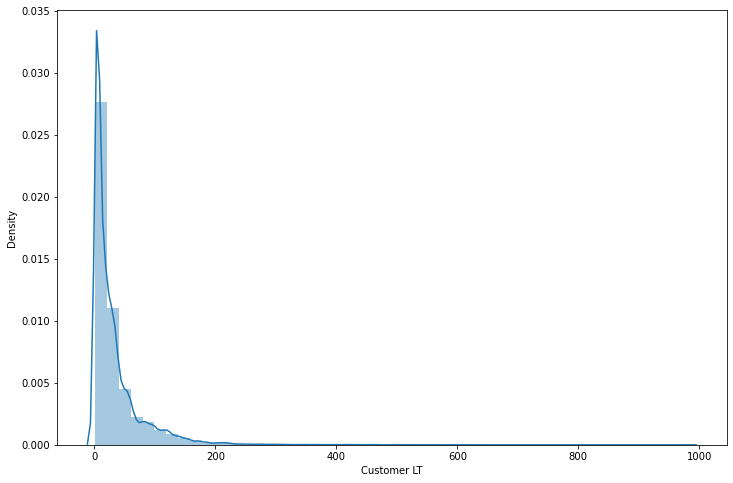

In [39]:
plt.figure(figsize=(12,8))
sns.distplot(df1['Customer LT'])

C:\Users\te521690\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shipping LT', ylabel='Density'>

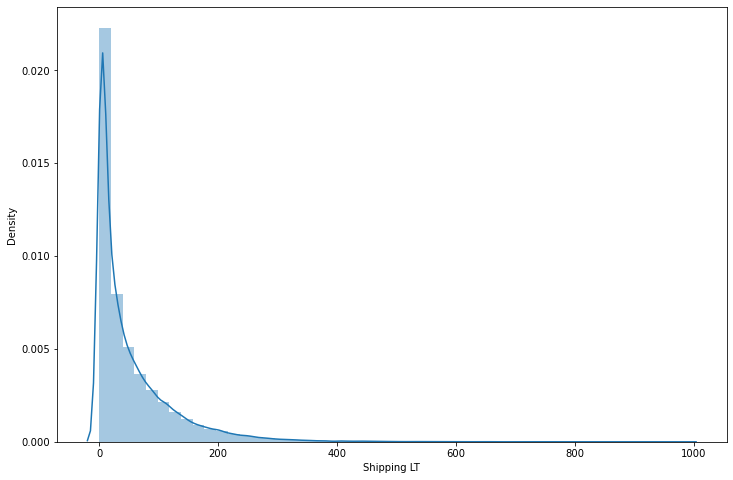

In [40]:
plt.figure(figsize=(12,8))
sns.distplot(df1['Shipping LT'])

<AxesSubplot:xlabel='Customer LT', ylabel='Shipping LT'>

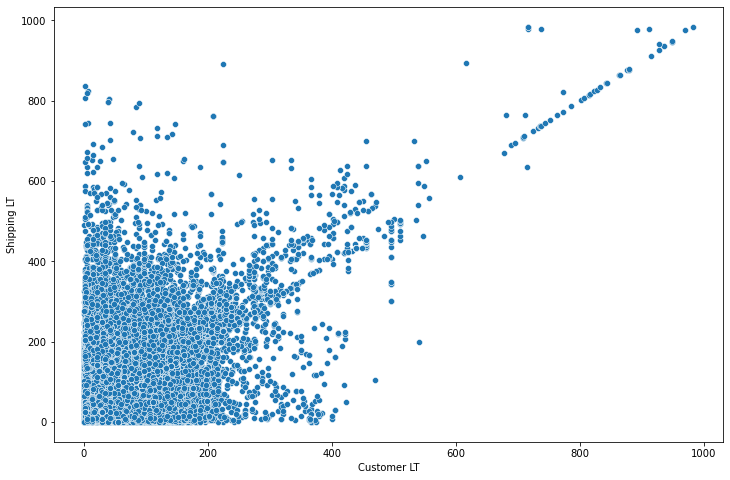

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Customer LT',y='Shipping LT',data=df1)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148521 entries, 0 to 157379
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   SO#          148521 non-null  object        
 1   InvLine      148521 non-null  int64         
 2   Part         148521 non-null  object        
 3   Desc1        148521 non-null  object        
 4   OTTO-GPL     148520 non-null  object        
 5   Part Type    148095 non-null  object        
 6   QtyInvoiced  148521 non-null  float64       
 7   Ord-Dt       148521 non-null  datetime64[ns]
 8   ReqDt        148521 non-null  datetime64[ns]
 9   DueDt        148521 non-null  datetime64[ns]
 10  InvoiceDt    148521 non-null  datetime64[ns]
 11  Customer LT  148521 non-null  int64         
 12  Shipping LT  148521 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(3), object(5)
memory usage: 15.9+ MB


In [43]:
df1.drop(['SO#','InvLine','Desc1'], axis=1,inplace=True)

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148521 entries, 0 to 157379
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Part         148521 non-null  object        
 1   OTTO-GPL     148520 non-null  object        
 2   Part Type    148095 non-null  object        
 3   QtyInvoiced  148521 non-null  float64       
 4   Ord-Dt       148521 non-null  datetime64[ns]
 5   ReqDt        148521 non-null  datetime64[ns]
 6   DueDt        148521 non-null  datetime64[ns]
 7   InvoiceDt    148521 non-null  datetime64[ns]
 8   Customer LT  148521 non-null  int64         
 9   Shipping LT  148521 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(2), object(3)
memory usage: 12.5+ MB


In [45]:
# Identify the columns containing string variables
string_columns = ['Part', 'OTTO-GPL', 'Part Type']

# Perform one-hot encoding
dummy_variables = pd.get_dummies(df1[string_columns])

# Concatenate the dummy variables with the original dataset
df_encoded = pd.concat([df1, dummy_variables], axis=1)

# Drop the original string columns if needed
df2 = df_encoded.drop(string_columns, axis=1)


In [46]:
from datetime import datetime

# Convert 'Ord-Dt' column to datetime
df2['Ord-Dt'] = pd.to_datetime(df2['Ord-Dt'])
# Convert datetime to Unix timestamp
df2['Ord-Dt_Euc'] = df2['Ord-Dt'].apply(lambda x: x.to_pydatetime().timestamp())

# Convert 'Ord-Dt' column to datetime
df2['ReqDt'] = pd.to_datetime(df2['ReqDt'])
# Convert datetime to Unix timestamp
df2['ReqDt_Euc'] = df2['ReqDt'].apply(lambda x: x.to_pydatetime().timestamp())

# Convert 'Ord-Dt' column to datetime
df2['DueDt'] = pd.to_datetime(df2['DueDt'])
# Convert datetime to Unix timestamp
df2['DueDt_Euc'] = df2['DueDt'].apply(lambda x: x.to_pydatetime().timestamp())

# # Convert 'Ord-Dt' column to datetime
# df2['InvoiceDt'] = pd.to_datetime(df2['InvoiceDt'])
# # Convert datetime to Unix timestamp
# df2['InvoiceDt_Euc'] = df2['InvoiceDt'].apply(lambda x: x.to_pydatetime().timestamp())



In [47]:
df2 = df2.drop(['Ord-Dt','ReqDt','DueDt','InvoiceDt'], axis=1)

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148521 entries, 0 to 157379
Columns: 7669 entries, QtyInvoiced to DueDt_Euc
dtypes: float64(4), int64(2), uint8(7663)
memory usage: 1.1 GB


In [49]:
df2.columns

Index(['QtyInvoiced', 'Customer LT', 'Shipping LT', 'Part_7537740001',
       'Part_000144-000', 'Part_000938N001', 'Part_001449-000',
       'Part_001995-000', 'Part_002284-000', 'Part_004019N001',
       ...
       'Part Type_3', 'Part Type_(blank)', 'Part Type_ATO', 'Part Type_COMP',
       'Part Type_MTO', 'Part Type_MTS', 'Part Type_MTSQS', 'Ord-Dt_Euc',
       'ReqDt_Euc', 'DueDt_Euc'],
      dtype='object', length=7669)

In [50]:
X = df2.drop('Shipping LT',axis=1)
y = df2['Shipping LT']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
print(X_train.dtypes)

QtyInvoiced        float64
Customer LT          int64
Part_7537740001      uint8
Part_000144-000      uint8
Part_000938N001      uint8
                    ...   
Part Type_MTS        uint8
Part Type_MTSQS      uint8
Ord-Dt_Euc         float64
ReqDt_Euc          float64
DueDt_Euc          float64
Length: 7668, dtype: object


In [56]:
X_train= scaler.fit_transform(X_train)

In [57]:
X_test = scaler.transform(X_test)

In [58]:
X_train.shape

(103964, 7668)

In [59]:
X_test.shape

(44557, 7668)

### Creating a model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [61]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse')

### Training the model

In [62]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with early stopping
model.fit(x=X_train, y=y_train.values,
          validation_data=(X_test, y_test.values),
          batch_size=128, epochs=400, callbacks=[early_stopping])


Epoch 1/400
813/813 [==============================] - 23s 25ms/step - loss: 3167.9480 - val_loss: 2445.6206
Epoch 2/400
813/813 [==============================] - 9s 11ms/step - loss: 2175.8777 - val_loss: 2344.1296
Epoch 3/400
813/813 [==============================] - 11s 13ms/step - loss: 1997.9739 - val_loss: 2213.0098
Epoch 4/400
813/813 [==============================] - 10s 12ms/step - loss: 1912.1575 - val_loss: 2215.9131
Epoch 5/400
813/813 [==============================] - 10s 12ms/step - loss: 1851.5480 - val_loss: 2196.9465
Epoch 6/400
813/813 [==============================] - 10s 12ms/step - loss: 1795.0609 - val_loss: 2150.0874
Epoch 7/400
813/813 [==============================] - 9s 11ms/step - loss: 1750.4473 - val_loss: 2092.9863
Epoch 8/400
813/813 [==============================] - 11s 14ms/step - loss: 1674.2246 - val_loss: 2050.7739
Epoch 9/400
813/813 [==============================] - 11s 14ms/step - loss: 1584.7189 - val_loss: 1963.5209
Epoch 10/400
813/813 

In [47]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 104179 samples, validate on 44649 samples
Epoch 1/400
104179/104179 [==============================] - 16s 155us/sample - loss: 3799.3488 - val_loss: 1360.9240
Epoch 2/400
104179/104179 [==============================] - 10s 99us/sample - loss: 511.8905 - val_loss: 133.5825
Epoch 3/400
104179/104179 [==============================] - 11s 108us/sample - loss: 66.9861 - val_loss: 70.4991
Epoch 4/400
104179/104179 [==============================] - 10s 100us/sample - loss: 36.4038 - val_loss: 67.4166
Epoch 5/400
104179/104179 [==============================] - 9s 89us/sample - loss: 36.5008 - val_loss: 69.5106
Epoch 6/400
104179/104179 [==============================] - 9s 88us/sample - loss: 37.7434 - val_loss: 79.9948
Epoch 7/400
104179/104179 [==============================] - 9s 88us/sample - loss: 36.8089 - val_loss: 69.6018
Epoch 8/400
104179/104179 [==============================] - 11s 106us/sample - loss: 35.6235 - val_loss: 68.4739
Epoch 9/400
104179/104179 [===========

Epoch 73/400
104179/104179 [==============================] - 10s 91us/sample - loss: 7.5052 - val_loss: 41.6478
Epoch 74/400
104179/104179 [==============================] - 9s 88us/sample - loss: 7.9051 - val_loss: 42.8773
Epoch 75/400
104179/104179 [==============================] - 9s 89us/sample - loss: 7.4629 - val_loss: 41.1441
Epoch 76/400
104179/104179 [==============================] - 9s 85us/sample - loss: 7.2885 - val_loss: 41.8485
Epoch 77/400
104179/104179 [==============================] - 9s 88us/sample - loss: 7.5120 - val_loss: 40.4715
Epoch 78/400
104179/104179 [==============================] - 10s 94us/sample - loss: 7.4583 - val_loss: 41.7609
Epoch 79/400
104179/104179 [==============================] - 11s 107us/sample - loss: 7.0733 - val_loss: 40.2185
Epoch 80/400
104179/104179 [==============================] - 10s 98us/sample - loss: 7.3409 - val_loss: 41.3495
Epoch 81/400
104179/104179 [==============================] - 10s 93us/sample - loss: 7.4177 - val_

104179/104179 [==============================] - 10s 93us/sample - loss: 4.5048 - val_loss: 35.1748
Epoch 146/400
104179/104179 [==============================] - 10s 97us/sample - loss: 4.3998 - val_loss: 35.8677
Epoch 147/400
104179/104179 [==============================] - 10s 95us/sample - loss: 4.3116 - val_loss: 35.3116
Epoch 148/400
104179/104179 [==============================] - 10s 95us/sample - loss: 4.4369 - val_loss: 36.0205
Epoch 149/400
104179/104179 [==============================] - 10s 94us/sample - loss: 4.2973 - val_loss: 35.7842
Epoch 150/400
104179/104179 [==============================] - 10s 98us/sample - loss: 4.2499 - val_loss: 35.9293
Epoch 151/400
104179/104179 [==============================] - 10s 97us/sample - loss: 4.3068 - val_loss: 36.1284
Epoch 152/400
104179/104179 [==============================] - 10s 95us/sample - loss: 4.3412 - val_loss: 37.1295
Epoch 153/400
104179/104179 [==============================] - 10s 95us/sample - loss: 4.2171 - val_lo

Epoch 217/400
104179/104179 [==============================] - 9s 87us/sample - loss: 3.1015 - val_loss: 34.8523
Epoch 218/400
104179/104179 [==============================] - 9s 89us/sample - loss: 3.0943 - val_loss: 35.3566
Epoch 219/400
104179/104179 [==============================] - 9s 89us/sample - loss: 3.1972 - val_loss: 34.8867
Epoch 220/400
104179/104179 [==============================] - 10s 93us/sample - loss: 3.1281 - val_loss: 34.3048
Epoch 221/400
104179/104179 [==============================] - 9s 88us/sample - loss: 3.0456 - val_loss: 34.3787
Epoch 222/400
104179/104179 [==============================] - 10s 98us/sample - loss: 3.1609 - val_loss: 35.1376
Epoch 223/400
104179/104179 [==============================] - 10s 95us/sample - loss: 3.0602 - val_loss: 34.9588
Epoch 224/400
104179/104179 [==============================] - 10s 92us/sample - loss: 3.1828 - val_loss: 35.7853
Epoch 225/400
104179/104179 [==============================] - 9s 90us/sample - loss: 2.9798

104179/104179 [==============================] - 10s 92us/sample - loss: 2.0711 - val_loss: 32.4676
Epoch 362/400
104179/104179 [==============================] - 9s 90us/sample - loss: 2.0863 - val_loss: 32.6556
Epoch 363/400
104179/104179 [==============================] - 9s 90us/sample - loss: 1.9868 - val_loss: 32.5245
Epoch 364/400
104179/104179 [==============================] - 9s 90us/sample - loss: 2.0430 - val_loss: 32.7168
Epoch 365/400
104179/104179 [==============================] - 9s 91us/sample - loss: 2.0418 - val_loss: 32.8328
Epoch 366/400
104179/104179 [==============================] - 10s 96us/sample - loss: 2.0661 - val_loss: 32.7701
Epoch 367/400
104179/104179 [==============================] - 9s 89us/sample - loss: 2.0649 - val_loss: 31.9975
Epoch 368/400
104179/104179 [==============================] - 9s 91us/sample - loss: 1.9215 - val_loss: 32.5425
Epoch 369/400
104179/104179 [==============================] - 9s 89us/sample - loss: 2.1149 - val_loss: 32.

In [63]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

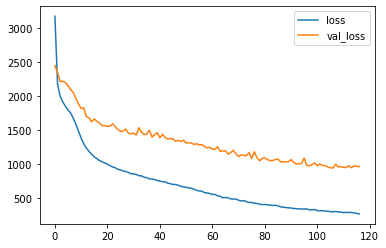

In [64]:
losses.plot()

### Evaluation of the model

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [66]:
X_test

array([[4.84443011e-04, 2.65035678e-02, 0.00000000e+00, ...,
        8.89261833e-01, 7.08479106e-01, 7.84758258e-01],
       [4.85249073e-04, 1.42711519e-02, 0.00000000e+00, ...,
        5.40579520e-01, 3.78425656e-01, 7.26502901e-01],
       [4.97339997e-04, 7.13557594e-03, 0.00000000e+00, ...,
        9.73567589e-01, 7.75510204e-01, 7.94082258e-01],
       ...,
       [4.91697566e-04, 1.93679918e-02, 0.00000000e+00, ...,
        7.84135309e-01, 6.06997085e-01, 7.65403206e-01],
       [4.88473319e-04, 2.03873598e-02, 0.00000000e+00, ...,
        6.06031205e-01, 4.42565598e-01, 7.37418803e-01],
       [4.95727874e-04, 3.26197757e-02, 0.00000000e+00, ...,
        7.57073554e-01, 5.89504373e-01, 7.65303971e-01]])

In [67]:
predictions = model.predict(X_test)

1393/1393 [==============================] - 3s 2ms/step


In [68]:
mean_absolute_error(y_test,predictions)

17.111876906774377

In [69]:
np.sqrt(mean_squared_error(y_test,predictions))

31.057345002051317

In [70]:
explained_variance_score(y_test,predictions)

0.8106672739992994

In [71]:
df1['Shipping LT'].mean()

53.03548319766228

In [72]:
df1['Shipping LT'].median()

26.0

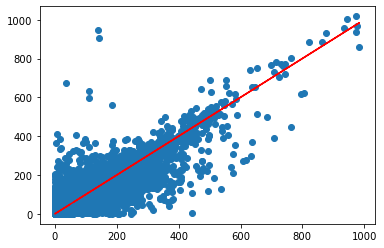

In [73]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [74]:
errors = y_test.values.reshape(44557, 1) - predictions

C:\Users\te521690\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

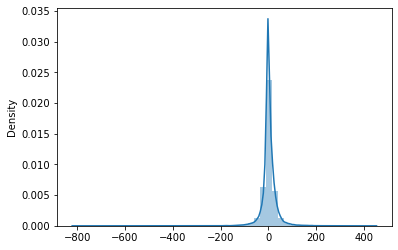

In [75]:
sns.distplot(errors)

### Predicting on a brand new house

In [76]:
log = pd.read_excel(directory + 'MFG PRO backlog.xlsx', engine='openpyxl')

In [77]:
log1 = log.iloc[:,[12,91,59,111,8,35,37]]

In [78]:
log1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8647 entries, 0 to 8646
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Part         8647 non-null   object        
 1   OTTO-GPL     8647 non-null   object        
 2   Part-Type    8603 non-null   object        
 3   Qty Ordered  8647 non-null   float64       
 4   SO-Ord_date  8647 non-null   datetime64[ns]
 5   Req-Date     8647 non-null   datetime64[ns]
 6   Due-Date     8647 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(3)
memory usage: 473.0+ KB


In [79]:
log1['Part-Type'].replace({'mto':'MTO',
                           'mto ':'MTO',
                           'mts':'MTS'},inplace=True)

C:\Users\te521690\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [118]:
log1['Part'] = log1['Part'].str.upper()

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
log1['Part-Type'] = log1['Part-Type'].str.upper()

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
# log1['Part'].replace({'n001':'N001',
#                      'y-':'Y-',
#                      '_a':'_A',
#                      '_bm':'_BM',
#                      '_br':'_BR',
#                      '_b':'_B',
#                      '_ca':'_CA',
#                      '_cb':'_CB',
#                      '_cf':'_CF',
#                      '_cg':'_CG',
#                      '_cl':'_CL',
#                      '_cm':'_CM',
#                      '_cn':'_CN',
#                      '_cp':'_CP',
#                      '_cr':'_CR',
#                      '_cs':'_CS',
#                      '_cu':'_CU',
#                      '_cv':'_CV',
#                      '_cx':'_CX',
#                      '_cz':'_CZ',
#                      '_c':'_C',
#                      '_d':'_D',
#                      '_eb':'_EB',
#                      '_Eb':'_EB',
#                      '_ed':'_ED',
#                      '_ee':'_EE',
#                      '_ef':'_EF',
#                      '_eh':'_EH',
#                      '_ej':'_EJ',
#                      '_ek':'_EK',
#                      '_el':'_EL',
#                      '_em':'_EM',
#                      '_en':'_EN',
#                      '_ep':'_EP',
#                      '_er':'_ER',
#                      '_es':'_ES',
#                      '_e':'_E',
#                      '_fg':'_FG',
#                      '_f':'_F',
#                      '_gf':'_GF',
#                      '_l':'_L',
#                      '_y':'_Y'},inplace=True)

In [121]:
log1.rename(columns={'SO-Ord_date':'SO_Ord_date','Req-Date':'Req_Date','Due-Date':'Due_Date'}, inplace=True)

C:\Users\te521690\Anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
C_LT = []
for index, row in log1.iterrows():
    timedelta = row['Req_Date'] - row['SO_Ord_date']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        C_LT.append(timedelta_days)
    else:
        C_LT.append(0)

log1['Customer LT'] = C_LT


C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [123]:
S_LT = []
for index, row in log1.iterrows():
    timedelta = row['Due_Date'] - row['SO_Ord_date']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        S_LT.append(timedelta_days)
    else:
        S_LT.append(0)

log1['Shipping LT'] = S_LT

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [124]:
log1['Part-Type'].replace(['Part_Type_MTO ','Part_Type_MTO'], inplace=True)

In [125]:
# Identify the columns containing string variables
string_columns = ['Part', 'OTTO-GPL', 'Part-Type']

# Perform one-hot encoding
dummy_variables = pd.get_dummies(log1[string_columns])

# Concatenate the dummy variables with the original dataset
log1_encoded = pd.concat([log1, dummy_variables], axis=1)

# Drop the original string columns if needed
log2 = log1_encoded.drop(string_columns, axis=1)


In [126]:
log2.rename(columns={'Part-Type':'Part_Type',
                     'OTTO-GPL':'OTTO_GPL',
                     'Qty Ordered':'QtyInvoiced',
                     'Part_Type_(blank)':'Part Type_(blank)',
                     'Part_Type_ATO':'Part Type_ATO',
                     'Part_Type_COMP':'Part Type_COMP',
                     'Part_Type_MTS':'Part Type_MTS',
                     'Part_Type_MTSQS':'Part Type_MTSQS',
                     'SO_Ord_date_Euc':'Ord-Dt_Euc',
                     'Req_Date_Euc':'ReqDt_Euc',
                     'Due_Date_Euc':'DueDt_Euc'}, inplace=True)

In [127]:
# from datetime import datetime

# # Convert 'Ord-Dt' column to datetime
# log2['SO_Ord_date'] = pd.to_datetime(log2['SO_Ord_date'])
# # Convert datetime to Unix timestamp
# log2['SO_Ord_date_Euc'] = log2['SO_Ord_date'].apply(lambda x: x.to_pydatetime().timestamp())

# # Convert 'Ord-Dt' column to datetime
# log2['Req_Date'] = pd.to_datetime(log2['Req_Date'])
# # Convert datetime to Unix timestamp
# log2['Req_Date_Euc'] = log2['Req_Date'].apply(lambda x: x.to_pydatetime().timestamp())

# # Convert 'Ord-Dt' column to datetime
# log2['Due_Date'] = pd.to_datetime(log2['Due_Date'])
# # Convert datetime to Unix timestamp
# log2['Due_Date_Euc'] = log2['Due_Date'].apply(lambda x: x.to_pydatetime().timestamp())


In [128]:
from datetime import datetime

# Convert 'Ord-Dt' column to datetime
log2['SO_Ord_date'] = pd.to_datetime(log2['SO_Ord_date'])
# Convert datetime to Unix timestamp
log2['SO_Ord_date_Euc'] = log2['SO_Ord_date'].apply(lambda x: x.timestamp())

# Convert 'Req_Date' column to datetime
log2['Req_Date'] = pd.to_datetime(log2['Req_Date'])
# Convert datetime to Unix timestamp
log2['Req_Date_Euc'] = log2['Req_Date'].apply(lambda x: x.timestamp())

# Convert 'Due_Date' column to datetime
log2['Due_Date'] = pd.to_datetime(log2['Due_Date'])
# Convert datetime to Unix timestamp
log2['Due_Date_Euc'] = log2['Due_Date'].apply(lambda x: x.timestamp())


In [129]:
log2 = log2.drop(['SO_Ord_date','Req_Date','Due_Date'], axis=1)

In [130]:
X1 = log2.drop('Shipping LT',axis=1)
y1 = log2['Shipping LT']

In [131]:
# X1= scaler.fit_transform(X1)

In [132]:
X1=pd.DataFrame(X1)

In [133]:
X1.head()

,QtyInvoiced,Customer LT,Part_000144-000,Part_001449-000,Part_004049-000,Part_004354-000,Part_007356-000,Part_008440-000,Part_011589-000,Part_014670-000,...,Part-Type_(BLANK),Part-Type_ATO,Part-Type_COMP,Part-Type_MTO,Part-Type_MTO,Part-Type_MTS,Part-Type_MTSQS,SO_Ord_date_Euc,Req_Date_Euc,Due_Date_Euc
0,2.0,71,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1.679357e+09,1.685491e+09,1.691539e+09
1,1.0,126,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1.681949e+09,1.692835e+09,1.692835e+09
2,40.0,186,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1.666310e+09,1.682381e+09,1.686010e+09
3,90.0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1.685578e+09,1.685837e+09,-6.312384e+08
4,12.0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1.685664e+09,1.686096e+09,-6.312384e+08


In [134]:
X1.shape

(8647, 2611)

In [135]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               766900    
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 50)                3800      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 19)                494       
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [136]:
df_columns = X.columns.tolist()

In [137]:
columns = pd.DataFrame(df_columns)

In [138]:
columns.to_excel(directory+'column_names.xlsx')

PermissionError: [Errno 13] Permission denied: 'C:/Users/te521690/OneDrive - TE Connectivity/Desktop/Canada Backlog/43. Jun 05, 2023/column_names.xlsx'

In [143]:
df_columns2 = log2.columns.tolist()

In [144]:
df_columns2=pd.DataFrame(df_columns2)

In [145]:
with pd.ExcelWriter (directory + 'column_names.xlsx', engine ='openpyxl',
                    mode='a') as writer:
                        df_columns2.to_excel(writer, sheet_name = 'backlog_columns')

In [139]:
merged_df=pd.DataFrame(columns=df_columns)

In [140]:
merged_df.head()

,QtyInvoiced,Customer LT,Part_7537740001,Part_000144-000,Part_000938N001,Part_001449-000,Part_001995-000,Part_002284-000,Part_004019N001,Part_004049-000,...,Part Type_3,Part Type_(blank),Part Type_ATO,Part Type_COMP,Part Type_MTO,Part Type_MTS,Part Type_MTSQS,Ord-Dt_Euc,ReqDt_Euc,DueDt_Euc


In [141]:
X2=pd.merge(merged_df, X1[df_columns],on=df_columns,how='left')

KeyError: "['Part_7537740001', 'Part_000938N001', 'Part_001995-000', 'Part_002284-000', 'Part_004019N001', 'Part_005037-000', 'Part_005192T001', 'Part_006843-000', 'Part_011551-000', 'Part_011577-000', 'Part_012130-000', 'Part_015475-000', 'Part_016593-000', 'Part_016640-000', 'Part_018265-000', 'Part_019600-000', 'Part_021146-000', 'Part_021546-000', 'Part_022528-000', 'Part_022731-000', 'Part_023838-000', 'Part_023846-000', 'Part_024859-000', 'Part_024900-000', 'Part_026895-000', 'Part_026913-000', 'Part_027316-000', 'Part_027586-000', 'Part_028005-000', 'Part_028372-000', 'Part_028378-000', 'Part_028630-000', 'Part_033872-000', 'Part_035869-000', 'Part_035875-000', 'Part_037871-000', 'Part_039735-000', 'Part_040119-000', 'Part_041276-000', 'Part_041830-000', 'Part_042674-000', 'Part_044191-000', 'Part_044469-000', 'Part_045520-000', 'Part_046569-000', 'Part_048850-000', 'Part_049753-000', 'Part_049912-000', 'Part_050805-000', 'Part_052134-000', 'Part_052159-000', 'Part_053000-000', 'Part_053174-000', 'Part_054822-000', 'Part_055268-000', 'Part_056435-000', 'Part_058368-000', 'Part_058671-000', 'Part_059342-000', 'Part_061496-000', 'Part_062318-000', 'Part_063269-000', 'Part_063316-000', 'Part_063838-000', 'Part_063918-000', 'Part_063942-000', 'Part_064978-000', 'Part_065979-000', 'Part_066818-000', 'Part_067399-000', 'Part_068359-000', 'Part_073513-000', 'Part_074371-000', 'Part_074883-000', 'Part_075453-000', 'Part_077251-000', 'Part_077779-000', 'Part_077882-000', 'Part_077884-000', 'Part_077996-000', 'Part_078805-000', 'Part_079453-001', 'Part_081216-000', 'Part_081895-000', 'Part_081964-000', 'Part_082053-000', 'Part_082374-000', 'Part_082759-000', 'Part_083238-000', 'Part_083242-000', 'Part_084077-000', 'Part_090792-000', 'Part_092193-000', 'Part_092601-000', 'Part_093852-000', 'Part_094169-000', 'Part_094307-000', 'Part_095181-000', 'Part_095266-000', 'Part_096434N001', 'Part_096993-000', 'Part_097136-000', 'Part_097137-000', 'Part_098409-000', 'Part_099088-000', 'Part_1-1099385-1', 'Part_1-2182448-4', 'Part_1-2182448-5', 'Part_1-2182448-6', 'Part_1-2182448-8', 'Part_1-2186500-1', 'Part_1-2297126-2', 'Part_1-2364039-0', 'Part_1-2364039-2', 'Part_1-2364039-3', 'Part_1-2364040-0', 'Part_1-2364040-2', 'Part_1-2364040-3', 'Part_1-2374797-0', 'Part_1-2374797-1', 'Part_1-2374797-2', 'Part_1-2374923-2', 'Part_1-2374923-3', 'Part_1-2374923-4', 'Part_1-2374923-5', 'Part_1-2374923-7', 'Part_1-2374923-8', 'Part_1-2374923-9', 'Part_1-2384402-0', 'Part_1-2384479-0', 'Part_1-2384755-0', 'Part_1-703497-2', 'Part_100084-000', 'Part_100892-000', 'Part_101733-000', 'Part_103111-000', 'Part_103245-000', 'Part_105110-000', 'Part_105619-000', 'Part_107751-000', 'Part_108160-000', 'Part_108727-000', 'Part_108961-000', 'Part_1099446-1', 'Part_1099994-1', 'Part_110575-000', 'Part_111371-000', 'Part_1116239-1', 'Part_1116240-1', 'Part_1116272-1', 'Part_1116273-1', 'Part_1116374-1', 'Part_112464-000', 'Part_112981-000', 'Part_113268-000', 'Part_113742-000', 'Part_115518-000', 'Part_116556-000', 'Part_116770-000', 'Part_116781-000', 'Part_116920-000', 'Part_117954-000', 'Part_119617-000', 'Part_120985-000', 'Part_121159-000', 'Part_121363-000', 'Part_121454-000', 'Part_121604-000', 'Part_122319-000', 'Part_122369-000', 'Part_123165-000', 'Part_124724-000', 'Part_125589-000', 'Part_127132-000', 'Part_127796-000', 'Part_128610-000', 'Part_128958-000', 'Part_130242-000', 'Part_131520-000', 'Part_133108-000', 'Part_137009-000', 'Part_139905-000', 'Part_140689-000', 'Part_143947-000', 'Part_1443316-4', 'Part_1443351-2', 'Part_144575-000', 'Part_147654-000', 'Part_148142-000', 'Part_148233-000', 'Part_148416-000', 'Part_148582-000', 'Part_149597-000', 'Part_150452-000', 'Part_152078-000', 'Part_152115-000', 'Part_153931-000', 'Part_153998-000', 'Part_154147-000', 'Part_155436-000', 'Part_155713-000', 'Part_157071-000', 'Part_160021n001', 'Part_160569-000', 'Part_161283-000', 'Part_162765-000', 'Part_163424-000', 'Part_163702-000', 'Part_163702-005', 'Part_164889-000', 'Part_165378-000', 'Part_165998-000', 'Part_166319-000', 'Part_167019-000', 'Part_167138-000', 'Part_168178-000', 'Part_168622-000', 'Part_170821-000', 'Part_1710722-6', 'Part_1710979-5', 'Part_171124-000', 'Part_1727742-2', 'Part_172778-000', 'Part_1727912-4', 'Part_174821-045', 'Part_175361-000', 'Part_178368-000', 'Part_178613-001', 'Part_178714-000', 'Part_179217-000', 'Part_1792926-1', 'Part_182592-000', 'Part_182825-000', 'Part_182991-000', 'Part_183217-000', 'Part_183855-000', 'Part_184894-000', 'Part_188441-000', 'Part_189800-000', 'Part_189883-000', 'Part_190407-000', 'Part_191289-000', 'Part_1933775-1', 'Part_196146-000', 'Part_196693-000', 'Part_197090-000', 'Part_197127-000', 'Part_1974139-1', 'Part_1974141-1', 'Part_1974142-1', 'Part_1974155-1', 'Part_1974178-1', 'Part_199565-000', 'Part_199960-000', 'Part_1J3495-000', 'Part_2-2374923-0', 'Part_2-2374923-1', 'Part_2-2374923-2', 'Part_201133-000', 'Part_2019861-1', 'Part_203743-000', 'Part_2037763-2', 'Part_204753-000', 'Part_206107-000', 'Part_2062463-1', 'Part_207170-000', 'Part_208172-1', 'Part_208316-1', 'Part_208317-1', 'Part_208439-000', 'Part_2084632-4', 'Part_2084708-4', 'Part_208576-000', 'Part_208755-000', 'Part_209571-000', 'Part_209749-000', 'Part_2107010-1', 'Part_2107357-1', 'Part_2107640-1', 'Part_2107832-1', 'Part_2107862-1', 'Part_21244H-000', 'Part_212501-000', 'Part_213759-000', 'Part_214085-000', 'Part_217058-000', 'Part_217580-000', 'Part_2182256-1', 'Part_2182261-1', 'Part_2182352-1', 'Part_2182383-4', 'Part_2182442-3', 'Part_2182445-2', 'Part_2182448-1', 'Part_2182448-2', 'Part_2182448-3', 'Part_2182448-4', 'Part_2182448-5', 'Part_2182448-6', 'Part_2182479-1', 'Part_2182491-2', 'Part_2182515-2', 'Part_2182587-3', 'Part_2182587-4', 'Part_2182587-5', 'Part_2182587-6', 'Part_2182587-8', 'Part_2182587-9', 'Part_2182603-1', 'Part_2182663-1', 'Part_2182731-2', 'Part_2182756-1', 'Part_2182763-1', 'Part_2182809-1', 'Part_2182833-2', 'Part_2182833-4', 'Part_2182863-8', 'Part_2182867-1', 'Part_2182869-1', 'Part_2182874-1', 'Part_2182890-2', 'Part_2182946-1', 'Part_2182962-1', 'Part_2182993-1', 'Part_2182994-2', 'Part_2182994-7', 'Part_2182994-9', 'Part_2197048-1', 'Part_2197048-2', 'Part_2197049-1', 'Part_2197049-2', 'Part_2197061-1', 'Part_2197061-2', 'Part_2197378-2', 'Part_2213759-3', 'Part_222657-000', 'Part_2232232-1', 'Part_223622-000', 'Part_225568-000', 'Part_225962-000', 'Part_2259749-2', 'Part_2259750-1', 'Part_2270024-1', 'Part_2270251-3', 'Part_2270298-4', 'Part_2270299-4', 'Part_228774-000', 'Part_2296544-3', 'Part_229666-000', 'Part_2297126-7', 'Part_2300995-2', 'Part_2300995-4', 'Part_2300995-6', 'Part_2301076-1', 'Part_2304320-7', 'Part_2308033-1', 'Part_2315176-1', 'Part_2315836-5', 'Part_2315836-6', 'Part_2315929-8', 'Part_2315946-3', 'Part_2315946-5', 'Part_2315946-6', 'Part_2315961-1', 'Part_2315985-6', 'Part_2315987-2', 'Part_2315987-4', 'Part_2316010-5', 'Part_2316011-5', 'Part_2316181-6', 'Part_2316246-1', 'Part_2316246-2', 'Part_2316246-4', 'Part_2316246-5', 'Part_2316246-6', 'Part_2316258-4', 'Part_2316258-6', 'Part_2322196-1', 'Part_232367-000', 'Part_2327937-1', 'Part_2332302-1', 'Part_2336077-1', 'Part_233783-000', 'Part_2341979-1', 'Part_2342988-1', 'Part_2344892-1', 'Part_234583-000', 'Part_2354758-1', 'Part_2363117-3', 'Part_2363118-3', 'Part_2363968-1', 'Part_2364039-1', 'Part_2364039-2', 'Part_2364039-7', 'Part_2364039-9', 'Part_2364040-1', 'Part_2364040-2', 'Part_2364040-7', 'Part_2364040-9', 'Part_2365254-1', 'Part_2365258-1', 'Part_2365855-9', 'Part_2366270-3', 'Part_2372206-1', 'Part_2374772-2', 'Part_2374772-3', 'Part_2374772-5', 'Part_2374772-6', 'Part_2374797-9', 'Part_2374899-3', 'Part_2374899-4', 'Part_2374899-5', 'Part_2374899-6', 'Part_2374899-7', 'Part_2374899-8', 'Part_2374899-9', 'Part_2374923-5', 'Part_2374928-4', 'Part_2374928-5', 'Part_2374928-6', 'Part_2374928-7', 'Part_2375030-7', 'Part_2375030-8', 'Part_2375030-9', 'Part_2375836-2', 'Part_2376750-2', 'Part_2376750-7', 'Part_2377036-2', 'Part_2378393-2', 'Part_2378393-5', 'Part_2378407-2', 'Part_2378407-5', 'Part_2378407-6', 'Part_2378413-2', 'Part_2378413-5', 'Part_2378413-6', 'Part_2378437-2', 'Part_2378437-5', 'Part_2378437-6', 'Part_2378437-7', 'Part_2378437-8', 'Part_2378437-9', 'Part_2378450-2', 'Part_2378450-5', 'Part_2378450-6', 'Part_2378451-2', 'Part_2378451-5', 'Part_2378451-6', 'Part_2378451-7', 'Part_2378451-8', 'Part_2378572-2', 'Part_2378572-3', 'Part_2378573-2', 'Part_2378929-1', 'Part_2378929-4', 'Part_2378929-7', 'Part_2378929-8', 'Part_2378929-9', 'Part_2380454-1', 'Part_2382266-1', 'Part_2382266-2', 'Part_2382266-3', 'Part_2382266-5', 'Part_2382266-6', 'Part_2382266-8', 'Part_2382267-1', 'Part_2382267-2', 'Part_2382267-3', 'Part_2382290-1', 'Part_2382290-2', 'Part_2382290-3', 'Part_2382290-4', 'Part_2382290-5', 'Part_2382310-1', 'Part_2382310-2', 'Part_2382312-1', 'Part_2382312-2', 'Part_2382312-3', 'Part_2382312-4', 'Part_2382312-5', 'Part_2382313-1', 'Part_2382313-2', 'Part_2382313-3', 'Part_2382313-4', 'Part_2382313-5', 'Part_2382313-6', 'Part_2382313-7', 'Part_2382313-9', 'Part_2382365-1', 'Part_2382365-2', 'Part_2382367-1', 'Part_2382367-2', 'Part_2384402-1', 'Part_2384402-3', 'Part_2384402-4', 'Part_2384402-5', 'Part_2384402-6', 'Part_2384402-7', 'Part_2384402-8', 'Part_2384402-9', 'Part_2384479-1', 'Part_2384479-2', 'Part_2384479-3', 'Part_2384479-4', 'Part_2384479-6', 'Part_2384479-7', 'Part_2384479-8', 'Part_2384479-9', 'Part_2384487-1', 'Part_2384487-2', 'Part_2384538-1', 'Part_2384538-2', 'Part_2384730-1', 'Part_2384730-2', 'Part_2384730-3', 'Part_2384730-4', 'Part_2384730-5', 'Part_2384730-6', 'Part_2384732-1', 'Part_2384732-2', 'Part_2384732-3', 'Part_2384732-4', 'Part_2384732-5', 'Part_2384732-6', 'Part_2384732-7', 'Part_2384736-2', 'Part_2384736-4', 'Part_2384736-5', 'Part_2384755-1', 'Part_2384755-4', 'Part_2384755-8', 'Part_2384755-9', 'Part_2385860-1', 'Part_2387393-3', 'Part_2387393-4', 'Part_2387393-5', 'Part_2387393-6', 'Part_2387393-7', 'Part_2387393-8', 'Part_2387393-9', 'Part_2387491-1', 'Part_2387491-2', 'Part_2387491-3', 'Part_2387491-4', 'Part_2387491-5', 'Part_2387491-6', 'Part_2387491-7', 'Part_2387491-8', 'Part_2387491-9', 'Part_2387493-1', 'Part_2387493-2', 'Part_2387493-3', 'Part_2387493-4', 'Part_2387493-5', 'Part_2387493-6', 'Part_2387493-7', 'Part_2387493-8', 'Part_2387493-9', 'Part_2388353-1', 'Part_2388446-1', 'Part_2388457-1', 'Part_2388457-4', 'Part_2388457-5', 'Part_2388457-6', 'Part_2388457-7', 'Part_2388457-8', 'Part_2388457-9', 'Part_2388467-1', 'Part_2388467-2', 'Part_2388467-3', 'Part_2388467-4', 'Part_2388467-5', 'Part_2388467-6', 'Part_2388485-1', 'Part_2388485-2', 'Part_2388485-3', 'Part_2388485-4', 'Part_2388485-5', 'Part_2388485-6', 'Part_2388830-1', 'Part_2388830-8', 'Part_2388830-9', 'Part_2388831-1', 'Part_2388831-8', 'Part_2388831-9', 'Part_2389234-1', 'Part_2389238-1', 'Part_2389510-1', 'Part_2389510-2', 'Part_2389706-1', 'Part_2389706-2', 'Part_2389706-3', 'Part_2389709-1', 'Part_2389709-2', 'Part_2389709-3', 'Part_239124-000', 'Part_2392175-1', 'Part_2392175-2', 'Part_2392175-3', 'Part_2392175-4', 'Part_2392176-1', 'Part_2392176-2', 'Part_2392176-3', 'Part_2392176-4', 'Part_2392176-5', 'Part_2392176-6', 'Part_2392176-9', 'Part_2392186-1', 'Part_2392186-2', 'Part_2392751-1', 'Part_2395638-1', 'Part_2395755-1', 'Part_2395755-2', 'Part_2395755-3', 'Part_2395755-4', 'Part_2395755-5', 'Part_2395755-6', 'Part_2395755-7', 'Part_2395755-8', 'Part_2397030-1', 'Part_2397030-2', 'Part_2397030-3', 'Part_2397030-4', 'Part_2397030-5', 'Part_2397034-1', 'Part_2397034-2', 'Part_2397034-3', 'Part_2400482-1', 'Part_2400483-1', 'Part_2400484-1', 'Part_2400486-1', 'Part_2400487-1', 'Part_2400488-1', 'Part_2401546-1', 'Part_2401546-2', 'Part_2401904-1', 'Part_2402893-1', 'Part_2403843-1', 'Part_2403843-2', 'Part_2403844-1', 'Part_2403945-1', 'Part_2403974-1', 'Part_2404542-1', 'Part_2404877-1', 'Part_2404877-2', 'Part_2404877-3', 'Part_2404877-4', 'Part_2404877-5', 'Part_2404877-6', 'Part_2404877-9', 'Part_2405269-1', 'Part_2405269-2', 'Part_2405270-1', 'Part_2405270-2', 'Part_2405271-1', 'Part_2405271-2', 'Part_2405556-1', 'Part_2405556-2', 'Part_2405557-1', 'Part_2405557-4', 'Part_2405557-5', 'Part_2405558-1', 'Part_2405559-1', 'Part_2405559-2', 'Part_2405559-3', 'Part_2406102-1', 'Part_2406104-1', 'Part_2406104-2', 'Part_2406105-1', 'Part_2406105-2', 'Part_2407518-2', 'Part_2407518-4', 'Part_2407524-2', 'Part_2407524-4', 'Part_2407589-1', 'Part_2407597-1', 'Part_2409877-2', 'Part_2411066-1', 'Part_2413387-2', 'Part_2413387-3', 'Part_2413387-5', 'Part_2413387-7', 'Part_2417800-1', 'Part_2418067-1', 'Part_2418067-2', 'Part_2418067-3', 'Part_2418067-4', 'Part_2418067-5', 'Part_2418067-6', 'Part_2418067-7', 'Part_2418067-8', 'Part_2418067-9', 'Part_2418068-1', 'Part_2418068-2', 'Part_2418068-3', 'Part_2418068-4', 'Part_2418068-5', 'Part_2418068-6', 'Part_2418068-7', 'Part_2418068-8', 'Part_2418068-9', 'Part_2420274-1', 'Part_2424186-1', 'Part_2424186-2', 'Part_2424187-1', 'Part_2424187-2', 'Part_2424188-1', 'Part_2424188-2', 'Part_2424189-1', 'Part_2424189-2', 'Part_2424190-1', 'Part_2424190-2', 'Part_2424191-1', 'Part_2424191-2', 'Part_2430006-1', 'Part_244867-000', 'Part_2457226-2', 'Part_2457226-3', 'Part_2457226-4', 'Part_2457226-5', 'Part_2457226-6', 'Part_2457226-9', 'Part_246858-000', 'Part_247867-000', 'Part_251919-011', 'Part_253981-000', 'Part_254009-000', 'Part_255382-000', 'Part_257406-000', 'Part_257557-000', 'Part_258162-000', 'Part_259199-000', 'Part_259224-000', 'Part_260068-000', 'Part_262299-000', 'Part_263898-000', 'Part_264112-000', 'Part_266460-000', 'Part_266938-000', 'Part_267154-000', 'Part_267156-000', 'Part_267592-000', 'Part_267989-000', 'Part_268624-000', 'Part_268812-000', 'Part_269197-000', 'Part_269657-000', 'Part_269732-000', 'Part_271389-000', 'Part_272463-000', 'Part_272687-000', 'Part_272699-000', 'Part_275607-000', 'Part_276018-000', 'Part_276737-000', 'Part_277001-000', 'Part_278087-000', 'Part_279531-000', 'Part_2800904-1', 'Part_281328-000', 'Part_2818443-2', 'Part_2818524-2', 'Part_282488-000', 'Part_2832042-1', 'Part_283821-000', 'Part_283844-000', 'Part_2839769-1', 'Part_286833-000', 'Part_287956-000', 'Part_289568-000', 'Part_290012-000', 'Part_294343-000', 'Part_294925-000', 'Part_296347-000', 'Part_297202-000', 'Part_298296-000', 'Part_298363-000', 'Part_298891-000', 'Part_301392-000', 'Part_301910-000', 'Part_302884-000', 'Part_303047N001', 'Part_303496-000', 'Part_303778-000', 'Part_304006-000', 'Part_304241-000', 'Part_304514-000', 'Part_306225-000', 'Part_307205-000', 'Part_307281-000', 'Part_307624-000', 'Part_311478-000', 'Part_312391-000', 'Part_313564-000', 'Part_315865-000', 'Part_317927-000', 'Part_320299-000', 'Part_320457-000', 'Part_321424-000', 'Part_322458-000', 'Part_323058-000', 'Part_324084-000', 'Part_324685-000', 'Part_326049-000', 'Part_326586-000', 'Part_327201-000', 'Part_328616-000', 'Part_329415-011', 'Part_330074-000', 'Part_331241-000', 'Part_332451N001', 'Part_332816-000', 'Part_334473-000', 'Part_335512-000', 'Part_335701-000', 'Part_336929-000', 'Part_337100-000', 'Part_337143-000', 'Part_337381-000', 'Part_337508-000', 'Part_337995-000', 'Part_338424-000', 'Part_338896-000', 'Part_339579-000', 'Part_339601-000', 'Part_339820-000', 'Part_343350-000', 'Part_344053-000', 'Part_347466-000', 'Part_347788-000', 'Part_347861-000', 'Part_348089-000', 'Part_349195-000', 'Part_349729-000', 'Part_349990-000', 'Part_351011-000', 'Part_351778-000', 'Part_351872-000', 'Part_357819-000', 'Part_358095-000', 'Part_359483-000', 'Part_364019-000', 'Part_364197-000', 'Part_365067-000', 'Part_365888-000', 'Part_366580-000', 'Part_367324-000', 'Part_369142-000', 'Part_371113-000', 'Part_371911-000', 'Part_373820-000', 'Part_375180-000', 'Part_375607-000', 'Part_379253-000', 'Part_382025-000', 'Part_384624-000', 'Part_384896-000', 'Part_385219-000', 'Part_385273-000', 'Part_385369N001', 'Part_385369N002', 'Part_385420-000', 'Part_385640-000', 'Part_386264-000', 'Part_387730-000', 'Part_388710-000', 'Part_388720-000', 'Part_393086-000', 'Part_394200-000', 'Part_397293-000', 'Part_398064-000', 'Part_3E7425-000', 'Part_400458-000', 'Part_400894-000', 'Part_401619-000', 'Part_402670-000', 'Part_404003-000', 'Part_406199-1', 'Part_407440-000', 'Part_407859-000', 'Part_408550-000', 'Part_409659-000', 'Part_410779-000', 'Part_410846-000', 'Part_412193-000', 'Part_413987-000', 'Part_416339-000', 'Part_418653-000', 'Part_419217-000', 'Part_421986-000', 'Part_422997-000', 'Part_423301-000', 'Part_423722-000', 'Part_424417-001', 'Part_426328-000', 'Part_426831-000', 'Part_427142-000', 'Part_427901-000', 'Part_427984-000', 'Part_428660-000', 'Part_428887-000', 'Part_429842-000', 'Part_430936-000', 'Part_431362-000', 'Part_431513-000', 'Part_434779-000', 'Part_437449-000', 'Part_439089-000', 'Part_439695-000', 'Part_440214-005', 'Part_440655-000', 'Part_440963-000', 'Part_441583-000', 'Part_442979-000', 'Part_443182-000', 'Part_443572-000', 'Part_443693-000', 'Part_445460-000', 'Part_445603-000', 'Part_446358-000', 'Part_446451-000', 'Part_448863-000', 'Part_449329-000', 'Part_451378-000', 'Part_452705-000', 'Part_454100-000', 'Part_456941-000', 'Part_456990-000', 'Part_458588-005', 'Part_458749-000', 'Part_459876-002', 'Part_459876-005', 'Part_460521-000', 'Part_461680-000', 'Part_463721-000', 'Part_466250-000', 'Part_467149-000', 'Part_468253-000', 'Part_468307-000', 'Part_470390-000', 'Part_470431-000', 'Part_470636-000', 'Part_471716-000', 'Part_472043-000', 'Part_474592-000', 'Part_475879-000', 'Part_476512-000', 'Part_477766-000', 'Part_477807-001', 'Part_478765-000', 'Part_479055-011', 'Part_479461-000', 'Part_480347-000', 'Part_482091-000', 'Part_482721N001', 'Part_483263-000', 'Part_483721-000', 'Part_485533-000', 'Part_485553-000', 'Part_485626-000', 'Part_486786-000', 'Part_487655-000', 'Part_490257-000', 'Part_490468-000', 'Part_491310-000', 'Part_491683-000', 'Part_492755N003', 'Part_494467-045', 'Part_494711-000', 'Part_495317-000', 'Part_496194-000', 'Part_496323-000', 'Part_496438-002', 'Part_496438-005', 'Part_497789-000', 'Part_497940-000', 'Part_498487-000', 'Part_499268-000', 'Part_499307-000', 'Part_4Z9454-000', 'Part_500296-000', 'Part_501396-000', 'Part_5019024-2', 'Part_504156-000', 'Part_507650-000', 'Part_508511-000', 'Part_509520-000', 'Part_510995-001', 'Part_511557-000', 'Part_511561-000', 'Part_512946-000', 'Part_513447-000', 'Part_513513-000', 'Part_514923-000', 'Part_516371-000', 'Part_517066-000', 'Part_517839-000', 'Part_518146-000', 'Part_518793-000', 'Part_519108-000', 'Part_519387-000', 'Part_519394-000', 'Part_519633-000', 'Part_520090-000', 'Part_520225-000', 'Part_523476-000', 'Part_523492-000', 'Part_524718-000', 'Part_525222-000', 'Part_525338-000', 'Part_526076-000', 'Part_526477-000', 'Part_527490-000', 'Part_527546-000', 'Part_529459-000', 'Part_530957-000', 'Part_531725-000', 'Part_536002-000', 'Part_537701-000', 'Part_539105-000', 'Part_539318-000', 'Part_539537-000', 'Part_540908-000', 'Part_540971-000', 'Part_541259N001', 'Part_543144-000', 'Part_543310-000', 'Part_543723-000', 'Part_544104-000', 'Part_546378-000', 'Part_546439-000', 'Part_552652-000', 'Part_553386-000', 'Part_555351-000', 'Part_556299-000', 'Part_556313-000', 'Part_557176-000', 'Part_558424-000', 'Part_558424-005', 'Part_562486-000', 'Part_563427-000', 'Part_563782-000', 'Part_563820-000', 'Part_564215-000', 'Part_564273-000', 'Part_566244-000', 'Part_568722-000', 'Part_568997-000', 'Part_570500-000', 'Part_570592-000', 'Part_570691-000', 'Part_570947-000', 'Part_571563-000', 'Part_573161N001', 'Part_5749314-2', 'Part_575297-011', 'Part_576903-000', 'Part_578941-000', 'Part_579711-000', 'Part_579867-000', 'Part_583280-000', 'Part_584026-000', 'Part_585823N001', 'Part_587967-000', 'Part_588018-000', 'Part_588290-000', 'Part_588693-000', 'Part_590637-000', 'Part_590745-000', 'Part_591555N001', 'Part_593159-000', 'Part_593810-000', 'Part_594300-005', 'Part_595188-000', 'Part_595643-000', 'Part_597801-000', 'Part_5J5271-000', 'Part_600105-000', 'Part_600636-000', 'Part_601046-000', 'Part_601274-000', 'Part_601351-000', 'Part_602089-3', 'Part_602290-000', 'Part_603730-000', 'Part_604114-000', 'Part_604152-000', 'Part_604200-000', 'Part_604508-000', 'Part_604889-000', 'Part_605348-001', 'Part_605712-000', 'Part_606854-005', 'Part_607090-000', 'Part_607477-000', 'Part_608439-000', 'Part_609172-000', 'Part_610379-000', 'Part_611914-000', 'Part_614348-000', 'Part_616801-000', 'Part_617765-000', 'Part_618445-000', 'Part_618634-000', 'Part_618891-000', 'Part_618959-000', 'Part_619202-000', 'Part_619279-000', 'Part_619650-000', 'Part_623313-000', 'Part_625720-000', 'Part_626235-000', 'Part_626818-000', 'Part_626868-000', 'Part_627164-000', 'Part_627591-000', 'Part_627692-000', 'Part_628313-000', 'Part_629995-000', 'Part_631108-000', 'Part_631252-000', 'Part_631391-000', 'Part_631633-000', 'Part_633746-000', 'Part_633993-000', 'Part_634880-000', 'Part_635357-000', 'Part_636479-000', 'Part_636593-000', 'Part_636635-000', 'Part_637088-000', 'Part_637113-000', 'Part_637932-000', 'Part_638364-000', 'Part_638466-000', 'Part_638717-000', 'Part_639445-000', 'Part_640704-000', 'Part_642845-000', 'Part_642924-000', 'Part_645775-000', 'Part_645965-001', 'Part_645967-000', 'Part_647811-000', 'Part_651574-000', 'Part_651862-000', 'Part_651937-000', 'Part_652177-000', 'Part_655591-000', 'Part_655867-000', 'Part_657132-000', 'Part_658290-005', 'Part_658409-000', 'Part_658565-000', 'Part_658917-000', 'Part_65932V-000', 'Part_659584-000', 'Part_661245-000', 'Part_662398-000', 'Part_663468-005', 'Part_664086-000', 'Part_666115-000', 'Part_667950-000', 'Part_66935Z-000', 'Part_669543-000', 'Part_671733-000', 'Part_673189-000', 'Part_675374-000', 'Part_676296-000', 'Part_676303-000', 'Part_676791-000', 'Part_678129-000', 'Part_679398-000', 'Part_679413N001', 'Part_679414-000', 'Part_679588-001', 'Part_682520-000', 'Part_684937-000', 'Part_687061-000', 'Part_688173-000', 'Part_688738N001', 'Part_690096-000', 'Part_690155-000', 'Part_690459-000', 'Part_691019-000', 'Part_694338-000', 'Part_695012N001', 'Part_696964-000', 'Part_697234-000', 'Part_698391-000', 'Part_701587-000', 'Part_701728-000', 'Part_702607N001', 'Part_702886-000', 'Part_702905-000', 'Part_705232-000', 'Part_705542-000', 'Part_706627-000', 'Part_708337-000', 'Part_709157-000', 'Part_709794-000', 'Part_709807-000', 'Part_712242-000', 'Part_713822-000', 'Part_714154-000', 'Part_715264-000', 'Part_715266-000', 'Part_715335-000', 'Part_717045-000', 'Part_718465-000', 'Part_719030N001', 'Part_721671-000', 'Part_721679N002', 'Part_721699-000', 'Part_722084-000', 'Part_723347-000', 'Part_724639-000', 'Part_726426-000', 'Part_727372-000', 'Part_727751-000', 'Part_728094-000', 'Part_728283-000', 'Part_730125-000', 'Part_731710-000', 'Part_732862-000', 'Part_733330-000', 'Part_734510-000', 'Part_734803-000', 'Part_736604-000', 'Part_737071-000', 'Part_738085-000', 'Part_738860-000', 'Part_742517-000', 'Part_742541-000', 'Part_744167-000', 'Part_746740-000', 'Part_747605-000', 'Part_747843-000', 'Part_748039-000', 'Part_750456-000', 'Part_751826-000', 'Part_753072-011', 'Part_753320-000', 'Part_753589-000', 'Part_753827-000', 'Part_754072-000', 'Part_754951-000', 'Part_756331-000', 'Part_756336-000', 'Part_757625-000', 'Part_759985-000', 'Part_761007-000', 'Part_761957-000', 'Part_763065-000', 'Part_764220-000', 'Part_765099-000', 'Part_765710-000', 'Part_765982-000', 'Part_766063n001', 'Part_766456-005', 'Part_767444-005', 'Part_768582-000', 'Part_769380-000', 'Part_769593-000', 'Part_771053-000', 'Part_773049-000', 'Part_773122-000', 'Part_773879-000', 'Part_774252-000', 'Part_774589-000', 'Part_774741-000', 'Part_774767-000', 'Part_775314-000', 'Part_775717-000', 'Part_775812-000', 'Part_776152-000', 'Part_777288-000', 'Part_777525-000', 'Part_778920-000', 'Part_779140-011', 'Part_779338-000', 'Part_781893-000', 'Part_782647-000', 'Part_784902-000', 'Part_789760-000', 'Part_790652-000', 'Part_790702-000', 'Part_791129-000', 'Part_791137-000', 'Part_793733-000', 'Part_794115-000', 'Part_794259-000', 'Part_797912-000', 'Part_797970-000', 'Part_798797-000', 'Part_799276-000', 'Part_800496-000', 'Part_800776-000', 'Part_802234-000', 'Part_802581N001', 'Part_802581n001', 'Part_803821-000', 'Part_804816N001', 'Part_805755-011', 'Part_811978-000', 'Part_812965-000', 'Part_817141-000', 'Part_818545-000', 'Part_819221-000', 'Part_822360-000', 'Part_823864-000', 'Part_824164-000', 'Part_824241-000', 'Part_827358-000', 'Part_827673-000', 'Part_828695-000', 'Part_828872-000', 'Part_828962N002', 'Part_830433-000', 'Part_830921-000', 'Part_831828N001', 'Part_83221F-000', 'Part_833301-000', 'Part_834686N001', 'Part_834983-000', 'Part_835269-011', 'Part_835955-000', 'Part_836670-000', 'Part_837225-000', 'Part_838909-000', 'Part_839283-000', 'Part_840065-000', 'Part_841698-000', 'Part_842515-000', 'Part_846868-000', 'Part_848633-001', 'Part_850947-000', 'Part_852963-000', 'Part_854187-000', 'Part_856322-000', 'Part_857649-000', 'Part_858225-000', 'Part_858589-000', 'Part_859885-000', 'Part_860357-000', 'Part_860513-000', 'Part_861159-000', 'Part_862971-000', 'Part_863406-000', 'Part_866022-000', 'Part_869953-000', 'Part_870316-000', 'Part_870723-000', 'Part_871002-000', 'Part_871678-000', 'Part_871847-000', 'Part_872263-000', 'Part_872568-000', 'Part_872588-000', 'Part_874532-000', 'Part_874989-000', 'Part_876232-000', 'Part_880788-000', 'Part_883201-000', 'Part_885156-000', 'Part_885157-000', 'Part_885488-011', 'Part_886979-000', 'Part_887596-000', 'Part_888474-000', 'Part_888615-000', 'Part_889382-000', 'Part_889593-000', 'Part_891732-000', 'Part_894737-000', 'Part_895503-000', 'Part_895543-000', 'Part_896770-000', 'Part_898084-000', 'Part_8q526y-000', 'Part_900151-000', 'Part_900210-000', 'Part_900799-000', 'Part_901412-000', 'Part_901758-000', 'Part_901803-000', 'Part_901815-000', 'Part_904042-000', 'Part_904268-000', 'Part_904624-000', 'Part_906775-000', 'Part_907379-000', 'Part_909592-000', 'Part_909849-000', 'Part_910219-000', 'Part_910497-000', 'Part_911136-000', 'Part_912182-000', 'Part_912718-000', 'Part_913395-000', 'Part_913901-000', 'Part_914517-000', 'Part_914588-000', 'Part_914899-000', 'Part_916165-000', 'Part_916846-000', 'Part_917161-000', 'Part_917273-000', 'Part_919170-000', 'Part_919626-001', 'Part_921391-000', 'Part_922288-000', 'Part_922430-000', 'Part_922697N001', 'Part_923706-000', 'Part_924864-000', 'Part_926041-000', 'Part_926253-000', 'Part_926289-000', 'Part_927035-000', 'Part_927126-000', 'Part_927517-000', 'Part_929618-000', 'Part_930695-000', 'Part_930724-000', 'Part_932501-000', 'Part_933288-000', 'Part_939678-000', 'Part_940117-000', 'Part_940974-000', 'Part_941623-000', 'Part_942343-000', 'Part_942578-000', 'Part_945176-000', 'Part_945683-000', 'Part_946279-000', 'Part_947620-000', 'Part_951508-000', 'Part_951971-000', 'Part_953429-000', 'Part_953636N001', 'Part_954963-000', 'Part_955874-000', 'Part_958319-000', 'Part_958612-000', 'Part_959837-000', 'Part_963778-000', 'Part_964543-000', 'Part_965316-000', 'Part_965415-000', 'Part_966621-000', 'Part_967398-000', 'Part_968057N001', 'Part_968084-000', 'Part_969546-000', 'Part_969917-000', 'Part_971349-000', 'Part_971978-000', 'Part_972168-000', 'Part_972191-000', 'Part_973437-000', 'Part_974824-000', 'Part_974893-000', 'Part_975021-000', 'Part_975849-000', 'Part_976632-000', 'Part_978928-000', 'Part_980065-000', 'Part_981353-000', 'Part_981609-000', 'Part_984465-000', 'Part_984744-000', 'Part_984809-000', 'Part_985239-000', 'Part_985423-000', 'Part_986761-000', 'Part_987224-000', 'Part_987225-000', 'Part_987321-000', 'Part_987323-000', 'Part_988087-000', 'Part_989772-000', 'Part_989849-000', 'Part_991802-000', 'Part_993314-000', 'Part_995861-000', 'Part_996042-000', 'Part_996129-000', 'Part_996176-000', 'Part_996775-000', 'Part_A00181-000', 'Part_A02744-000', 'Part_A04328-000', 'Part_A05397-000', 'Part_A06502-000', 'Part_A07836-000', 'Part_A08611-000', 'Part_A08850-000', 'Part_A09698-000', 'Part_A11216-000', 'Part_A12712-000', 'Part_A13437-000', 'Part_A15222-000', 'Part_A15444-000', 'Part_A15446-000', 'Part_A16995-000', 'Part_A17138-000', 'Part_A20963-000', 'Part_A22234-000', 'Part_A22899-000', 'Part_A23668-000', 'Part_A25357-000', 'Part_A25365-000', 'Part_A26087-000', 'Part_A27836-000', 'Part_A28785-000', 'Part_A30159-000', 'Part_A32300-000', 'Part_A32683-000', 'Part_A35330-000', 'Part_A35355-000', 'Part_A35442-000', 'Part_A36520-000', 'Part_A36711-000', 'Part_A37105-000', 'Part_A37526-000', 'Part_A37798-000', 'Part_A37867-000', 'Part_A38048-000', 'Part_A38782-000', 'Part_A40169-000', 'Part_A40173-000', 'Part_A40196-000', 'Part_A42074-000', 'Part_A42594-000', 'Part_A42873-000', 'Part_A45254-000', 'Part_A48120-000', 'Part_A52774-000', 'Part_A54098N001', 'Part_A55202-000', 'Part_A56210-000', 'Part_A56517-000', 'Part_A56904-000', 'Part_A61528-000', 'Part_A63960-000', 'Part_A63973-000', 'Part_A64685-000', 'Part_A65154-000', 'Part_A65223-000', 'Part_A65266-000', 'Part_A66578-000', 'Part_A67870-000', 'Part_A70988-000', 'Part_A71339-000', 'Part_A72715N001', 'Part_A81534-000', 'Part_A81732-000', 'Part_A81789-000', 'Part_A82772-000', 'Part_A82788-000', 'Part_A83987-000', 'Part_A86409-000', 'Part_A86865-000', 'Part_A89708-000', 'Part_A89810-000', 'Part_A91117-000', 'Part_A92811-000', 'Part_A92884-000', 'Part_A93970-000', 'Part_B45489-000', 'Part_BC1112-000', 'Part_BC1118-000', 'Part_BC1129-000', 'Part_BC1132-000', 'Part_BC1133-000', 'Part_BC1140-000', 'Part_BC1141-000', 'Part_BM0504-000', 'Part_BM0989-000', 'Part_BM0990-000', 'Part_BM0992-000', 'Part_BM1015-000', 'Part_BM1121-000', 'Part_BM1267-000', 'Part_BM1268-000', 'Part_BM1269-000', 'Part_BM1373-000', 'Part_BM1374-000', 'Part_BM1377-000', 'Part_BM1381-000', 'Part_BM1385-000', 'Part_BM1388-000', 'Part_BM1389-000', 'Part_BM1390-000', 'Part_BM1391-000', 'Part_BM1463-000', 'Part_BM1494-000', 'Part_BM1495-000', 'Part_BM1505-000', 'Part_BM1507-000', 'Part_BM1541-000', 'Part_BM1565-000', 'Part_BM1582-000', 'Part_BM1589-000', 'Part_BM1711-000', 'Part_BM1713-000', 'Part_BM1931-000', 'Part_BM2053-000', 'Part_BM2095-000', 'Part_BM2099-000', 'Part_BM2105-000', 'Part_BM2106-000', 'Part_BM2148-000', 'Part_BM3032-000', 'Part_BM3033-000', 'Part_BM3034-000', 'Part_BM3039-000', 'Part_BM3040-000', 'Part_BM3041-000', 'Part_BM3140-000', 'Part_BM3142-000', 'Part_BM3165-000', 'Part_BM3260-000', 'Part_BM3349-000', 'Part_BM3450-000', 'Part_BM3542-000', 'Part_BM3867-000', 'Part_BM3868-000', 'Part_BM3870-000', 'Part_BM3871-000', 'Part_BM3883-000', 'Part_BM3884-000', 'Part_BM3885-000', 'Part_BM3886-000', 'Part_BM3887-000', 'Part_BM3894-000', 'Part_BM3905-000', 'Part_BM3906-000', 'Part_BM3907-000', 'Part_BM3908-000', 'Part_BM3909-000', 'Part_BM3910-000', 'Part_BM3911-000', 'Part_BM3961-000', 'Part_BM4260-000', 'Part_BM4851-000', 'Part_BM4863-000', 'Part_BM4864-000', 'Part_BM4952-000', 'Part_BM4977-000', 'Part_BM5501-000', 'Part_BM5502-000', 'Part_BM5503-000', 'Part_BM5510-000', 'Part_BM5685-000', 'Part_BM5857-000', 'Part_BM6032-000', 'Part_BM6040-000', 'Part_BM6118-000', 'Part_BM6119-000', 'Part_BM6121-000', 'Part_BM6122-000', 'Part_BM6123-000', 'Part_BM6203-000', 'Part_BM6299-000', 'Part_BM6340-000', 'Part_BM6428-000', 'Part_BM6495-000', 'Part_BM6496-000', 'Part_BM6498-000', 'Part_BM6560-000', 'Part_BM7096-000', 'Part_BM7155-000', 'Part_BM7201-000', 'Part_BM7407-000', 'Part_BM7447-000', 'Part_BM7535-000', 'Part_BM7593-000', 'Part_BM7926-000', 'Part_BM7954-019', 'Part_BM7956-000', 'Part_BM7958-000', 'Part_BM7989-000', 'Part_BM8316-000', 'Part_BM8619-000', 'Part_BM8727-000', 'Part_BM8772-000', 'Part_BM9015-000', 'Part_BM9033-000', 'Part_BM9036-000', 'Part_BM9037-000', 'Part_BM9038-000', 'Part_BM9039-000', 'Part_BM9040-000', 'Part_BM9041-000', 'Part_BM9042-000', 'Part_BM9422-000', 'Part_BM9544-000', 'Part_BM9568-000', 'Part_BM9613-000', 'Part_BM9614-000', 'Part_BM9619-000', 'Part_BM9624-000', 'Part_BM9779-000', 'Part_BM9902-000', 'Part_BM9904-000', 'Part_BM9906-000', 'Part_C00061-000', 'Part_C01139-000', 'Part_C04456-000', 'Part_C07731-000', 'Part_C07752-000', 'Part_C09530-000', 'Part_C10712-000', 'Part_C13165-000', 'Part_C14728-000', 'Part_C14850-000', 'Part_C15487-000', 'Part_C15597-000', 'Part_C16223-000', 'Part_C18709-000', 'Part_C19656-000', 'Part_C20042-000', 'Part_C20365-000', 'Part_C21469-000', 'Part_C24881-000', 'Part_C26475-000', 'Part_C27786-000', 'Part_C29886-000', 'Part_C32233-000', 'Part_C33062-000', 'Part_C33825-000', 'Part_C39864-000', 'Part_C42628-000', 'Part_C42905-000', 'Part_C44242-000', 'Part_C45123-000', 'Part_C45445-000', 'Part_C46509-000', 'Part_C47153-000', 'Part_C47192-000', 'Part_C48054-000', 'Part_C48363-000', 'Part_C48562-000', 'Part_C48748-000', 'Part_C51242-000', 'Part_C52913-000', 'Part_C52938-000', 'Part_C53881-000', 'Part_C54797-000', 'Part_C55124-000', 'Part_C58906-000', 'Part_C60380-000', 'Part_C60748-000', 'Part_C62985-000', 'Part_C65106-000', 'Part_C72122-000', 'Part_C79601-000', 'Part_C81691-000', 'Part_C81941-000', 'Part_C82509-000', 'Part_C82908-000', 'Part_C85190-000', 'Part_C85326-000', 'Part_C86823-000', 'Part_C91623-000', 'Part_C95542-000', 'Part_C95583-000', 'Part_C95656-000', 'Part_C97742-000', 'Part_C99814-000', 'Part_CA0963-005', 'Part_CA0966-000', 'Part_CA0968-000', 'Part_CA0968-005', 'Part_CA0969-000', 'Part_CA0971-000', 'Part_CA0975-000', 'Part_CA0977-000', 'Part_CA1260-000', 'Part_CA1375-000', 'Part_CA1376-000', 'Part_CA1421-000', 'Part_CA1460-000', 'Part_CA2416-000', 'Part_CA2655-000', 'Part_CA3510-000', 'Part_CA3512-000', 'Part_CA3561-000', 'Part_CA3599-000', 'Part_CA3601-000', 'Part_CA3653-000', 'Part_CA4106-000', 'Part_CA4108-000', 'Part_CA4831-000', 'Part_CA5605-000', 'Part_CA6043-000', 'Part_CA6044-000', 'Part_CA6048-000', 'Part_CA6518-000', 'Part_CA7037-000', 'Part_CA7066-000', 'Part_CA7308-000', 'Part_CA7309-000', 'Part_CA7310-000', 'Part_CA7325-000', 'Part_CA7326-000', 'Part_CB0425-000', 'Part_CB1978-000', 'Part_CB1982-000', 'Part_CB1985-000', 'Part_CB2009-000', 'Part_CB2011-000', 'Part_CB2019-000', 'Part_CB2021-000', 'Part_CB2023-000', 'Part_CB2029-000', 'Part_CB2514-000', 'Part_CB2529-000', 'Part_CB3956-000', 'Part_CB7962-000', 'Part_CF1106-000', 'Part_CF1442-000', 'Part_CF2184-000', 'Part_CF2186-000', 'Part_CF2950-000', 'Part_CF2960-000', 'Part_CF4003-000', 'Part_CF4004-000', 'Part_CF4006-000', 'Part_CF4007-000', 'Part_CF4009-000', 'Part_CF4011-000', 'Part_CF4012-000', 'Part_CF4013-000', 'Part_CF4014-000', 'Part_CF4015-000', 'Part_CF4017-000', 'Part_CF4103-000', 'Part_CF4116-000', 'Part_CF4145-000', 'Part_CF4146-000', 'Part_CF4147-000', 'Part_CF5635-000', 'Part_CF7467-000', 'Part_CF8618-000', 'Part_CF8619-000', 'Part_CF9286-000', 'Part_CF9288-000', 'Part_CF9290-000', 'Part_CF9462-000', 'Part_CF9557-000', 'Part_CF9558-000', 'Part_CF9799-000', 'Part_CF9809-000', 'Part_CF9869-000', 'Part_CG3516-000', 'Part_CG3522-000', 'Part_CG3523-000', 'Part_CG3526-000', 'Part_CG3529-000', 'Part_CG3532-000', 'Part_CG3535-000', 'Part_CG3538-000', 'Part_CG3540-000', 'Part_CG3542-000', 'Part_CG3553-000', 'Part_CG3554-000', 'Part_CG3557-000', 'Part_CG3559-000', 'Part_CG3561-000', 'Part_CG3562-000', 'Part_CG3565-000', 'Part_CG3566-000', 'Part_CG3567-000', 'Part_CG3583-000', 'Part_CG3585-000', 'Part_CG3589-000', 'Part_CG3592-000', 'Part_CG3600-000', 'Part_CG3601-000', 'Part_CG3605-000', 'Part_CG3607-000', 'Part_CG3614-000', 'Part_CG3615-000', 'Part_CG3617-000', 'Part_CG3620-000', 'Part_CG3622-000', 'Part_CG3625-000', 'Part_CG3626-000', 'Part_CG3627-000', 'Part_CG3628-000', 'Part_CG3630-000', 'Part_CG3632-000', 'Part_CG3634-000', 'Part_CG3635-000', 'Part_CG3639-000', 'Part_CG3640-000', 'Part_CG3644-000', 'Part_CG3645-000', 'Part_CG3648-000', 'Part_CG3657-000', 'Part_CG3659-000', 'Part_CG3663-000', 'Part_CG3664-000', 'Part_CG3665-000', 'Part_CG3676-000', 'Part_CG3696-000', 'Part_CG3697-000', 'Part_CG3698-000', 'Part_CG3701-000', 'Part_CG3706-000', 'Part_CG3708-000', 'Part_CG3711-000', 'Part_CG3712-000', 'Part_CG3715-000', 'Part_CG3717-000', 'Part_CG3718-000', 'Part_CG3719-000', 'Part_CG3720-000', 'Part_CG3722-000', 'Part_CG3723-000', 'Part_CG3724-000', 'Part_CG3725-000', 'Part_CG3726-000', 'Part_CG3730-000', 'Part_CG3731-000', 'Part_CG3732-000', 'Part_CG3733-000', 'Part_CG3736-000', 'Part_CG3738-000', 'Part_CG3739-000', 'Part_CG3741-000', 'Part_CG3743-000', 'Part_CG3747-000', 'Part_CG3753-000', 'Part_CG3754-000', 'Part_CG3755-000', 'Part_CG3756-000', 'Part_CG3757-000', 'Part_CG3758-000', 'Part_CG3759-000', 'Part_CG3763-000', 'Part_CG3764-000', 'Part_CG3766-000', 'Part_CG3768-000', 'Part_CG3769-000', 'Part_CG3772-000', 'Part_CG3781-000', 'Part_CG3782-000', 'Part_CG3783-000', 'Part_CG3784-000', 'Part_CG3786-000', 'Part_CG3792-000', 'Part_CG3796-000', 'Part_CG3799-000', 'Part_CG3801-000', 'Part_CG3819-000', 'Part_CG3828-000', 'Part_CG3836-000', 'Part_CG3845-000', 'Part_CG3846-000', 'Part_CG3847-000', 'Part_CG3848-000', 'Part_CG3849-000', 'Part_CG3851-000', 'Part_CG3853-000', 'Part_CG3854-000', 'Part_CG3856-000', 'Part_CG3857-000', 'Part_CG3858-000', 'Part_CG3860-000', 'Part_CG3861-000', 'Part_CG3862-000', 'Part_CG3863-000', 'Part_CG3864-000', 'Part_CG3865-000', 'Part_CG3867-000', 'Part_CG3868-000', 'Part_CG3870-000', 'Part_CG3871-000', 'Part_CG3874-000', 'Part_CG3879-000', 'Part_CG3880-000', 'Part_CG3882-000', 'Part_CG3884-000', 'Part_CG3885-000', 'Part_CG3889-000', 'Part_CG3890-000', 'Part_CG3891-000', 'Part_CG3892-000', 'Part_CG3893-000', 'Part_CG3895-000', 'Part_CG3896-000', 'Part_CG3897-000', 'Part_CG3898-000', 'Part_CG3901-000', 'Part_CG3902-000', 'Part_CG3903-000', 'Part_CG3904-000', 'Part_CG3905-000', 'Part_CG3907-000', 'Part_CG3909-000', 'Part_CG5639-000', 'Part_CG5641-000', 'Part_CG5723-000', 'Part_CG6208-000', 'Part_CG6217-000', 'Part_CG8858-000', 'Part_CG8865-000', 'Part_CG8887-000', 'Part_CG8891-000', 'Part_CG9911-000', 'Part_CG9918-000', 'Part_CG9971-000', 'Part_CH2104-000', 'Part_CH5458-000', 'Part_CH5891-000', 'Part_CH5892-000', 'Part_CH6464-000', 'Part_CH6478-000', 'Part_CH6874-000', 'Part_CH6896-000', 'Part_CH6901-000', 'Part_CH6902-000', 'Part_CH7109-000', 'Part_CH8016-000', 'Part_CH8270-000', 'Part_CH8393-000', 'Part_CH9864-000', 'Part_CJ0466-000', 'Part_CJ0467-000', 'Part_CJ0565-000', 'Part_CJ0566-000', 'Part_CJ0567-000', 'Part_CJ0585-000', 'Part_CJ0587-000', 'Part_CJ0615-000', 'Part_CJ0882-000', 'Part_CJ1001-000', 'Part_CJ1002-000', 'Part_CJ1003-000', 'Part_CJ1004-000', 'Part_CJ1051-000', 'Part_CJ1130-000', 'Part_CJ2148-000', 'Part_CJ2961-000', 'Part_CJ2984-000', 'Part_CJ3688-000', 'Part_CJ3981-000', 'Part_CJ4238-000', 'Part_CJ4384-000', 'Part_CJ4566-000', 'Part_CJ5021-000', 'Part_CJ5620-000', 'Part_CJ5744-000', 'Part_CJ5945-000', 'Part_CJ6969-000', 'Part_CJ6971-000', 'Part_CJ7025-000', 'Part_CJ7027-000', 'Part_CJ7028-000', 'Part_CJ7427-000', 'Part_CJ8850-000', 'Part_CJ8852-000', 'Part_CJ8854-000', 'Part_CJ8855-000', 'Part_CJ8964-000', 'Part_CJ9077-000', 'Part_CL0065-000', 'Part_CL0770-000', 'Part_CL0771-000', 'Part_CL0772-000', 'Part_CL0773-000', 'Part_CL0774-000', 'Part_CL0776-000', 'Part_CL0780-000', 'Part_CL0782-000', 'Part_CL1370-000', 'Part_CL1378-000', 'Part_CL1403-000', 'Part_CL2040-000', 'Part_CL2248-000', 'Part_CL2258-000', 'Part_CL2448-000', 'Part_CL2516-000', 'Part_CL2590-000', 'Part_CL2591-000', 'Part_CL2703-000', 'Part_CL3766-000', 'Part_CL4315N001', 'Part_CL4546-000', 'Part_CL5225-000', 'Part_CL5334-000', 'Part_CL5416-000', 'Part_CL5677-000', 'Part_CL5803-000', 'Part_CL6237-000', 'Part_CL6421-000', 'Part_CL6422-000', 'Part_CL6575-000', 'Part_CL6577-000', 'Part_CL7285-000', 'Part_CL7586-000', 'Part_CL7587-000', 'Part_CL8082-000', 'Part_CL8618-000', 'Part_CL9019-000', 'Part_CL9020-000', 'Part_CL9021-000', 'Part_CL9211-000', 'Part_CL9212-000', 'Part_CM0009-011', 'Part_CM0011-011', 'Part_CM0013-011', 'Part_CM0068-011', 'Part_CM0096-011', 'Part_CM0097-011', 'Part_CM0598-000', 'Part_CM0881-000', 'Part_CM1355-000', 'Part_CM1363-000', 'Part_CM1365-000', 'Part_CM2535-000', 'Part_CM2913-000', 'Part_CM2990-000', 'Part_CM3140-000', 'Part_CM3149-000', 'Part_CM3884-000', 'Part_CM3885-000', 'Part_CM3886-000', 'Part_CM3980-000', 'Part_CM4248-000', 'Part_CM4645-000', 'Part_CM4940-000', 'Part_CM5242-000', 'Part_CM6198-000', 'Part_CM6333-000', 'Part_CM6817-000', 'Part_CM6869-000', 'Part_CM6870-000', 'Part_CM7568-000', 'Part_CM7926-000', 'Part_CM7935-000', 'Part_CM8041-000', 'Part_CM8108-000', 'Part_CM8109-000', 'Part_CM8308-000', 'Part_CM8787-000', 'Part_CM8850-000', 'Part_CM9017-000', 'Part_CM9066-000', 'Part_CM9067-000', 'Part_CM9068-000', 'Part_CM9455-000', 'Part_CM9457-000', 'Part_CM9458-000', 'Part_CM9460-000', 'Part_CN0401-000', 'Part_CN0402-000', 'Part_CN0898-000', 'Part_CN0908-000', 'Part_CN0916-000', 'Part_CN0998-000', 'Part_CN1278-000', 'Part_CN1305-000', 'Part_CN1928-000', 'Part_CN1937-000', 'Part_CN2454-000', 'Part_CN2536-000', 'Part_CN2770-000', 'Part_CN2771-000', 'Part_CN2877-000', 'Part_CN2878-000', 'Part_CN2890-000', 'Part_CN2891-000', 'Part_CN2892-000', 'Part_CN3057-000', 'Part_CN3824-000', 'Part_CN4130-000', 'Part_CN4339-000', 'Part_CN4340-000', 'Part_CN4462-000', 'Part_CN4746-000', 'Part_CN4811-000', 'Part_CN4834-000', 'Part_CN5576-000', 'Part_CN5605-000', 'Part_CN5606-000', 'Part_CN5607-000', 'Part_CN5988-000', 'Part_CN6261-000', 'Part_CN6262-000', 'Part_CN6522-000', 'Part_CN6625-000', 'Part_CN6814-011', 'Part_CN6933-000', 'Part_CN7230-000', 'Part_CN7678N001', 'Part_CN7924-011', 'Part_CN8620-000', 'Part_CN9152-000', 'Part_CN9153-000', 'Part_CN9154-000', 'Part_CN9155-000', 'Part_CN9156-000', 'Part_CN9157-000', 'Part_CN9955-000', 'Part_CP1094-000', 'Part_CP1102-000', 'Part_CP1874-000', 'Part_CP2316-000', 'Part_CP3119-000', 'Part_CP3126-000', 'Part_CP3387-000', 'Part_CP4005-000', 'Part_CP4167-000', 'Part_CP4170-000', 'Part_CP4172-000', 'Part_CP4470-000', 'Part_CP4527-000', 'Part_CP4529-000', 'Part_CP4638-000', 'Part_CP5228-000', 'Part_CP5229-000', 'Part_CP5844-000', 'Part_CP7280-000', 'Part_CP7364-000', 'Part_CP7604-000', 'Part_CP7906-000', 'Part_CP8425-000', 'Part_CP8784-000', 'Part_CP8816-000', 'Part_CP8820-000', 'Part_CP8823-000', 'Part_CP8885-000', 'Part_CP9279-000', 'Part_CP9280-000', 'Part_CP9281-000', 'Part_CP9283-000', 'Part_CP9480-000', 'Part_CP9481-000', 'Part_CP9484-000', 'Part_CP9669-000', 'Part_CP9670-000', 'Part_CP9765-000', 'Part_CP9818-000', 'Part_CP9910-000', 'Part_CP9912-000', 'Part_CP9931-000', 'Part_CR0299-000', 'Part_CR0832-000', 'Part_CR0907-000', 'Part_CR0940-000', 'Part_CR1284-000', 'Part_CR1295-000', 'Part_CR1297-000', 'Part_CR1299-000', 'Part_CR1302-000', 'Part_CR1305-000', 'Part_CR1307-000', 'Part_CR1313-000', 'Part_CR1315-000', 'Part_CR1317-000', 'Part_CR1325-000', 'Part_CR1327-000', 'Part_CR1329-000', 'Part_CR1332-000', 'Part_CR1334-000', 'Part_CR1335-000', 'Part_CR1336-000', 'Part_CR1394-000', 'Part_CR1396-000', 'Part_CR1398-000', 'Part_CR1420-000', 'Part_CR1421-000', 'Part_CR1422-000', 'Part_CR1423-000', 'Part_CR1424-000', 'Part_CR1425-000', 'Part_CR1426-000', 'Part_CR1427-000', 'Part_CR1428-000', 'Part_CR1431-000', 'Part_CR1432-000', 'Part_CR1434-000', 'Part_CR1436-000', 'Part_CR1439-000', 'Part_CR1441-000', 'Part_CR1442-000', 'Part_CR1450-000', 'Part_CR1785-000', 'Part_CR1835-000', 'Part_CR2086-000', 'Part_CR2097-000', 'Part_CR2104-000', 'Part_CR2108-000', 'Part_CR2162-000', 'Part_CR2184-000', 'Part_CR2186-000', 'Part_CR2729-000', 'Part_CR2758-000', 'Part_CR2759-000', 'Part_CR2760-000', 'Part_CR2768-000', 'Part_CR3050-000', 'Part_CR3142-011', 'Part_CR3147-000', 'Part_CR3148-000', 'Part_CR3371-000', 'Part_CR3644-000', 'Part_CR3652-000', 'Part_CR3782-000', 'Part_CR3785-000', 'Part_CR3787-000', 'Part_CR3789-000', 'Part_CR3801-000', 'Part_CR4044-000', 'Part_CR4185-000', 'Part_CR4499-000', 'Part_CR4528-000', 'Part_CR4583-000', 'Part_CR4856-000', 'Part_CR4949-011', 'Part_CR4990-045', 'Part_CR5011-011', 'Part_CR5012-011', 'Part_CR5188-000', 'Part_CR5236-000', 'Part_CR5244-011', 'Part_CR5438-000', 'Part_CR5554-000', 'Part_CR5664-000', 'Part_CR5848-000', 'Part_CR5850-000', 'Part_CR5853-000', 'Part_CR5859-000', 'Part_CR5936-000', 'Part_CR5939-000', 'Part_CR5941-000', 'Part_CR5942-000', 'Part_CR5943-000', 'Part_CR6078-011', 'Part_CR6079-011', 'Part_CR6083-011', 'Part_CR6084-011', 'Part_CR6202-000', 'Part_CR6203-000', 'Part_CR6271-000', 'Part_CR6272-000', 'Part_CR6274-000', 'Part_CR6397-000', 'Part_CR6444-000', 'Part_CR6594-000', 'Part_CR6595-000', 'Part_CR6878-000', 'Part_CR6905-000', 'Part_CR7139-000', 'Part_CR7282-000', 'Part_CR7380-000', 'Part_CR7601-000', 'Part_CR7603-000', 'Part_CR7668-000', 'Part_CR7798-000', 'Part_CR7866-011', 'Part_CR7867-011', 'Part_CR7868-011', 'Part_CR7869-011', 'Part_CR8502-000', 'Part_CR8503-000', 'Part_CR8757-000', 'Part_CR8758-000', 'Part_CR8792-000', 'Part_CR8831-000', 'Part_CR8953-000', 'Part_CR8954-000', 'Part_CR8955-000', 'Part_CR9167-000', 'Part_CR9177-000', 'Part_CR9178-000', 'Part_CR9379-000', 'Part_CR9380-000', 'Part_CR9381-000', 'Part_CR9872-000', 'Part_CR9903-000', 'Part_CR9908-000', 'Part_CS0961-000', 'Part_CS1071-000', 'Part_CS1121-000', 'Part_CS1125-000', 'Part_CS1126-000', 'Part_CS1615-000', 'Part_CS2370-000', 'Part_CS2897-000', 'Part_CS3111-000', 'Part_CS3227-000', 'Part_CS3240-000', 'Part_CS3241-000', 'Part_CS3990-000', 'Part_CS4193-000', 'Part_CS4210-000', 'Part_CS4641-000', 'Part_CS4644-000', 'Part_CS4645-000', 'Part_CS4662-000', 'Part_CS5498-000', 'Part_CS5694-011', 'Part_CS5726-000', 'Part_CS6055-000', 'Part_CS6471-011', 'Part_CS6755-000', 'Part_CS6927-000', 'Part_CS7069-000', 'Part_CS7858-000', 'Part_CS8228-000', 'Part_CS8273-000', 'Part_CS8326-011', 'Part_CS8405-011', 'Part_CS8406-011', 'Part_CS8873-011', 'Part_CS8879-011', 'Part_CS8880-005', 'Part_CS8881-011', 'Part_CS8925-000', 'Part_CS8930-000', 'Part_CS8949-000', 'Part_CS9414-000', 'Part_CS9434-000', 'Part_CS9435-000', 'Part_CS9669-000', 'Part_CS9962-000', 'Part_CS9989-000', 'Part_CS9990-000', 'Part_CT0001-000', 'Part_CT0002-000', 'Part_CT0003-000', 'Part_CT0004-000', 'Part_CT0010-000', 'Part_CT0011-000', 'Part_CT0014-000', 'Part_CT0015-000', 'Part_CT0017-000', 'Part_CT0018-000', 'Part_CT0019-000', 'Part_CT0021-000', 'Part_CT0022-000', 'Part_CT0027-000', 'Part_CT0031-000', 'Part_CT0032-000', 'Part_CT0033-000', 'Part_CT0035-000', 'Part_CT0037-000', 'Part_CT0039-000', 'Part_CT0040-000', 'Part_CT0042-000', 'Part_CT0043-000', 'Part_CT0046-000', 'Part_CT0048-000', 'Part_CT0049-000', 'Part_CT0053-000', 'Part_CT0054-000', 'Part_CT0056-000', 'Part_CT0060-000', 'Part_CT0061-000', 'Part_CT0062-000', 'Part_CT0063-000', 'Part_CT0065-000', 'Part_CT0066-000', 'Part_CT0067-000', 'Part_CT0068-000', 'Part_CT0069-000', 'Part_CT0076-000', 'Part_CT0078-000', 'Part_CT0080-000', 'Part_CT0081-000', 'Part_CT0082-000', 'Part_CT0083-000', 'Part_CT0084-000', 'Part_CT0085-000', 'Part_CT0087-000', 'Part_CT0088-000', 'Part_CT0089-000', 'Part_CT0090-000', 'Part_CT0092-000', 'Part_CT0099-000', 'Part_CT0100-000', 'Part_CT0102-000', 'Part_CT0103-000', 'Part_CT0106-000', 'Part_CT0107-000', 'Part_CT0108-000', 'Part_CT0109-000', 'Part_CT0111-000', 'Part_CT0112-000', 'Part_CT0115-000', 'Part_CT0119-000', 'Part_CT0125-000', 'Part_CT0126-000', 'Part_CT0128-000', 'Part_CT0129-000', 'Part_CT0132-000', 'Part_CT0134-000', 'Part_CT0136-000', 'Part_CT0137-000', 'Part_CT0142-000', 'Part_CT0144-000', 'Part_CT0146-000', 'Part_CT0147-000', 'Part_CT0148-000', 'Part_CT0150-000', 'Part_CT0152-000', 'Part_CT0153-000', 'Part_CT0154-000', 'Part_CT0155-000', 'Part_CT0156-000', 'Part_CT0157-000', 'Part_CT0158-000', 'Part_CT0159-000', 'Part_CT0160-000', 'Part_CT0163-000', 'Part_CT0164-000', 'Part_CT0165-000', 'Part_CT0166-000', 'Part_CT0169-000', 'Part_CT0173-000', 'Part_CT0174-000', 'Part_CT0175-000', 'Part_CT0176-000', 'Part_CT0180-000', 'Part_CT0181-000', 'Part_CT0182-000', 'Part_CT0187-000', 'Part_CT0188-000', 'Part_CT0190-000', 'Part_CT0191-000', 'Part_CT0192-000', 'Part_CT0193-000', 'Part_CT0194-000', 'Part_CT0196-000', 'Part_CT0197-000', 'Part_CT0199-000', 'Part_CT0200-000', 'Part_CT0201-000', 'Part_CT0208-000', 'Part_CT0217-000', 'Part_CT0221-000', 'Part_CT0222-000', 'Part_CT0223-000', 'Part_CT0224-000', 'Part_CT0225-000', 'Part_CT0226-000', 'Part_CT0227-000', 'Part_CT0236-000', 'Part_CT0238-000', 'Part_CT0240-000', 'Part_CT0241-000', 'Part_CT0242-000', 'Part_CT0248-000', 'Part_CT0249-000', 'Part_CT0254-000', 'Part_CT0255-000', 'Part_CT0258-000', 'Part_CT0259-000', 'Part_CT0262-000', 'Part_CT0263-000', 'Part_CT0265-000', 'Part_CT0266-000', 'Part_CT0288-000', 'Part_CT0289-000', 'Part_CT0291-000', 'Part_CT0292-000', 'Part_CT0295-000', 'Part_CT0296-000', 'Part_CT0297-000', 'Part_CT0298-000', 'Part_CT0301-000', 'Part_CT0306-000', 'Part_CT0307-000', 'Part_CT0308-000', 'Part_CT0309-000', 'Part_CT0311-000', 'Part_CT0312-000', 'Part_CT0314-000', 'Part_CT0316-000', 'Part_CT0317-000', 'Part_CT0326-000', 'Part_CT0327-000', 'Part_CT0339-000', 'Part_CT0340-000', 'Part_CT0342-000', 'Part_CT0343-000', 'Part_CT0344-000', 'Part_CT0346-000', 'Part_CT0347-000', 'Part_CT0350-000', 'Part_CT0352-000', 'Part_CT0353-000', 'Part_CT0355-000', 'Part_CT0362-000', 'Part_CT0363-000', 'Part_CT0365-000', 'Part_CU0084-000', 'Part_CU0086-000', 'Part_CU0498-000', 'Part_CU0564-000', 'Part_CU0739-000', 'Part_CU1727-000', 'Part_CU1853-000', 'Part_CU2189-000', 'Part_CU2199-000', 'Part_CU2713-000', 'Part_CU2787-011', 'Part_CU2879-000', 'Part_CU2882-000', 'Part_CU3201-000', 'Part_CU3258-000', 'Part_CU3775-000', 'Part_CU3834-000', 'Part_CU4180-000', 'Part_CU4371-000', 'Part_CU4947-000', 'Part_CU5155-000', 'Part_CU5612-000', 'Part_CU5729-000', 'Part_CU6002-000', 'Part_CU6028-000', 'Part_CU6542-000', 'Part_CU6935-000', 'Part_CU7127-000', 'Part_CU7134-000', 'Part_CU7139-000', 'Part_CU7203-000', 'Part_CU7208-000', 'Part_CU8541-000', 'Part_CU8843-000', 'Part_CU8872-000', 'Part_CU9246-000', 'Part_CU9248-000', 'Part_CU9273-000', 'Part_CU9287-000', 'Part_CU9432-000', 'Part_CV4315-000', 'Part_CV4615-000', 'Part_CV5456-000', 'Part_CV8202-000', 'Part_CX3783-000', 'Part_CX3784-000', 'Part_CX4517-000', 'Part_CX4572-000', 'Part_CX4573-000', 'Part_CX4709-000', 'Part_CX4711-000', 'Part_CX4712-000', 'Part_CX4740-000', 'Part_CX4742-000', 'Part_CX4826-000', 'Part_CX4827-000', 'Part_CX6887-000', 'Part_CX7109-000', 'Part_CX7110-000', 'Part_CX7377-000', 'Part_CX7379-000', 'Part_CX7813-000', 'Part_CX7852-000', 'Part_CX7894-000', 'Part_CX8062-000', 'Part_CY0091-000', 'Part_CY0092-000', 'Part_CY2302-000', 'Part_CY4547-000', 'Part_CY4550-000', 'Part_CZ0055-000', 'Part_CZ1107-000', 'Part_CZ1122-000', 'Part_CZ2764-000', 'Part_CZ3716-000', 'Part_CZ5340-000', 'Part_CZ6368-000', 'Part_CZ9101-000', 'Part_CZ9654-000', 'Part_Cl0572-000', 'Part_Cr1288-000', 'Part_D00425-000', 'Part_D00474-000', 'Part_D02250-000', 'Part_D03118-000', 'Part_D08865-000', 'Part_D09010-000', 'Part_D12018-000', 'Part_D12732-000', 'Part_D13288-000', 'Part_D14535-000', 'Part_D15640-000', 'Part_D20450-000', 'Part_D20907-000', 'Part_D24031-000', 'Part_D24121-000', 'Part_D26390-000', 'Part_D29104-000', 'Part_D30526-000', 'Part_D32314-000', 'Part_D35254-000', 'Part_D35645-000', 'Part_D35669-000', 'Part_D37366-000', 'Part_D37490-000', 'Part_D38807-000', 'Part_D39778-000', 'Part_D39828-000', 'Part_D40443-000', 'Part_D41410-000', 'Part_D43008-000', 'Part_D43567-000', 'Part_D45696N001', 'Part_D47412N001', 'Part_D47628-000', 'Part_D48078-000', 'Part_D48333-000', 'Part_D50461-000', 'Part_D51704-000', 'Part_D52966N001', 'Part_D53829-000', 'Part_D54504-000', 'Part_D56792-000', 'Part_D61559-000', 'Part_D63258-000', 'Part_D63688-000', 'Part_D63828N001', 'Part_D65188-000', 'Part_D65614-000', 'Part_D67995-000', 'Part_D70970-000', 'Part_D70973-000', 'Part_D70985-000', 'Part_D79479-000', 'Part_D79514-000', 'Part_D82399-000', 'Part_D83009-000', 'Part_D83074-000', 'Part_D83732-000', 'Part_D87535-000', 'Part_D89216-000', 'Part_D89453-000', 'Part_D92562-000', 'Part_D92765-000', 'Part_D93040N001', 'Part_D95681-000', 'Part_D96124-000', 'Part_D96178-000', 'Part_D96438-000', 'Part_D99331-000', 'Part_E00345-000', 'Part_E00518-000', 'Part_E00823-000', 'Part_E00993-000', 'Part_E01006-000', 'Part_E05256N001', 'Part_E06238-000', 'Part_E07753-000', 'Part_E09647N001', 'Part_E13495-000', 'Part_E13667-000', 'Part_E16663-000', 'Part_E17250-000', 'Part_E17358-000', 'Part_E19178-000', 'Part_E19870N001', 'Part_E20383-000', 'Part_E21937-000', 'Part_E23026-000', 'Part_E23133-000', 'Part_E23469-000', 'Part_E25780-000', 'Part_E25792-000', 'Part_E26051-000', 'Part_E26422-000', 'Part_E28277-000', 'Part_E30021-000', 'Part_E30504-000', 'Part_E31878-000', 'Part_E31927-000', 'Part_E33154-000', 'Part_E34086-000', 'Part_E35393-000', 'Part_E37581-000', 'Part_E38893-000', 'Part_E42704-000', 'Part_E43398-000', 'Part_E43443-000', 'Part_E44707-000', 'Part_E45052-000', 'Part_E50899-000', 'Part_E52834-000', 'Part_E53104-000', 'Part_E55716-000', 'Part_E56010-000', 'Part_E56427-000', 'Part_E56540-000', 'Part_E57640-000', 'Part_E60506-000', 'Part_E62182-000', 'Part_E66677-000', 'Part_E69094-000', 'Part_E69845-000', 'Part_E72209-000', 'Part_E73164-000', 'Part_E73481-000', 'Part_E73648-000', 'Part_E75717-000', 'Part_E76655-000', 'Part_E77313N001', 'Part_E77313n001', 'Part_E81059-000', 'Part_E82143-000', 'Part_E83170-000', 'Part_E86826-000', 'Part_E88941-000', 'Part_E89572-002', 'Part_E89896-000', 'Part_E90873-000', 'Part_E91011-000', 'Part_E93177N001', 'Part_E93793-000', 'Part_E95954-000', 'Part_E96021N001', 'Part_EA3286-000', 'Part_EA3300-000', 'Part_EA3303-000', 'Part_EA3310-000', 'Part_EA3321-000', 'Part_EA3326-000', 'Part_EA3328-000', 'Part_EA3333-000', 'Part_EA3336-000', 'Part_EA3546-000', 'Part_EA3552-000', 'Part_EA3907-000', 'Part_EA3928-000', 'Part_EA4106-000', 'Part_EA4173-000', 'Part_EA4221-000', 'Part_EA4753-000', 'Part_EA4755-000', 'Part_EA5214-000', 'Part_EA5215-000', 'Part_EA7076-000', 'Part_EA7077-000', 'Part_EA7079-000', 'Part_EA7081-000', 'Part_EA7082-000', 'Part_EA7093-000', 'Part_EA7094-000', 'Part_EA7095-000', 'Part_EA7097-000', 'Part_EA7099-000', 'Part_EA7101-000', 'Part_EA7103-000', 'Part_EA7105-000', 'Part_EA7106-000', 'Part_EA7239-000', 'Part_EA7240-000', 'Part_EA7241-000', 'Part_EA7283-000', 'Part_EA7350-000', 'Part_EA7548-000', 'Part_EA7549-000', 'Part_EA911Z-000', 'Part_EA9682-000', 'Part_EA9799-000', 'Part_EA9801-000', 'Part_EA9802-000', 'Part_EA9804-000', 'Part_EA9810-000', 'Part_EA9812-000', 'Part_EA9814-000', 'Part_EA9820-000', 'Part_EA9831-000', 'Part_EA9832-000', 'Part_EA9833-000', 'Part_EA9836-000', 'Part_EB0176-000', 'Part_EB0177-000', 'Part_EB0178-000', 'Part_EB0179-000', 'Part_EB0180-000', 'Part_EB0181-000', 'Part_EB0182-000', 'Part_EB0265-000', 'Part_EB0266-000', 'Part_EB0267-000', 'Part_EB0268-000', 'Part_EB0269-000', 'Part_EB0270-000', 'Part_EB0271-000', 'Part_EB0274-000', 'Part_EB0275-000', 'Part_EB0276-000', 'Part_EB0277-000', 'Part_EB0278-000', 'Part_EB0279-000', 'Part_EB0280-000', 'Part_EB0281-000', 'Part_EB0282-000', 'Part_EB0285-000', 'Part_EB0288-000', 'Part_EB0289-000', 'Part_EB0291-000', 'Part_EB0293-000', 'Part_EB0294-000', 'Part_EB0295-000', 'Part_EB0296-000', 'Part_EB0297-000', 'Part_EB0299-000', 'Part_EB0301-000', 'Part_EB0303-000', 'Part_EB0305-000', 'Part_EB0306-000', 'Part_EB0313-000', 'Part_EB0314-000', 'Part_EB0315-000', 'Part_EB0327-000', 'Part_EB0329-000', 'Part_EB0330-000', 'Part_EB0334-000', 'Part_EB0527-000', 'Part_EB0543-000', 'Part_EB0568-000', 'Part_EB0569-000', 'Part_EB1001-000', 'Part_EB1046-000', 'Part_EB1047-000', 'Part_EB1048-000', 'Part_EB1049-000', 'Part_EB1414-000', 'Part_EB1415-000', 'Part_EB1417-000', 'Part_EB1419-000', 'Part_EB4162-000', 'Part_EB7298-000', 'Part_EB7299-000', 'Part_EB8075-000', 'Part_EB8086-000', 'Part_EB8201-000', 'Part_EB8205-000', 'Part_EB8217-000', 'Part_EB8229-000', 'Part_EB8247-000', 'Part_EB8265-000', 'Part_EB8283-000', 'Part_EB8319-000', 'Part_EB8565-000', 'Part_EB8568-000', 'Part_EB8571-000', 'Part_EB8577-000', 'Part_EB8580-000', 'Part_EB8586-000', 'Part_EB8595-000', 'Part_EB8610-000', 'Part_EB8622-000', 'Part_EB8625-000', 'Part_EB8628-000', 'Part_EB8631-000', 'Part_EB8637-000', 'Part_EB8640-000', 'Part_EB8643-000', 'Part_EB8646-000', 'Part_EB8652-000', 'Part_EB8655-000', 'Part_EB8658-000', 'Part_EB8659-000', 'Part_EB8662-000', 'Part_EB8670-000', 'Part_EB8676-000', 'Part_EB8679-000', 'Part_EB8682-000', 'Part_EB8691-000', 'Part_EB8703-000', 'Part_EB8712-000', 'Part_EB8956-000', 'Part_EB9030-000', 'Part_EB9080-000', 'Part_EB9081-000', 'Part_EB9340-000', 'Part_ED0105-000', 'Part_ED0106-000', 'Part_ED0107-000', 'Part_ED0108-000', 'Part_ED0109-000', 'Part_ED0110-000', 'Part_ED0111-000', 'Part_ED0112-000', 'Part_ED0113-000', 'Part_ED0114-000', 'Part_ED0115-000', 'Part_ED0116-000', 'Part_ED0117-000', 'Part_ED0118-000', 'Part_ED0123-000', 'Part_ED0127-000', 'Part_ED0131-000', 'Part_ED0134-000', 'Part_ED0135-000', 'Part_ED0142-000', 'Part_ED0146-000', 'Part_ED0147-000', 'Part_ED0150-000', 'Part_ED0151-000', 'Part_ED0154-000', 'Part_ED0155-000', 'Part_ED0159-000', 'Part_ED0164-000', 'Part_ED0486-000', 'Part_ED0495-000', 'Part_ED0496-000', 'Part_ED0497-000', 'Part_ED0501-000', 'Part_ED0519-000', 'Part_ED0848-000', 'Part_ED0852-000', 'Part_ED0853-000', 'Part_ED0854-000', 'Part_ED0856-000', 'Part_ED0857-000', 'Part_ED0859-000', 'Part_ED0867-000', 'Part_ED0871-000', 'Part_ED0873-000', 'Part_ED0874-000', 'Part_ED1298-000', 'Part_ED1461-000', 'Part_ED1687-000', 'Part_ED1709-000', 'Part_ED1710-000', 'Part_ED1713-000', 'Part_ED1717-000', 'Part_ED1723-000', 'Part_ED1741-000', 'Part_ED1759-000', 'Part_ED1774-000', 'Part_ED1843-000', 'Part_ED1866-000', 'Part_ED1881-000', 'Part_ED1894-000', 'Part_ED1899-000', 'Part_ED1900-000', 'Part_ED1959-000', 'Part_ED2030-000', 'Part_ED2142-000', 'Part_ED2151-000', 'Part_ED2686-000', 'Part_ED2727-000', 'Part_ED2731-000', 'Part_ED2733-000', 'Part_ED2735-000', 'Part_ED2738-000', 'Part_ED2739-000', 'Part_ED2740-000', 'Part_ED2741-000', 'Part_ED2742-000', 'Part_ED2744-000', 'Part_ED2745-000', 'Part_ED2746-000', 'Part_ED2749-000', 'Part_ED2750-000', 'Part_ED2751-000', 'Part_ED2759-000', 'Part_ED2760-000', 'Part_ED2764-000', 'Part_ED2767-000', 'Part_ED2769-000', 'Part_ED2773-000', 'Part_ED2777-000', 'Part_ED2779-000', 'Part_ED2780-000', 'Part_ED5487-000', 'Part_ED5488-000', 'Part_ED5492-000', 'Part_ED5500-000', 'Part_ED5503-000', 'Part_ED5507-000', 'Part_ED5511-000', 'Part_ED5512-000', 'Part_ED5513-000', 'Part_ED5514-000', 'Part_ED5515-000', 'Part_ED5988-000', 'Part_ED6436-000', 'Part_ED6738-000', 'Part_ED6741-000', 'Part_ED6742-000', 'Part_ED7077-000', 'Part_ED7081-000', 'Part_ED8092-000', 'Part_ED8877-000', 'Part_ED8878-000', 'Part_ED8880-000', 'Part_ED8881-000', 'Part_ED8956-000', 'Part_ED8961-000', 'Part_ED8965-000', 'Part_ED8973-000', 'Part_ED8981-000', 'Part_ED8985-000', 'Part_ED8989-000', 'Part_ED8992-000', 'Part_ED8994-000', 'Part_ED8996-000', 'Part_ED9001-000', 'Part_ED9003-000', 'Part_ED9004-000', 'Part_ED9012-000', 'Part_ED9023-000', 'Part_ED9033-000', 'Part_ED9044-000', 'Part_ED9058-000', 'Part_ED9060-000', 'Part_ED9068-000', 'Part_ED9069-000', 'Part_ED9073-000', 'Part_ED9086-000', 'Part_ED9093-000', 'Part_ED9098-000', 'Part_ED9109-000', 'Part_ED9118-000', 'Part_ED9123-000', 'Part_ED9137-000', 'Part_ED9154-000', 'Part_ED9157-000', 'Part_ED9161-000', 'Part_ED9168-000', 'Part_ED9171-000', 'Part_ED9172-000', 'Part_ED9174-000', 'Part_ED9178-000', 'Part_ED9179-000', 'Part_ED9185-000', 'Part_ED9190-000', 'Part_ED9198-000', 'Part_ED9204-000', 'Part_ED9206-000', 'Part_ED9207-000', 'Part_ED9209-000', 'Part_ED9213-000', 'Part_ED9220-000', 'Part_ED9229-000', 'Part_ED9230-000', 'Part_ED9232-000', 'Part_ED9240-000', 'Part_ED9241-000', 'Part_ED9331-000', 'Part_ED9332-000', 'Part_ED9333-000', 'Part_ED9335-000', 'Part_ED9343-000', 'Part_ED9347-000', 'Part_ED9348-000', 'Part_ED9349-000', 'Part_ED9350-000', 'Part_ED9351-000', 'Part_ED9352-000', 'Part_ED9353-000', 'Part_ED9354-000', 'Part_ED9355-000', 'Part_ED9356-000', 'Part_ED9357-000', 'Part_ED9358-000', 'Part_ED9359-000', 'Part_ED9360-000', 'Part_ED9363-000', 'Part_ED9364-000', 'Part_ED9366-000', 'Part_ED9367-000', 'Part_ED9368-000', 'Part_ED9926-000', 'Part_ED9928-000', 'Part_ED9930-000', 'Part_ED9931-000', 'Part_ED9934-000', 'Part_EE0426-000', 'Part_EE0432-000', 'Part_EE0433-000', 'Part_EE0434-000', 'Part_EE0441-000', 'Part_EE0443-000', 'Part_EE0445-000', 'Part_EE0446-000', 'Part_EE0459-000', 'Part_EE0460-000', 'Part_EE0466-000', 'Part_EE0467-000', 'Part_EE0468-000', 'Part_EE0476-000', 'Part_EE0480-000', 'Part_EE0482-000', 'Part_EE0483-000', 'Part_EE0486-000', 'Part_EE0487-000', 'Part_EE0490-000', 'Part_EE0491-000', 'Part_EE0494-000', 'Part_EE0497-000', 'Part_EE0498-000', 'Part_EE0501-000', 'Part_EE0593-000', 'Part_EE0594-000', 'Part_EE0595-000', 'Part_EE0596-000', 'Part_EE0597-000', 'Part_EE0598-000', 'Part_EE0599-000', 'Part_EE0600-000', 'Part_EE0601-000', 'Part_EE0602-000', 'Part_EE0603-000', 'Part_EE0604-000', 'Part_EE0605-000', 'Part_EE0606-000', 'Part_EE0607-000', 'Part_EE0608-000', 'Part_EE0609-000', 'Part_EE0611-000', 'Part_EE0612-000', 'Part_EE0614-000', 'Part_EE0615-000', 'Part_EE0616-000', 'Part_EE0617-000', 'Part_EE0618-000', 'Part_EE0619-000', 'Part_EE0620-000', 'Part_EE0621-000', 'Part_EE0622-000', 'Part_EE0623-000', 'Part_EE0624-000', 'Part_EE0625-000', 'Part_EE0626-000', 'Part_EE0627-000', 'Part_EE0628-000', 'Part_EE0629-000', 'Part_EE0630-000', 'Part_EE0631-000', 'Part_EE0635-000', 'Part_EE0649-000', 'Part_EE0650-000', 'Part_EE0651-000', 'Part_EE0652-000', 'Part_EE0653-000', 'Part_EE0654-000', 'Part_EE0659-000', 'Part_EE0660-000', 'Part_EE0661-000', 'Part_EE0662-000', 'Part_EE0665-000', 'Part_EE0666-000', 'Part_EE0668-000', 'Part_EE0669-000', 'Part_EE0672-000', 'Part_EE0679-000', 'Part_EE0680-000', 'Part_EE0682-000', 'Part_EE0683-000', 'Part_EE0685-000', 'Part_EE0690-000', 'Part_EE0691-000', 'Part_EE0693-000', 'Part_EE0694-000', 'Part_EE0695-000', 'Part_EE0696-000', 'Part_EE0697-000', 'Part_EE0698-000', 'Part_EE0699-000', 'Part_EE0700-000', 'Part_EE0701-000', 'Part_EE0702-000', 'Part_EE0703-000', 'Part_EE0704-000', 'Part_EE0705-000', 'Part_EE0706-000', 'Part_EE0707-000', 'Part_EE0709-000', 'Part_EE1121-000', 'Part_EE1125-000', 'Part_EE1126-000', 'Part_EE3511-000', 'Part_EE3512-000', 'Part_EE3514-000', 'Part_EE3639-000', 'Part_EE3641-000', 'Part_EE3643-000', 'Part_EE4576-000', 'Part_EE4577-000', 'Part_EE5572-000', 'Part_EE5573-000', 'Part_EE5624-000', 'Part_EE5625-000', 'Part_EE5626-000', 'Part_EE5628-000', 'Part_EE5630-000', 'Part_EE5634-000', 'Part_EE6135-000', 'Part_EF0013-011', 'Part_EF0766-000', 'Part_EF0778-000', 'Part_EF1200-000', 'Part_EF1616-000', 'Part_EF1617-000', 'Part_EF1681-000', 'Part_EF4000-000', 'Part_EF5521-000', 'Part_EF6441-000', 'Part_EF6599N001', 'Part_EF6601N001', 'Part_EF6722-000', 'Part_EF6727-000', 'Part_EF7184-000', 'Part_EF7637-000', 'Part_EF7646-000', 'Part_EF7680-000', 'Part_EF8099-000', 'Part_EF8226-000', 'Part_EF8330-000', 'Part_EF8402-000', 'Part_EF8403-000', 'Part_EF8407-000', 'Part_EF8408-000', 'Part_EF8410-000', 'Part_EF8412-000', 'Part_EF9897-000', 'Part_EG2106-000', 'Part_EH1106-000', 'Part_EH1738-000', 'Part_EH2034-000', 'Part_EH2035-000', 'Part_EH2118-000', 'Part_EH2154-000', 'Part_EH2186-000', 'Part_EH2253-000', 'Part_EH2353-000', 'Part_EH2354-000', 'Part_EH2685-000', 'Part_EH3077-000', 'Part_EH3282-000', 'Part_EH3284-000', 'Part_EH3357-000', 'Part_EH3358-000', 'Part_EH3359-000', 'Part_EH3361-000', 'Part_EH3362-000', 'Part_EH3419-000', 'Part_EH3424-000', 'Part_EH3425-000', 'Part_EH5746-000', 'Part_EH5755-000', 'Part_EH5763-000', 'Part_EH5764-000', 'Part_EH5765-000', 'Part_EH5766-000', 'Part_EH5771-000', 'Part_EH5773-000', 'Part_EH5774-000', 'Part_EH5775-000', 'Part_EH5776-000', 'Part_EH5854-000', 'Part_EH6191-000', 'Part_EH7171-000', 'Part_EH7188-000', 'Part_EH7459-000', 'Part_EH7460-000', 'Part_EH7823-000', 'Part_EH7824-000', 'Part_EH7828-000', 'Part_EH7833-000', 'Part_EH7836-000', 'Part_EH8147-000', 'Part_EH8148-000', 'Part_EH8149-000', 'Part_EH8273-000', 'Part_EH8274-000', 'Part_EH8275-000', 'Part_EH8276-000', 'Part_EH8277-000', 'Part_EJ0122-000', 'Part_EJ0441-000', 'Part_EJ0443-000', 'Part_EJ0450-000', 'Part_EJ0788-000', 'Part_EJ0792-000', 'Part_EJ0798-000', 'Part_EJ0799-000', 'Part_EJ0800-000', 'Part_EJ0801-000', 'Part_EJ0802-000', 'Part_EJ0805-000', 'Part_EJ0809-000', 'Part_EJ0814-000', 'Part_EJ0945-000', 'Part_EJ1470-000', 'Part_EJ2006-000', 'Part_EJ2739-000', 'Part_EJ3595-000', 'Part_EJ5461-000', 'Part_EK0609-000', 'Part_EK0649-000', 'Part_EK0735-000', 'Part_EK0736-000', 'Part_EK0742-001', 'Part_EK0742-002', 'Part_EK0742-003', 'Part_EK0742-004', 'Part_EK0742-005', 'Part_EK0742-007', 'Part_EK0742-008', 'Part_EK0742-009', 'Part_EK0742-011', 'Part_EK0742-012', 'Part_EK0742-014', 'Part_EK0742-017', 'Part_EK0742-018', 'Part_EK0742-023', 'Part_EK0742-026', 'Part_EK0745-007', 'Part_EK0745-008', 'Part_EK0746-001', 'Part_EK0749-001', 'Part_EK0752-001', 'Part_EK0752-002', 'Part_EK0752-007', 'Part_EK0752-008', 'Part_EK0752-009', 'Part_EK0752-011', 'Part_EK0752-015', 'Part_EK0752-020', 'Part_EK0752-025', 'Part_EK0755-007', 'Part_EK0755-010', 'Part_EK0755-011', 'Part_EK0857-001', 'Part_EK0857-003', 'Part_EK0857-006', 'Part_EK0859-002', 'Part_EK0859-005', 'Part_EK0859-006', 'Part_EK0859-008', 'Part_EK0859-012', 'Part_EK0859-014', 'Part_EK0859-023', 'Part_EK0859-027', 'Part_EK0859-035', 'Part_EK0859-038', 'Part_EK0859-039', 'Part_EK0859-040', 'Part_EK0859-041', 'Part_EK0863-003', 'Part_EK0863-004', 'Part_EK0863-013', 'Part_EK1051-000', 'Part_EK1365-000', 'Part_EK1564-000', 'Part_EK1581-000', 'Part_EK1824-000', 'Part_EK1890-000', 'Part_EK1892-000', 'Part_EK1894-000', 'Part_EK2779-000', 'Part_EK3088-000', 'Part_EK3128-000', 'Part_EK3389-000', 'Part_EK3688-000', 'Part_EK3691-000', 'Part_EK3693-000', 'Part_EK3694-000', 'Part_EK3695-000', 'Part_EK3696-000', 'Part_EK4283-000', 'Part_EK4284-000', 'Part_EK4285-000', 'Part_EK4368-000', 'Part_EK4959-000', 'Part_EK4991-000', 'Part_EK4992-000', 'Part_EK5178-000', 'Part_EK5187-000', 'Part_EK5189-000', 'Part_EK5190-000', 'Part_EK5191-000', 'Part_EK5639-000', 'Part_EK5718-000', 'Part_EK5728-000', 'Part_EK5875-000', 'Part_EK6185-000', 'Part_EK6186-000', 'Part_EK6850-000', 'Part_EK7014-000', 'Part_EK7015-000', 'Part_EK7016-000', 'Part_EK7017-000', 'Part_EK7020-000', 'Part_EK7023-000', 'Part_EK7024-000', 'Part_EK7226-000', 'Part_EK7228-000', 'Part_EK7579-000', 'Part_EK8053-000', 'Part_EK8057-000', 'Part_EK8059-000', 'Part_EK8174-000', 'Part_EK8381-000', 'Part_EK8603-000', 'Part_EK8657-000', 'Part_EK8781-000', 'Part_EK9062-000', 'Part_EK9065-000', 'Part_EK9078-000', 'Part_EK9252-000', 'Part_EK9388-000', 'Part_EK9404-000', 'Part_EK9489-000', 'Part_EK9537-000', 'Part_EK9839-000', 'Part_EK9842-000', 'Part_EK9849-000', 'Part_EK9853-000', 'Part_EK9856-000', 'Part_EK9862-000', 'Part_EK9872-000', 'Part_EK9886-000', 'Part_EL3619-000', 'Part_EL4305-000', 'Part_EL5249-000', 'Part_EL5250-000', 'Part_EL5256-000', 'Part_EL5493-000', 'Part_EL5680-000', 'Part_EL6016-000', 'Part_EL6018-000', 'Part_EL6128-000', 'Part_EL6132-000', 'Part_EL6162-003', 'Part_EL6162-004', 'Part_EL6162-011', 'Part_EL6162-018', 'Part_EL6162-021', 'Part_EL6281-000', 'Part_EL6377-000', 'Part_EL6430-000', 'Part_EL6971-000', 'Part_EL6972-000', 'Part_EL6973-000', 'Part_EL6974-000', 'Part_EL6975-000', 'Part_EL6976-000', 'Part_EL6977-000', 'Part_EL6978-000', 'Part_EL6981-000', 'Part_EL7026-000', 'Part_EL7068-000', 'Part_EL7121-000', 'Part_EL7122-000', 'Part_EL7123-000', 'Part_EL7125-000', 'Part_EL7127-000', 'Part_EL7131-000', 'Part_EL7260-000', 'Part_EL7262-000', 'Part_EL7263-000', 'Part_EL7344-000', 'Part_EL7614-000', 'Part_EL7714-000', 'Part_EL7824-000', 'Part_EL8002-000', 'Part_EL8369-000', 'Part_EL8739-000', 'Part_EL8740-000', 'Part_EL8767-000', 'Part_EL8769-000', 'Part_EL8903-000', 'Part_EL9024-000', 'Part_EL9030-000', 'Part_EL9034-000', 'Part_EL9204-000', 'Part_EL9268-000', 'Part_EL9269-000', 'Part_EL9383-000', 'Part_EL9691-000', 'Part_EM7870-000', 'Part_EM7871-000', 'Part_EM7872-000', 'Part_EM7874-000', 'Part_EM7877-000', 'Part_EM7878-000', 'Part_EM7879-000', 'Part_EM7880-000', 'Part_EM7881-000', 'Part_EM7883-000', 'Part_EM7884-000', 'Part_EM7885-000', 'Part_EM7891-000', 'Part_EM7892-000', 'Part_EM7893-000', 'Part_EM7894-000', 'Part_EM7895-000', 'Part_EM7896-000', 'Part_EM7898-000', 'Part_EM7899-000', 'Part_EM7900-000', 'Part_EM7901-000', 'Part_EM7902-000', 'Part_EM8111-000', 'Part_EM8212-000', 'Part_EM8213-000', 'Part_EM8214-000', 'Part_EM8215-000', 'Part_EM8223-000', 'Part_EM8232-000', 'Part_EM8393-000', 'Part_EM8462-000', 'Part_EM8554-000', 'Part_EM8607-000', 'Part_EM8704-000', 'Part_EM8873-000', 'Part_EM8874-000', 'Part_EM8904-000', 'Part_EM8910-000', 'Part_EM8959-000', 'Part_EM9012-000', 'Part_EM9093-000', 'Part_EM9141-000', 'Part_EM9214-000', 'Part_EM9218-000', 'Part_EM9362-000', 'Part_EM9395-000', 'Part_EM9484-000', 'Part_EM9752-000', 'Part_EM9808-000', 'Part_EN0042-000', 'Part_EN0043-000', 'Part_EN0063-000', 'Part_EN0142-000', 'Part_EN0148-000', 'Part_EN0149-000', 'Part_EN0157-000', 'Part_EN0228-000', 'Part_EN0229-000', 'Part_EN0230-000', 'Part_EN0354-000', 'Part_EN0432-000', 'Part_EN0455-000', 'Part_EN0504-000', 'Part_EN0505-000', 'Part_EN0506-000', 'Part_EN0508-000', 'Part_EN0509-000', 'Part_EN0614-000', 'Part_EN0615-000', 'Part_EN0796-000', 'Part_EN0820-000', 'Part_EN0850-000', 'Part_EN0887-000', 'Part_EN0888-000', 'Part_EN0919-000', 'Part_EN0927-000', 'Part_EN0968-000', 'Part_EN0969-000', 'Part_EN0986-000', 'Part_EN1009-000', 'Part_EN1082-005', 'Part_EN1088-001', 'Part_EN1169-000', 'Part_EN1174-000', 'Part_EN1175-000', 'Part_EN1176-000', 'Part_EN1177-000', 'Part_EN1178-000', 'Part_EN1225-000', 'Part_EN1226-000', 'Part_EN1254-000', 'Part_EN1265-000', 'Part_EN1266-000', 'Part_EN1482-000', 'Part_EN1483-000', 'Part_EN1484-000', 'Part_EN1492-000', 'Part_EN1493-000', 'Part_EN1510-000', 'Part_EN1512-000', 'Part_EN1520-000', 'Part_EN1525-000', 'Part_EN1526-000', 'Part_EN1553-000', 'Part_EN1557-000', 'Part_EN1593-000', 'Part_EN1732-000', 'Part_EN1745-000', 'Part_EN1746-000', 'Part_EN1747-000', 'Part_EN1748-000', 'Part_EN1749-000', 'Part_EN1770-000', 'Part_EN1771-000', 'Part_EN1795-011', 'Part_EN1797-000', 'Part_EN1818-000', 'Part_EN1865-000', 'Part_EN1891-000', 'Part_EN1991-000', 'Part_EN2065-000', 'Part_EN2103-000', 'Part_EN2166-000', 'Part_EN2184-000', 'Part_EN2258-000', 'Part_EN2366-000', 'Part_EN2451-000', 'Part_EN2452-000', 'Part_EN2453-000', 'Part_EN2456-000', 'Part_EN2464-000', 'Part_EN2499-000', 'Part_EN2580-000', 'Part_EN2655-000', 'Part_EN2786-000', 'Part_EN2803-000', 'Part_EN2847-000', 'Part_EN2952-000', 'Part_EN2953-000', 'Part_EN2969-000', 'Part_EN2970-000', 'Part_EN3008-000', 'Part_EN3024-000', 'Part_EN3088-000', 'Part_EN3307-000', 'Part_EN3308-000', 'Part_EN3310-000', 'Part_EN3409-000', 'Part_EN3429-000', 'Part_EN3462-000', 'Part_EN3636-000', 'Part_EN3676-000', 'Part_EN3685-000', 'Part_EN3696-011', 'Part_EN3700-011', 'Part_EN3707-011', 'Part_EN3742-001', 'Part_EN3742-003', 'Part_EN3742-004', 'Part_EN3742-005', 'Part_EN3742-006', 'Part_EN3742-007', 'Part_EN3742-008', 'Part_EN3742-010', 'Part_EN3742-013', 'Part_EN3742-015', 'Part_EN3742-016', 'Part_EN3742-020', 'Part_EN3742-021', 'Part_EN3742-024', 'Part_EN3742-028', 'Part_EN3742-032', 'Part_EN3742-045', 'Part_EN3742-051', 'Part_EN3742-053', 'Part_EN3742-058', 'Part_EN3742-072', 'Part_EN3742-131', 'Part_EN3742-157', 'Part_EN3742-174', 'Part_EN3742-175', 'Part_EN3742-176', 'Part_EN3742-177', 'Part_EN3742-183', 'Part_EN3742-191', 'Part_EN3742-192', 'Part_EN3742-194', 'Part_EN3742-196', 'Part_EN3742-199', 'Part_EN3742-200', 'Part_EN3742-205', 'Part_EN3742-227', 'Part_EN3742-247', 'Part_EN3742-313', 'Part_EN3742-315', 'Part_EN3742-424', 'Part_EN3742-425', 'Part_EN3742-426', 'Part_EN3742-427', 'Part_EN3743-011', 'Part_EN3745-041', 'Part_EN3745-042', 'Part_EN3745-043', 'Part_EN3745-044', 'Part_EN3745-048', 'Part_EN3746-001', 'Part_EN3746-013', 'Part_EN3746-020', 'Part_EN3746-022', 'Part_EN3746-033', 'Part_EN3746-034', 'Part_EN3746-039', 'Part_EN3746-042', 'Part_EN3746-044', 'Part_EN3746-045', 'Part_EN3746-046', 'Part_EN3746-047', 'Part_EN3746-048', 'Part_EN3746-049', 'Part_EN3746-050', 'Part_EN3749-001', 'Part_EN3749-002', 'Part_EN3749-003', 'Part_EN3749-004', 'Part_EN3749-005', 'Part_EN3749-007', 'Part_EN3749-008', 'Part_EN3749-009', 'Part_EN3749-010', 'Part_EN3749-011', 'Part_EN3749-013', 'Part_EN3749-014', 'Part_EN3749-016', 'Part_EN3749-017', 'Part_EN3749-019', 'Part_EN3749-023', 'Part_EN3749-027', 'Part_EN3749-029', 'Part_EN3749-033', 'Part_EN3750-050', 'Part_EN3750-068', 'Part_EN3750-076', 'Part_EN3750-140', 'Part_EN3750-141', 'Part_EN3750-143', 'Part_EN3750-144', 'Part_EN3750-145', 'Part_EN3750-146', 'Part_EN3750-148', 'Part_EN3750-168', 'Part_EN3750-266', 'Part_EN3750-268', 'Part_EN3750-270', 'Part_EN3750-273', 'Part_EN3750-275', 'Part_EN3750-278', 'Part_EN3750-280', 'Part_EN3750-282', 'Part_EN3750-316', 'Part_EN3750-324', 'Part_EN3750-333', 'Part_EN3750-337', 'Part_EN3750-338', 'Part_EN3750-342', 'Part_EN3750-343', 'Part_EN3750-344', 'Part_EN3750-350', 'Part_EN3750-361', 'Part_EN3750-362', 'Part_EN3750-364', 'Part_EN3750-365', 'Part_EN3750-366', 'Part_EN3750-367', 'Part_EN3750-368', 'Part_EN3750-369', 'Part_EN3750-371', 'Part_EN3750-372', 'Part_EN3750-376', 'Part_EN3750-381', 'Part_EN3750-382', 'Part_EN3750-383', 'Part_EN3750-388', 'Part_EN3750-391', 'Part_EN3750-396', 'Part_EN3750-397', 'Part_EN3750-401', 'Part_EN3750-426', 'Part_EN3750-427', 'Part_EN3750-453', 'Part_EN3750-454', 'Part_EN3750-462', 'Part_EN3750-463', 'Part_EN3750-464', 'Part_EN3750-465', 'Part_EN3750-466', 'Part_EN3750-467', 'Part_EN3750-468', 'Part_EN3750-469', 'Part_EN3750-474', 'Part_EN3750-475', 'Part_EN3750-558', 'Part_EN3750-564', 'Part_EN3750-573', 'Part_EN3750-577', 'Part_EN3750-579', 'Part_EN3750-580', 'Part_EN3750-581', 'Part_EN3750-582', 'Part_EN3750-583', 'Part_EN3750-585', 'Part_EN3750-606', 'Part_EN3750-613', 'Part_EN3750-629', 'Part_EN3750-648', 'Part_EN3750-659', 'Part_EN3750-674', 'Part_EN3750-677', 'Part_EN3750-683', 'Part_EN3750-694', 'Part_EN3750-695', 'Part_EN3750-696', 'Part_EN3750-697', 'Part_EN3750-700', 'Part_EN3750-701', 'Part_EN3750-702', 'Part_EN3750-703', 'Part_EN3750-705', 'Part_EN3750-712', 'Part_EN3750-723', 'Part_EN3750-726', 'Part_EN3750-736', 'Part_EN3750-746', 'Part_EN3750-748', 'Part_EN3750-752', 'Part_EN3750-753', 'Part_EN3750-757', 'Part_EN3750-758', 'Part_EN3750-762', 'Part_EN3750-767', 'Part_EN3750-770', 'Part_EN3750-771', 'Part_EN3750-775', 'Part_EN3750-778', 'Part_EN3750-780', 'Part_EN3750-784', 'Part_EN3750-791', 'Part_EN3750-799', 'Part_EN3750-870', 'Part_EN3750-883', 'Part_EN3750-896', 'Part_EN3750-900', 'Part_EN3750-903', 'Part_EN3750-906', 'Part_EN3750-907', 'Part_EN3750-909', 'Part_EN3750-911', 'Part_EN3750-914', 'Part_EN3750-916', 'Part_EN3750-920', 'Part_EN3750-930', 'Part_EN3751-033', 'Part_EN3751-091', 'Part_EN3751-100', 'Part_EN3751-101', 'Part_EN3751-102', 'Part_EN3751-103', 'Part_EN3751-135', 'Part_EN3751-136', 'Part_EN3751-137', 'Part_EN3751-140', 'Part_EN3751-142', 'Part_EN3751-164', 'Part_EN3751-168', 'Part_EN3751-169', 'Part_EN3751-181', 'Part_EN3751-182', 'Part_EN3751-183', 'Part_EN3751-187', 'Part_EN3751-205', 'Part_EN3751-241', 'Part_EN3751-242', 'Part_EN3751-244', 'Part_EN3751-249', 'Part_EN3751-250', 'Part_EN3751-258', 'Part_EN3751-261', 'Part_EN3751-263', 'Part_EN3751-264', 'Part_EN3751-273', 'Part_EN3751-276', 'Part_EN3751-278', 'Part_EN3751-279', 'Part_EN3751-280', 'Part_EN3751-282', 'Part_EN3751-283', 'Part_EN3751-287', 'Part_EN3751-288', 'Part_EN3752-088', 'Part_EN4393-000', 'Part_EN4398-000', 'Part_EN4404-000', 'Part_EN4415-000', 'Part_EN4481-000', 'Part_EN4500-000', 'Part_EN4520-026', 'Part_EN4520-027', 'Part_EN4520-110', 'Part_EN4520-136', 'Part_EN4520-137', 'Part_EN4520-139', 'Part_EN4520-140', 'Part_EN4520-141', 'Part_EN4520-142', 'Part_EN4520-146', 'Part_EN4520-167', 'Part_EN4520-190', 'Part_EN4520-217', 'Part_EN4520-219', 'Part_EN4520-220', 'Part_EN4520-221', 'Part_EN4520-222', 'Part_EN4520-223', 'Part_EN4520-224', 'Part_EN4520-225', 'Part_EN4520-231', 'Part_EN4520-283', 'Part_EN4520-287', 'Part_EN4520-344', 'Part_EN4520-345', 'Part_EN4520-351', 'Part_EN4520-353', 'Part_EN4520-354', 'Part_EN4520-355', 'Part_EN4556-000', 'Part_EN46200001', 'Part_EN4682-000', 'Part_EN4683-000', 'Part_EN4845-000', 'Part_EN5159-000', 'Part_EN5220-000', 'Part_EN5240-000', 'Part_EN5316-000', 'Part_EN5475-000', 'Part_EN5600-000', 'Part_EN5609-000', 'Part_EN5613-000', 'Part_EN5660-000', 'Part_EN5680-000', 'Part_EN5682-000', 'Part_EN5682-008', 'Part_EN5682-010', 'Part_EN5682-011', 'Part_EN5682-012', 'Part_EN5682-014', 'Part_EN5682-015', 'Part_EN5682-018', 'Part_EN5682-028', 'Part_EN5682-034', 'Part_EN5689-000', 'Part_EN5693-000', 'Part_EN5700-000', 'Part_EN5701-000', 'Part_EN5702-000', 'Part_EN5768-000', 'Part_EN5790-000', 'Part_EN5804-000', 'Part_EN5805-000', 'Part_EN5840-000', 'Part_EN5843-000', 'Part_EN5844-000', 'Part_EN5845-000', 'Part_EN5846-000', 'Part_EN5867-000', 'Part_EN5867-001', 'Part_EN5867-003', 'Part_EN5867-004', 'Part_EN5867-005', 'Part_EN5867-006', 'Part_EN5867-007', 'Part_EN5867-008', 'Part_EN5885-000', 'Part_EN5956-000', 'Part_EN5957-000', 'Part_EN5958-000', 'Part_EN5976-000', 'Part_EN5989-000', 'Part_EN5990-000', 'Part_EN6009-000', 'Part_EN6010-000', 'Part_EN6067-000', 'Part_EN6098-000', 'Part_EN6115-000', 'Part_EN6118-000', 'Part_EN6119-000', 'Part_EN6141-000', 'Part_EN6194-000', 'Part_EN6194-030', 'Part_EN6194-060', 'Part_EN6194-090', 'Part_EN6194-100', 'Part_EN6269-000', 'Part_EN6271-000', 'Part_EN6306-000', 'Part_EN6481-000', 'Part_EN6511-000', 'Part_EN6512-000', 'Part_EN6518-000', 'Part_EN6765-000', 'Part_EN6772-000', 'Part_EN6828-000', 'Part_EN6866-000', 'Part_EN6913-000', 'Part_EN7034-000', 'Part_EN7079-011', 'Part_EN7241-000', 'Part_EN7325-000', 'Part_EN7326-000', 'Part_EN7344-000', 'Part_EN7346-000', 'Part_EN7348-000', 'Part_EN7382-000', 'Part_EN7383-000', 'Part_EN7433-000', 'Part_EN7547-000', 'Part_EN7548-000', 'Part_EN7567-000', 'Part_EN7576-000', 'Part_EN7742-000', 'Part_EN7834-000', 'Part_EN7837-000', 'Part_EN7838-000', 'Part_EN7839-000', 'Part_EN7840-000', 'Part_EN8090-000', 'Part_EN8122-000', 'Part_EN8206-000', 'Part_EN8283-000', 'Part_EN8295-000', 'Part_EN8301-000', 'Part_EN8557-000', 'Part_EN8558-000', 'Part_EN8559-000', 'Part_EN8560-000', 'Part_EN8561-000', 'Part_EN8611-000', 'Part_EN8615-000', 'Part_EN8926-000', 'Part_EN8988-000', 'Part_EN9165-000', 'Part_EN9473-000', 'Part_EP0043-000', 'Part_EP0044-000', 'Part_EP0079-000', 'Part_EP0187-000', 'Part_EP0242-000', 'Part_EP0243-000', 'Part_EP0245-000', 'Part_EP0343-000', 'Part_EP0739-000', 'Part_EP0743-000', 'Part_EP0808-000', 'Part_EP0817-000', 'Part_EP0818-000', 'Part_EP0841-000', 'Part_EP0871-000', 'Part_EP0883-000', 'Part_EP0945-000', 'Part_EP0947-000', 'Part_EP0949-000', 'Part_EP1301-000', 'Part_EP1318-000', 'Part_EP1321-000', 'Part_EP1500-000', 'Part_EP1501-000', 'Part_EP1571-000', 'Part_EP1583-000', 'Part_EP1620-000', 'Part_EP1621-000', 'Part_EP1754-000', 'Part_EP1755-000', 'Part_EP1756-000', 'Part_EP1758-000', 'Part_EP1767-000', 'Part_EP1771-000', 'Part_EP1799-000', 'Part_EP1835-000', 'Part_EP1879-000', 'Part_EP2015-000', 'Part_EP2188-000', 'Part_EP2568-000', 'Part_EP2577-000', 'Part_EP2905-000', 'Part_EP3109-000', 'Part_EP3185-000', 'Part_EP3212-000', 'Part_EP3218-000', 'Part_EP3266-000', 'Part_EP3283-000', 'Part_EP3347-000', 'Part_EP3389-000', 'Part_EP3437-000', 'Part_EP3510-011', 'Part_EP3518-000', 'Part_EP3521-000', 'Part_EP3537-000', 'Part_EP3538-000', 'Part_EP3539-000', 'Part_EP3594-000', 'Part_EP3645-000', 'Part_EP3668-000', 'Part_EP3750-000', 'Part_EP3773-000', 'Part_EP4093-000', 'Part_EP4094-000', 'Part_EP4097-000', 'Part_EP4100-000', 'Part_EP4108-000', 'Part_EP4132-000', 'Part_EP4291-000', 'Part_EP4292-000', 'Part_EP4293-000', 'Part_EP4421-000', 'Part_EP4899-000', 'Part_EP4925-000', 'Part_EP4965-000', 'Part_EP4967-000', 'Part_EP4990-000', 'Part_EP4991-000', 'Part_EP5022-000', 'Part_EP5032-000', 'Part_EP5216-000', 'Part_EP5269-000', 'Part_EP5409-000', 'Part_EP5416-000', 'Part_EP5467-000', 'Part_EP5480-000', 'Part_EP5505-000', 'Part_EP5506-000', 'Part_EP5507-000', 'Part_EP5508-000', 'Part_EP5509-000', 'Part_EP5511-000', 'Part_EP5512-000', 'Part_EP5513-000', 'Part_EP5516-000', 'Part_EP5517-000', 'Part_EP5818-000', 'Part_EP5821-000', 'Part_EP5822-000', 'Part_EP5857-000', 'Part_EP5858-000', 'Part_EP5859-000', 'Part_EP5860-000', 'Part_EP5861-000', 'Part_EP5863-000', 'Part_EP5864-000', 'Part_EP6004-000', 'Part_EP6070-000', 'Part_EP6071-000', 'Part_EP6130-000', 'Part_EP6367-000', 'Part_EP6369-000', 'Part_EP6456-000', 'Part_EP6505-000', 'Part_EP6508-000', 'Part_EP6510-000', 'Part_EP6511-000', 'Part_EP6512-000', 'Part_EP6567-000', 'Part_EP6568-000', 'Part_EP6570-000', 'Part_EP6680-000', 'Part_EP6733-000', 'Part_EP6914-000', 'Part_EP6959-000', 'Part_EP7073-000', 'Part_EP7244-000', 'Part_EP7381-000', 'Part_EP7639-000', 'Part_EP7640-000', 'Part_EP7641-000', 'Part_EP7642-000', 'Part_EP7644-000', 'Part_EP7650-000', 'Part_EP7652-000', 'Part_EP7673-000', 'Part_EP7682-000', 'Part_EP7726-000', 'Part_EP7728-000', 'Part_EP7729-000', 'Part_EP7730-000', 'Part_EP7731-000', 'Part_EP7732-000', 'Part_EP7733-000', 'Part_EP7735-000', 'Part_EP7737-000', 'Part_EP7740-000', 'Part_EP7742-000', 'Part_EP7749-000', 'Part_EP7750-000', 'Part_EP7751-000', 'Part_EP7752-000', 'Part_EP7755-000', 'Part_EP7759-000', 'Part_EP7760-000', 'Part_EP7764-000', 'Part_EP7765-000', 'Part_EP7896-000', 'Part_EP7898-000', 'Part_EP7899-000', 'Part_EP7989-000', 'Part_EP7992-000', 'Part_EP7993-000', 'Part_EP7994-000', 'Part_EP8010-000', 'Part_EP8014-000', 'Part_EP8016-000', 'Part_EP8017-000', 'Part_EP8020-000', 'Part_EP8022-000', 'Part_EP8026-000', 'Part_EP8061-000', 'Part_EP8081-000', 'Part_EP8090-000', 'Part_EP8091-000', 'Part_EP8092-000', 'Part_EP8132-000', 'Part_EP8305-000', 'Part_EP8313-000', 'Part_EP8376-011', 'Part_EP8378-000', 'Part_EP8394-000', 'Part_EP8395-000', 'Part_EP8498-001', 'Part_EP8694-000', 'Part_EP8789-000', 'Part_EP8793-000', 'Part_EP8926-000', 'Part_EP8936-000', 'Part_EP8938-000', 'Part_EP8939-000', 'Part_EP8940-000', 'Part_EP8954-000', 'Part_EP8955-000', 'Part_EP8972-000', 'Part_EP9003-000', 'Part_EP9004-000', 'Part_EP9005-000', 'Part_EP9006-000', 'Part_EP9010-000', 'Part_EP9094-000', 'Part_EP9236-000', 'Part_EP9294-000', 'Part_EP9352-000', 'Part_EP9389-000', 'Part_EP9390-000', 'Part_EP9394-000', 'Part_EP9396-000', 'Part_EP9400-000', 'Part_EP9401-000', 'Part_EP9402-000', 'Part_EP9470-000', 'Part_EP9471-000', 'Part_EP9473-000', 'Part_EP9474-000', 'Part_EP9475-000', 'Part_EP9728-000', 'Part_EP9912-000', 'Part_EP9916-000', 'Part_EP9917-000', 'Part_EP9919-000', 'Part_EP9920-000', 'Part_EP9962-000', 'Part_ER0013-000', 'Part_ER0021-000', 'Part_ER0027-000', 'Part_ER0035-000', 'Part_ER0079-000', 'Part_ER0111-000', 'Part_ER0112-000', 'Part_ER0134-000', 'Part_ER0170-000', 'Part_ER0171-000', 'Part_ER0176-000', 'Part_ER0177-000', 'Part_ER0182-000', 'Part_ER0183-000', 'Part_ER0186-000', 'Part_ER0265-000', 'Part_ER0267-000', 'Part_ER0382-000', 'Part_ER0390-000', 'Part_ER0459-000', 'Part_ER0662-000', 'Part_ER0666-000', 'Part_ER0695-000', 'Part_ER0742-000', 'Part_ER0743-000', 'Part_ER0776-001', 'Part_ER0776-004', 'Part_ER0776-008', 'Part_ER0776-018', 'Part_ER0776-020', 'Part_ER0776-023', 'Part_ER0776-025', 'Part_ER0787-000', 'Part_ER0789-076', 'Part_ER0789-077', 'Part_ER0809-000', 'Part_ER0842-000', 'Part_ER0885-000', 'Part_ER0915-000', 'Part_ER0916-000', 'Part_ER0917-000', 'Part_ER0918-000', 'Part_ER0921-000', 'Part_ER0944-000', 'Part_ER0972-000', 'Part_ER0973-000', 'Part_ER0979-000', 'Part_ER0982-000', 'Part_ER1055-000', 'Part_ER1059-000', 'Part_ER1060-000', 'Part_ER1061-000', 'Part_ER1062-000', 'Part_ER1063-000', 'Part_ER1102-000', 'Part_ER1199-000', 'Part_ER1255-000', 'Part_ER1256-000', 'Part_ER1284-000', 'Part_ER1287-000', 'Part_ER1325-000', 'Part_ER1539-000', 'Part_ER1634-000', 'Part_ER1676-000', 'Part_ER1703-000', 'Part_ER1706-000', 'Part_ER1711-000', 'Part_ER1735-002', 'Part_ER1735-004', 'Part_ER1773-000', 'Part_ER1788-000', 'Part_ER1790-000', 'Part_ER1867-000', 'Part_ER1913-000', 'Part_ER1915-000', 'Part_ER1928-000', 'Part_ER1934-000', 'Part_ER2038-000', 'Part_ER2038-001', 'Part_ER2107-000', 'Part_ER2135-000', 'Part_ER2138-000', 'Part_ER2231-000', 'Part_ER2233-000', 'Part_ER2260-000', 'Part_ER2305-000', 'Part_ER2316-000', 'Part_ER2329-000', 'Part_ER2334-000', 'Part_ER2406-000', 'Part_ER2422-000', 'Part_ER2432-000', 'Part_ER2502-000', 'Part_ER2534-000', 'Part_ER2536-000', 'Part_ER2537-000', 'Part_ER2542-000', 'Part_ER2544-000', 'Part_ER2558-000', 'Part_ER2559-000', 'Part_ER2630-000', 'Part_ER2658-000', 'Part_ER2698-000', 'Part_ER2701-000', 'Part_ER2747-000', 'Part_ER2873-000', 'Part_ER2884-000', 'Part_ER2885-000', 'Part_ER2888-000', 'Part_ER2912-000', 'Part_ER3002-000', 'Part_ER3058-000', 'Part_ER3059-000', 'Part_ER3092-000', 'Part_ER3104-000', 'Part_ER3190-000', 'Part_ER3211-000', 'Part_ER3281-000', 'Part_ER3314-000', 'Part_ER3315-000', 'Part_ER3354-000', 'Part_ER3355-000', 'Part_ER3356-000', 'Part_ER3357-000', 'Part_ER3360-000', 'Part_ER3402-000', 'Part_ER3403-000', 'Part_ER3404-000', 'Part_ER3463-000', 'Part_ER3464-000', 'Part_ER3465-000', 'Part_ER3466-000', 'Part_ER3467-000', 'Part_ER3469-000', 'Part_ER3472-000', 'Part_ER3474-000', 'Part_ER3475-000', 'Part_ER3555-000', 'Part_ER3556-000', 'Part_ER3557-000', 'Part_ER3563-000', 'Part_ER3566-000', 'Part_ER3567-000', 'Part_ER3569-000', 'Part_ER3570-000', 'Part_ER3673-000', 'Part_ER3675-000', 'Part_ER3678-000', 'Part_ER3695-000', 'Part_ER3709-000', 'Part_ER3868-000', 'Part_ER4020-000', 'Part_ER4032-000', 'Part_ER4062-000', 'Part_ER4125-000', 'Part_ER4206-000', 'Part_ER4207-000', 'Part_ER4208-000', 'Part_ER4224-000', 'Part_ER4233-000', 'Part_ER4284-000', 'Part_ER4286-000', 'Part_ER4307-000', 'Part_ER4347-000', 'Part_ER4364-000', 'Part_ER4520-189', 'Part_ER4520-201', 'Part_ER4549-000', 'Part_ER4550-000', 'Part_ER4551-000', 'Part_ER4552-000', 'Part_ER4553-000', 'Part_ER4554-000', 'Part_ER4562-000', 'Part_ER4563-000', 'Part_ER4564-000', 'Part_ER4565-000', 'Part_ER4566-000', 'Part_ER4567-000', 'Part_ER4568-000', 'Part_ER4569-000', 'Part_ER4570-000', 'Part_ER4571-000', 'Part_ER4592-000', 'Part_ER4593-000', 'Part_ER4594-000', 'Part_ER4596-000', 'Part_ER4597-000', 'Part_ER4598-000', 'Part_ER4599-000', 'Part_ER4602-000', 'Part_ER4604-000', 'Part_ER4605-000', 'Part_ER4606-000', 'Part_ER4607-000', 'Part_ER4609-000', 'Part_ER4610-000', 'Part_ER4611-000', 'Part_ER4612-000', 'Part_ER4613-000', 'Part_ER4614-000', 'Part_ER4615-000', 'Part_ER4616-000', 'Part_ER4618-000', 'Part_ER4619-000', 'Part_ER4620-000', 'Part_ER4621-000', 'Part_ER4622-000', 'Part_ER4706-000', 'Part_ER4708-000', 'Part_ER4765-000', 'Part_ER4766-000', 'Part_ER4767-000', 'Part_ER4768-000', 'Part_ER4769-000', 'Part_ER4889-000', 'Part_ER4891-000', 'Part_ER4894-000', 'Part_ER4902-000', 'Part_ER4918-000', 'Part_ER4927-000', 'Part_ER4928-000', 'Part_ER5141-000', 'Part_ER5142-000', 'Part_ER5244-000', 'Part_ER5245-000', 'Part_ER5270-000', 'Part_ER5368-000', 'Part_ER5399-000', 'Part_ER5419-000', 'Part_ER5459-000', 'Part_ER5572-000', 'Part_ER5993-000', 'Part_ER6115-000', 'Part_ER6163-000', 'Part_ER6253-000', 'Part_ER6322-000', 'Part_ER6323-000', 'Part_ER6334-000', 'Part_ER6339-000', 'Part_ER6340-000', 'Part_ER6379-000', 'Part_ER6466-000', 'Part_ER6503-000', 'Part_ER6531-000', 'Part_ER6536-000', 'Part_ER6537-000', 'Part_ER6538-000', 'Part_ER6539-000', 'Part_ER6541-000', 'Part_ER6542-000', 'Part_ER6562-000', 'Part_ER6571-000', 'Part_ER6572-000', 'Part_ER6580-000', 'Part_ER6584-000', 'Part_ER6585-000', 'Part_ER6586-000', 'Part_ER6587-000', 'Part_ER6588-000', 'Part_ER6712-000', 'Part_ER6737-000', 'Part_ER6748-000', 'Part_ER6933-000', 'Part_ER7002-000', 'Part_ER7069-000', 'Part_ER7151-000', 'Part_ER7153-000', 'Part_ER7165-000', 'Part_ER7236-000', 'Part_ER7237-000', 'Part_ER7238-000', 'Part_ER7239-000', 'Part_ER7357-000', 'Part_ER7358-000', 'Part_ER7368-000', 'Part_ER7371-000', 'Part_ER7385-000', 'Part_ER7405-000', 'Part_ER7449-000', 'Part_ER7450-000', 'Part_ER7483-000', 'Part_ER7487-000', 'Part_ER7499-000', 'Part_ER7525-000', 'Part_ER7558-000', 'Part_ER7559-000', 'Part_ER7560-000', 'Part_ER7561-000', 'Part_ER7619-000', 'Part_ER7620-000', 'Part_ER7640-000', 'Part_ER7673-000', 'Part_ER7868-000', 'Part_ER8142-000', 'Part_ER8145-000', 'Part_ER8146-000', 'Part_ER8147-000', 'Part_ER8148-000', 'Part_ER8249-000', 'Part_ER8250-000', 'Part_ER8326-000', 'Part_ER8327-000', 'Part_ER8328-000', 'Part_ER8329-000', 'Part_ER8330-000', 'Part_ER8331-000', 'Part_ER8332-000', 'Part_ER8333-000', 'Part_ER8334-000', 'Part_ER8383-000', 'Part_ER8395-000', 'Part_ER8401-011', 'Part_ER8427-000', 'Part_ER8441-000', 'Part_ER8551-000', 'Part_ER8553-000', 'Part_ER8573-000', 'Part_ER8629-000', 'Part_ER8646-011', 'Part_ER8667-000', 'Part_ER8692-000', 'Part_ER8693-000', 'Part_ER8699-000', 'Part_ER8759-000', 'Part_ER8760-000', 'Part_ER8782-000', 'Part_ER8783-000', 'Part_ER8793-000', 'Part_ER8817-000', 'Part_ER8818-000', 'Part_ER8976-000', 'Part_ER8977-000', 'Part_ER8978-000', 'Part_ER9002-000', 'Part_ER9003-000', 'Part_ER9005-000', 'Part_ER9202-000', 'Part_ER9203-000', 'Part_ER9261-000', 'Part_ER9268-000', 'Part_ER9290-000', 'Part_ER9306-000', 'Part_ER9345-000', 'Part_ER9347-000', 'Part_ER9349-000', 'Part_ER9532-000', 'Part_ER9547-000', 'Part_ER9548-000', 'Part_ER9715-000', 'Part_ER9731-000', 'Part_ER9754-000', 'Part_ER9842-000', 'Part_ER9878-000', 'Part_ER9895-000', 'Part_ER9908-000', 'Part_ES0114-000', 'Part_ES0115-000', 'Part_ES0116-000', 'Part_ES0118-000', 'Part_ES0122-000', 'Part_ES0137-000', 'Part_ES0138-000', 'Part_ES0155-000', 'Part_ES0200-000', 'Part_ES0228-000', 'Part_ES0292-011', 'Part_ES0364-000', 'Part_ES0365-000', 'Part_ES0434-000', 'Part_ES0435-000', 'Part_ES0445-000', 'Part_ES0458-000', 'Part_ES0459-000', 'Part_ES0513-000', 'Part_ES0514-000', 'Part_ES0607-000', 'Part_ES0608-000', 'Part_ES0609-000', 'Part_ES0611-000', 'Part_ES0612-000', 'Part_ES0614-000', 'Part_ES0615-000', 'Part_ES0616-000', 'Part_ES0618-000', 'Part_ES0619-000', 'Part_ES0620-000', 'Part_ES0621-000', 'Part_ES0622-000', 'Part_ES0623-000', 'Part_ES0624-000', 'Part_ES0625-000', 'Part_ES0626-000', 'Part_ES0628-000', 'Part_ES0799-000', 'Part_ES0800-000', 'Part_ES0801-000', 'Part_ES0803-000', 'Part_ES0827-000', 'Part_ES0833-000', 'Part_ES0847-000', 'Part_ES0946-000', 'Part_ES0957-000', 'Part_ES1027-000', 'Part_ES1037-000', 'Part_ES1111-000', 'Part_ES1112-000', 'Part_ES1113-000', 'Part_ES1114-000', 'Part_ES1116-000', 'Part_ES1119-000', 'Part_ES1128-000', 'Part_ES1128-001', 'Part_ES1128-002', 'Part_ES1128-003', 'Part_ES1128-004', 'Part_ES1128-005', 'Part_ES1128-006', 'Part_ES1139-000', 'Part_ES1140-000', 'Part_ES1159-000', 'Part_ES1167-000', 'Part_ES1216-000', 'Part_ES1269-011', 'Part_ES1310-000', 'Part_ES1311-000', 'Part_ES1315-000', 'Part_ES1316-000', 'Part_ES1321-000', 'Part_ES1326-011', 'Part_ES1380-011', 'Part_ES1403-000', 'Part_ES1423-000', 'Part_ES1429-000', 'Part_ES1561-000', 'Part_ES1745-000', 'Part_ES1746-000', 'Part_ES1935-000', 'Part_ES2034-000', 'Part_ES2035-000', 'Part_ES2036-000', 'Part_ES2037-000', 'Part_ES2038-000', 'Part_ES2039-000', 'Part_ES2040-000', 'Part_ES2041-000', 'Part_ES2042-000', 'Part_ES2043-000', 'Part_ES2044-000', 'Part_ES2045-000', 'Part_ES2046-000', 'Part_ES2047-000', 'Part_ES2049-000', 'Part_ES2051-000', 'Part_ES2052-000', 'Part_ES2064-000', 'Part_ES2103-000', 'Part_ES2189-000', 'Part_ES2191-000', 'Part_ES2286-000', 'Part_ES2338-000', 'Part_ES2342-000', 'Part_ES2343-000', 'Part_ES2375-000', 'Part_ES2401-000', 'Part_ES2450-000', 'Part_ES2468-000', 'Part_ES2485-000', 'Part_ES2530-000', 'Part_ES2551-000', 'Part_ES2556-000', 'Part_ES2557-000', 'Part_ES2558-000', 'Part_ES2743-000', 'Part_ES2757-000', 'Part_ES2785-000', 'Part_ES2825-000', 'Part_ES2907-000', 'Part_ES2911-000', 'Part_ES2912-000', 'Part_ES2995-000', 'Part_ES2996-000', 'Part_ES2997-000', 'Part_ES2999-000', 'Part_ES3000-000', 'Part_ES3039-000', 'Part_ES3045-000', 'Part_ES3086-000', 'Part_ES3091-000', 'Part_ES3103-000', 'Part_ES3106-000', 'Part_ES3107-000', 'Part_ES3133-000', 'Part_ES3145-000', 'Part_ES3161-000', 'Part_ES3204-000', 'Part_ES3235-000', 'Part_ES3308-000', 'Part_ES3312-000', 'Part_ES3313-000', 'Part_ES3314-000', 'Part_ES3315-000', 'Part_ES3415-000', 'Part_ES3417-000', 'Part_ES3422-000', 'Part_ES3427-000', 'Part_ES3449-000', 'Part_ES3514-000', 'Part_ES3557-000', 'Part_ES3644-000', 'Part_ES3658-000', 'Part_ES3897-000', 'Part_ES4135-000', 'Part_ES4215-000', 'Part_ES4275-000', 'Part_ES4428-000', 'Part_ES8415-000', 'Part_ES8417-000', 'Part_ES8419-000', 'Part_ES8420-000', 'Part_ES8421-000', 'Part_ES8424-000', 'Part_ES8427-000', 'Part_Eb8679-000', 'Part_Ed5514-000', 'Part_Ep4132-000', 'Part_F00692-000', 'Part_F00751-000', 'Part_F04413-000', 'Part_F05949-000', 'Part_F10658-000', 'Part_F11463-000', 'Part_F11983N001', 'Part_F12633-000', 'Part_F13292-000', 'Part_F15802-000', 'Part_F20283-000', 'Part_F21104-000', 'Part_F22027-000', 'Part_F22126-000', 'Part_F22424-000', 'Part_F26822-000', 'Part_F28099-000', 'Part_F28222-000', 'Part_F30643-000', 'Part_F31055-000', 'Part_F32790-000', 'Part_F33141-000', 'Part_F33201-000', 'Part_F33238-000', 'Part_F33369-000', 'Part_F34241-000', 'Part_F35550-000', 'Part_F40656-000', 'Part_F41169-000', 'Part_F42213-000', 'Part_F42468-000', 'Part_F44623-000', 'Part_F45169-000', 'Part_F45664-000', 'Part_F50602-000', 'Part_F50784-000', 'Part_F53223-000', 'Part_F53275-000', 'Part_F59269-000', 'Part_F60655-000', 'Part_F61108-000', 'Part_F61571-000', 'Part_F61828-000', 'Part_F62708-000', 'Part_F63508-000', 'Part_F64591-000', 'Part_F65958-000', 'Part_F66652-000', 'Part_F67232-000', 'Part_F70187-000', 'Part_F73890-000', 'Part_F80781-000', 'Part_F80969-000', 'Part_F81938-000', 'Part_F83430-000', 'Part_F85774-000', 'Part_F87081-000', 'Part_F87935-000', 'Part_F88779-000', 'Part_F89523-000', 'Part_F91038N001', 'Part_F92894-000', 'Part_F93329-000', 'Part_F94578-000', 'Part_F95810-000', 'Part_F95869-000', 'Part_F95994-000', 'Part_F99094-000', 'Part_FC9558-000', 'Part_FG1243-000', 'Part_FG1245-000', 'Part_FG1257-000', 'Part_FG1260-000', 'Part_FG1277-000', 'Part_FG1280-000', 'Part_FG1282-000', 'Part_FG1284-000', 'Part_FG1322-000', 'Part_FG1335-000', 'Part_FG1337-000', 'Part_FG1343-000', 'Part_FG1346-000', 'Part_FG1348-000', 'Part_FG1359-000', 'Part_FG1439-000', 'Part_FG1445-000', 'Part_FG1454-000', 'Part_FG1456-000', 'Part_FG1457-000', 'Part_FG1458-000', 'Part_FG1492-000', 'Part_FG1527-000', 'Part_FG1535-000', 'Part_FG1539-000', 'Part_FG1559-000', 'Part_FG1572-000', 'Part_FG1573-000', 'Part_FG1603-000', 'Part_FG1607-000', 'Part_FG1608-000', 'Part_FG1609-000', 'Part_FG1610-000', 'Part_FG1611-000', 'Part_FG1613-000', 'Part_FG1624-000', 'Part_FG1625-000', 'Part_FG1626-000', 'Part_FG1627-000', 'Part_FG1628-000', 'Part_FG1661-000', 'Part_FG1662-000', 'Part_FG1663-000', 'Part_FG1677-000', 'Part_FG1678-000', 'Part_FG1701-000', 'Part_FG1734-000', 'Part_FG1739-000', 'Part_FG1747-000', 'Part_FG1749-000', 'Part_FG1761-000', 'Part_FG1772-000', 'Part_FG1778-000', 'Part_FG1780-000', 'Part_FG1792-000', 'Part_FG1796-000', 'Part_FG1816-000', 'Part_FG1855-000', 'Part_FG1857-000', 'Part_FG1865-000', 'Part_FG1871-000', 'Part_FG1874-000', 'Part_FG1876-000', 'Part_FG1878-000', 'Part_FG1884-000', 'Part_FG1886-000', 'Part_FG1887-000', 'Part_FG1888-000', 'Part_FR626C-000', 'Part_G37412-000', 'Part_G63145-000', 'Part_GF1233-000', 'Part_GF1234-000', 'Part_GF1236-000', 'Part_GF1237-000', 'Part_GF2123-000', 'Part_GF2134-000', 'Part_GF2135-000', 'Part_GF2136-000', 'Part_GF2137-000', 'Part_GF2225-000', 'Part_GF2226-000', 'Part_GF2238-000', 'Part_HT6214-000', 'Part_J11201-000', 'Part_J2745D-000', 'Part_NB12744001', 'Part_NB13192001', 'Part_NB13214001', 'Part_NB13612001', 'Part_NB13742001', 'Part_NB18222001', 'Part_NB18932001', 'Part_P00001-000', 'Part_P00001-001', 'Part_P00001-002', 'Part_P00001-003', 'Part_P00001-004', 'Part_P00001-005', 'Part_P00001-006', 'Part_P00001-007', 'Part_PT553R-000', 'Part_R01117-000', 'Part_R20465-000', 'Part_R25480-000', 'Part_R65489-000', 'Part_T25446-000', 'Part_W32159-000', 'Part_Y12345-000', 'Part_a19323-000', 'Part_a26087-000', 'Part_a30155-000', 'Part_a30156-000', 'Part_a30157-000', 'Part_a30158-000', 'Part_a30159-000', 'Part_a41722-000', 'Part_a50421-000', 'Part_a52835-000', 'Part_a90301-000', 'Part_a98934-000', 'Part_b45489-000', 'Part_b57744-000', 'Part_bb3399-000', 'Part_bm3453-000', 'Part_bm3456-000', 'Part_bm5685-000', 'Part_bm8715-000', 'Part_bm8772-000', 'Part_bm9568-000', 'Part_bm9623-000', 'Part_br3669-000', 'Part_c06231-000', 'Part_c15359-000', 'Part_c18709-000', 'Part_c44242-000', 'Part_c50342-000', 'Part_c51711-000', 'Part_c68131-000', 'Part_c68970-000', 'Part_c70612-000', 'Part_c90322-000', 'Part_c92986-000', 'Part_c94009-000', 'Part_c98069-000', 'Part_c99814-000', 'Part_cU4947-000', 'Part_ca1257-000', 'Part_ca1258-000', 'Part_ca1259-000', 'Part_ca1460-000', 'Part_ca3278-000', 'Part_cb2019-000', 'Part_cb5025-000', 'Part_cf1720-000', 'Part_cf2186-000', 'Part_cf4145-000', 'Part_cf6026-000', 'Part_cf9292-000', 'Part_cf9294-000', 'Part_cg3642-000', 'Part_cg3777-000', 'Part_cl0572-000', 'Part_cl1402-000', 'Part_cl1403-000', 'Part_cl4491-000', 'Part_cl5225-000', 'Part_cl5677-000', 'Part_cl6659-000', 'Part_cl7584-000', 'Part_cl7586-000', 'Part_cl7947-000', 'Part_cl8619-000', 'Part_cm0009-011', 'Part_cm2535-000', 'Part_cm6539-000', 'Part_cm6541-000', 'Part_cm9455-000', 'Part_cm9694-000', 'Part_cm9695-000', 'Part_cm9696-000', 'Part_cm9738-000', 'Part_cn0916-000', 'Part_cn3456-000', 'Part_cn4338-000', 'Part_cn5605-000', 'Part_cn5606-000', 'Part_cn5607-000', 'Part_cn5708-000', 'Part_cn7924-011', 'Part_cp0949-000', 'Part_cp0950-000', 'Part_cp1094-000', 'Part_cp1967-000', 'Part_cp3126-000', 'Part_cp4753-000', 'Part_cp4754-000', 'Part_cp5228-000', 'Part_cp5229-000', 'Part_cp5676-000', 'Part_cp7906-000', 'Part_cp8406-000', 'Part_cp9713-000', 'Part_cp9714-000', 'Part_cp9912-000', 'Part_cr1285-000', 'Part_cr1288-000', 'Part_cr1292-000', 'Part_cr1301-000', 'Part_cr1308-000', 'Part_cr1318-000', 'Part_cr1338-000', 'Part_cr1340-000', 'Part_cr1439-000', 'Part_cr3052-000', 'Part_cr3053-000', 'Part_cr3789-000', 'Part_cr3997-000', 'Part_cr4949-011', 'Part_cr6078-011', 'Part_cr6675-000', 'Part_cr6919-000', 'Part_cr7601-000', 'Part_cr7602-000', 'Part_cr7668-000', 'Part_cr7828-000', 'Part_cr8835-000', 'Part_cr9020-000', 'Part_cs0961-000', 'Part_cs3114-011', 'Part_cs4193-000', 'Part_cs4210-000', 'Part_cs6471-011', 'Part_cs7069-000', 'Part_cs7071-000', 'Part_cs7743-000', 'Part_cs7744-000', 'Part_cs9519-000', 'Part_cs9520-000', 'Part_cs9958-000', 'Part_cu0743-000', 'Part_cu1218-000', 'Part_cu2787-011', 'Part_cu4255-000', 'Part_cu4483-000', 'Part_cu9246-000', 'Part_cu9291-000', 'Part_cu9604-000', 'Part_cv8202-000', 'Part_cx3783-000', 'Part_cx4615-000', 'Part_cx4742-000', 'Part_cz1578-000', 'Part_cz5824-000', 'Part_cz6368-000', 'Part_d02250-000', 'Part_d05683-000', 'Part_d13288-000', 'Part_d14038-000', 'Part_d47412n001', 'Part_d52966n001', 'Part_d56792-000', 'Part_d91184-000', 'Part_d93010-000', 'Part_d93334-000', 'Part_e06317-000', 'Part_e13495-000', 'Part_e23026-000', 'Part_e25218-000', 'Part_e32972-000', 'Part_e43443-000', 'Part_e49399-000', 'Part_e49911-000', 'Part_e52584-000', 'Part_e56010-000', 'Part_e76035-000', 'Part_e80847-000', 'Part_e85144-000', 'Part_e86269-000', 'Part_e89931-000', 'Part_ea3545-000', 'Part_ea3548-000', 'Part_eb0175-000', 'Part_eb0180-000', 'Part_eb0268-000', 'Part_eb0290-000', 'Part_eb0291-000', 'Part_eb0302-000', 'Part_eb1412-000', 'Part_eb1414-000', 'Part_eb8072-000', 'Part_ed0112-000', 'Part_ed0118-000', 'Part_ed0123-000', 'Part_ed0152-000', 'Part_ed0478-000', 'Part_ed0479-000', 'Part_ed0483-000', 'Part_ed0514-000', 'Part_ed0516-000', 'Part_ed0518-000', 'Part_ed0869-000', 'Part_ed2769-000', 'Part_ed2770-000', 'Part_ed2778-000', 'Part_ed5487-000', 'Part_ed5488-000', 'Part_ed5511-000', 'Part_ed5514-000', 'Part_ed9006-000', 'Part_ed9181-000', 'Part_ed9194-000', 'Part_ed9201-000', 'Part_ee0434-000', 'Part_ee0435-000', 'Part_ee0438-000', 'Part_ee0439-000', 'Part_ee0446-000', 'Part_ee0447-000', 'Part_ee0450-000', 'Part_ee0455-000', 'Part_ee0458-000', 'Part_ee0461-000', 'Part_ee0468-000', 'Part_ee0471-000', 'Part_ee0477-000', 'Part_ee0478-000', 'Part_ee0484-000', 'Part_ee0488-000', 'Part_ee0495-000', 'Part_ee5626-000', 'Part_ee5631-000', 'Part_ee5635-000', 'Part_ee5639-000', 'Part_ee5640-000', 'Part_ee5641-000', 'Part_ef3981-000', 'Part_eh1738-000', 'Part_eh7163-000', 'Part_eh8273-000', 'Part_eh8274-000', 'Part_eh8455-000', 'Part_eh8456-000', 'Part_eh8457-000', 'Part_ej2399-000', 'Part_ek0752-008', 'Part_ek0859-026', 'Part_ek3280-000', 'Part_ek3685-000', 'Part_ek4276-000', 'Part_ek4346-000', 'Part_ek5638-000', 'Part_ek6258-000', 'Part_ek7024-000', 'Part_ek7226-000', 'Part_ek8057-000', 'Part_ek8059-000', 'Part_ek8870-000', 'Part_el3619-000', 'Part_el6015-000', 'Part_el7068-000', 'Part_el8798-000', 'Part_el9204-000', 'Part_em8590-000', 'Part_em9022-000', 'Part_em9217-000', 'Part_em9362-000', 'Part_en0149-000', 'Part_en0984-000', 'Part_en0985-000', 'Part_en1174-000', 'Part_en1226-000', 'Part_en1256-000', 'Part_en1492-000', 'Part_en1593-000', 'Part_en1892-000', 'Part_en2578-000', 'Part_en2953-000', 'Part_en2968-000', 'Part_en3462-000', 'Part_en3684-000', 'Part_en3742-056', 'Part_en3750-019', 'Part_en3750-064', 'Part_en3750-167', 'Part_en3750-170', 'Part_en3750-262', 'Part_en3750-264', 'Part_en3750-265', 'Part_en3750-266', 'Part_en3750-267', 'Part_en3750-326', 'Part_en3750-331', 'Part_en3750-333', 'Part_en3750-353', 'Part_en3750-385', 'Part_en3750-667', 'Part_en3750-780', 'Part_en3751-282', 'Part_en4685-000', 'Part_en5232-000', 'Part_en5682-009', 'Part_en5881-000', 'Part_en6118-000', 'Part_en6772-000', 'Part_en7339-000', 'Part_en7549-000', 'Part_en7742-000', 'Part_en8284-000', 'Part_en8285-000', 'Part_en8286-000', 'Part_en8287-000', 'Part_en8303-000', 'Part_en8362n002', 'Part_en8381-000', 'Part_en8558-000', 'Part_ep1571-000', 'Part_ep1769-000', 'Part_ep3750-000', 'Part_ep4292-000', 'Part_ep5310-000', 'Part_ep5465-000', 'Part_ep6205-000', 'Part_ep6681-000', 'Part_ep7682-000', 'Part_ep7753-000', 'Part_ep8934-000', 'Part_ep9002-000', 'Part_ep9099-000', 'Part_ep9399-000', 'Part_er0111-000', 'Part_er0176-000', 'Part_er0177-000', 'Part_er0178-000', 'Part_er0918-000', 'Part_er1711-000', 'Part_er1987-000', 'Part_er2305-000', 'Part_er2535-000', 'Part_er2542-000', 'Part_er3227-000', 'Part_er3475-000', 'Part_er3670-000', 'Part_er4319-000', 'Part_er7759-000', 'Part_er8676-000', 'Part_er8976-000', 'Part_er9004-000', 'Part_er9532-000', 'Part_es0614-000', 'Part_es0618-000', 'Part_es0622-000', 'Part_es2048-000', 'Part_f31957-000', 'Part_f36901-000', 'Part_f40658-000', 'Part_f47114-000', 'Part_f51958-000', 'Part_f59451-000', 'Part_f60655-000', 'Part_f61828-000', 'Part_f73660-000', 'Part_f90657-000', 'Part_fg1537-000', 'Part_fg1572-000', 'Part_fg1761-000', 'Part_fg1782-000', 'Part_fg1792-000', 'Part_fg1871-000', 'Part_gf1236-000', 'Part_l2134z-000', 'Part_y12345-000', 'OTTO-GPL_96', 'OTTO-GPL_97', 'OTTO-GPL_149', 'OTTO-GPL_202', 'OTTO-GPL_207', 'OTTO-GPL_208', 'OTTO-GPL_217', 'OTTO-GPL_250', 'OTTO-GPL_529', 'OTTO-GPL_533', 'OTTO-GPL_583', 'OTTO-GPL_586', 'OTTO-GPL_715', 'OTTO-GPL_728', 'OTTO-GPL_731', 'OTTO-GPL_746', 'OTTO-GPL_762', 'OTTO-GPL_812', 'OTTO-GPL_821', 'OTTO-GPL_824', 'OTTO-GPL_825', 'OTTO-GPL_826', 'OTTO-GPL_829', 'OTTO-GPL_A28', 'OTTO-GPL_A52', 'OTTO-GPL_AA1', 'OTTO-GPL_AF7', 'OTTO-GPL_AN8', 'OTTO-GPL_E22', 'OTTO-GPL_F25', 'OTTO-GPL_G07', 'OTTO-GPL_JH8', 'OTTO-GPL_K95', 'Part Type_3', 'Part Type_(blank)', 'Part Type_ATO', 'Part Type_COMP', 'Part Type_MTO', 'Part Type_MTS', 'Part Type_MTSQS', 'Ord-Dt_Euc', 'ReqDt_Euc', 'DueDt_Euc'] not in index"

In [146]:
df_columns.remove('Part_7537740001')
X2 = pd.merge(merged_df, X1[df_columns], left_on=df_columns, right_on=df_columns, how='left')


KeyError: "['Part_000938N001', 'Part_001995-000', 'Part_002284-000', 'Part_004019N001', 'Part_005037-000', 'Part_005192T001', 'Part_006843-000', 'Part_011551-000', 'Part_011577-000', 'Part_012130-000', 'Part_015475-000', 'Part_016593-000', 'Part_016640-000', 'Part_018265-000', 'Part_019600-000', 'Part_021146-000', 'Part_021546-000', 'Part_022528-000', 'Part_022731-000', 'Part_023838-000', 'Part_023846-000', 'Part_024859-000', 'Part_024900-000', 'Part_026895-000', 'Part_026913-000', 'Part_027316-000', 'Part_027586-000', 'Part_028005-000', 'Part_028372-000', 'Part_028378-000', 'Part_028630-000', 'Part_033872-000', 'Part_035869-000', 'Part_035875-000', 'Part_037871-000', 'Part_039735-000', 'Part_040119-000', 'Part_041276-000', 'Part_041830-000', 'Part_042674-000', 'Part_044191-000', 'Part_044469-000', 'Part_045520-000', 'Part_046569-000', 'Part_048850-000', 'Part_049753-000', 'Part_049912-000', 'Part_050805-000', 'Part_052134-000', 'Part_052159-000', 'Part_053000-000', 'Part_053174-000', 'Part_054822-000', 'Part_055268-000', 'Part_056435-000', 'Part_058368-000', 'Part_058671-000', 'Part_059342-000', 'Part_061496-000', 'Part_062318-000', 'Part_063269-000', 'Part_063316-000', 'Part_063838-000', 'Part_063918-000', 'Part_063942-000', 'Part_064978-000', 'Part_065979-000', 'Part_066818-000', 'Part_067399-000', 'Part_068359-000', 'Part_073513-000', 'Part_074371-000', 'Part_074883-000', 'Part_075453-000', 'Part_077251-000', 'Part_077779-000', 'Part_077882-000', 'Part_077884-000', 'Part_077996-000', 'Part_078805-000', 'Part_079453-001', 'Part_081216-000', 'Part_081895-000', 'Part_081964-000', 'Part_082053-000', 'Part_082374-000', 'Part_082759-000', 'Part_083238-000', 'Part_083242-000', 'Part_084077-000', 'Part_090792-000', 'Part_092193-000', 'Part_092601-000', 'Part_093852-000', 'Part_094169-000', 'Part_094307-000', 'Part_095181-000', 'Part_095266-000', 'Part_096434N001', 'Part_096993-000', 'Part_097136-000', 'Part_097137-000', 'Part_098409-000', 'Part_099088-000', 'Part_1-1099385-1', 'Part_1-2182448-4', 'Part_1-2182448-5', 'Part_1-2182448-6', 'Part_1-2182448-8', 'Part_1-2186500-1', 'Part_1-2297126-2', 'Part_1-2364039-0', 'Part_1-2364039-2', 'Part_1-2364039-3', 'Part_1-2364040-0', 'Part_1-2364040-2', 'Part_1-2364040-3', 'Part_1-2374797-0', 'Part_1-2374797-1', 'Part_1-2374797-2', 'Part_1-2374923-2', 'Part_1-2374923-3', 'Part_1-2374923-4', 'Part_1-2374923-5', 'Part_1-2374923-7', 'Part_1-2374923-8', 'Part_1-2374923-9', 'Part_1-2384402-0', 'Part_1-2384479-0', 'Part_1-2384755-0', 'Part_1-703497-2', 'Part_100084-000', 'Part_100892-000', 'Part_101733-000', 'Part_103111-000', 'Part_103245-000', 'Part_105110-000', 'Part_105619-000', 'Part_107751-000', 'Part_108160-000', 'Part_108727-000', 'Part_108961-000', 'Part_1099446-1', 'Part_1099994-1', 'Part_110575-000', 'Part_111371-000', 'Part_1116239-1', 'Part_1116240-1', 'Part_1116272-1', 'Part_1116273-1', 'Part_1116374-1', 'Part_112464-000', 'Part_112981-000', 'Part_113268-000', 'Part_113742-000', 'Part_115518-000', 'Part_116556-000', 'Part_116770-000', 'Part_116781-000', 'Part_116920-000', 'Part_117954-000', 'Part_119617-000', 'Part_120985-000', 'Part_121159-000', 'Part_121363-000', 'Part_121454-000', 'Part_121604-000', 'Part_122319-000', 'Part_122369-000', 'Part_123165-000', 'Part_124724-000', 'Part_125589-000', 'Part_127132-000', 'Part_127796-000', 'Part_128610-000', 'Part_128958-000', 'Part_130242-000', 'Part_131520-000', 'Part_133108-000', 'Part_137009-000', 'Part_139905-000', 'Part_140689-000', 'Part_143947-000', 'Part_1443316-4', 'Part_1443351-2', 'Part_144575-000', 'Part_147654-000', 'Part_148142-000', 'Part_148233-000', 'Part_148416-000', 'Part_148582-000', 'Part_149597-000', 'Part_150452-000', 'Part_152078-000', 'Part_152115-000', 'Part_153931-000', 'Part_153998-000', 'Part_154147-000', 'Part_155436-000', 'Part_155713-000', 'Part_157071-000', 'Part_160021n001', 'Part_160569-000', 'Part_161283-000', 'Part_162765-000', 'Part_163424-000', 'Part_163702-000', 'Part_163702-005', 'Part_164889-000', 'Part_165378-000', 'Part_165998-000', 'Part_166319-000', 'Part_167019-000', 'Part_167138-000', 'Part_168178-000', 'Part_168622-000', 'Part_170821-000', 'Part_1710722-6', 'Part_1710979-5', 'Part_171124-000', 'Part_1727742-2', 'Part_172778-000', 'Part_1727912-4', 'Part_174821-045', 'Part_175361-000', 'Part_178368-000', 'Part_178613-001', 'Part_178714-000', 'Part_179217-000', 'Part_1792926-1', 'Part_182592-000', 'Part_182825-000', 'Part_182991-000', 'Part_183217-000', 'Part_183855-000', 'Part_184894-000', 'Part_188441-000', 'Part_189800-000', 'Part_189883-000', 'Part_190407-000', 'Part_191289-000', 'Part_1933775-1', 'Part_196146-000', 'Part_196693-000', 'Part_197090-000', 'Part_197127-000', 'Part_1974139-1', 'Part_1974141-1', 'Part_1974142-1', 'Part_1974155-1', 'Part_1974178-1', 'Part_199565-000', 'Part_199960-000', 'Part_1J3495-000', 'Part_2-2374923-0', 'Part_2-2374923-1', 'Part_2-2374923-2', 'Part_201133-000', 'Part_2019861-1', 'Part_203743-000', 'Part_2037763-2', 'Part_204753-000', 'Part_206107-000', 'Part_2062463-1', 'Part_207170-000', 'Part_208172-1', 'Part_208316-1', 'Part_208317-1', 'Part_208439-000', 'Part_2084632-4', 'Part_2084708-4', 'Part_208576-000', 'Part_208755-000', 'Part_209571-000', 'Part_209749-000', 'Part_2107010-1', 'Part_2107357-1', 'Part_2107640-1', 'Part_2107832-1', 'Part_2107862-1', 'Part_21244H-000', 'Part_212501-000', 'Part_213759-000', 'Part_214085-000', 'Part_217058-000', 'Part_217580-000', 'Part_2182256-1', 'Part_2182261-1', 'Part_2182352-1', 'Part_2182383-4', 'Part_2182442-3', 'Part_2182445-2', 'Part_2182448-1', 'Part_2182448-2', 'Part_2182448-3', 'Part_2182448-4', 'Part_2182448-5', 'Part_2182448-6', 'Part_2182479-1', 'Part_2182491-2', 'Part_2182515-2', 'Part_2182587-3', 'Part_2182587-4', 'Part_2182587-5', 'Part_2182587-6', 'Part_2182587-8', 'Part_2182587-9', 'Part_2182603-1', 'Part_2182663-1', 'Part_2182731-2', 'Part_2182756-1', 'Part_2182763-1', 'Part_2182809-1', 'Part_2182833-2', 'Part_2182833-4', 'Part_2182863-8', 'Part_2182867-1', 'Part_2182869-1', 'Part_2182874-1', 'Part_2182890-2', 'Part_2182946-1', 'Part_2182962-1', 'Part_2182993-1', 'Part_2182994-2', 'Part_2182994-7', 'Part_2182994-9', 'Part_2197048-1', 'Part_2197048-2', 'Part_2197049-1', 'Part_2197049-2', 'Part_2197061-1', 'Part_2197061-2', 'Part_2197378-2', 'Part_2213759-3', 'Part_222657-000', 'Part_2232232-1', 'Part_223622-000', 'Part_225568-000', 'Part_225962-000', 'Part_2259749-2', 'Part_2259750-1', 'Part_2270024-1', 'Part_2270251-3', 'Part_2270298-4', 'Part_2270299-4', 'Part_228774-000', 'Part_2296544-3', 'Part_229666-000', 'Part_2297126-7', 'Part_2300995-2', 'Part_2300995-4', 'Part_2300995-6', 'Part_2301076-1', 'Part_2304320-7', 'Part_2308033-1', 'Part_2315176-1', 'Part_2315836-5', 'Part_2315836-6', 'Part_2315929-8', 'Part_2315946-3', 'Part_2315946-5', 'Part_2315946-6', 'Part_2315961-1', 'Part_2315985-6', 'Part_2315987-2', 'Part_2315987-4', 'Part_2316010-5', 'Part_2316011-5', 'Part_2316181-6', 'Part_2316246-1', 'Part_2316246-2', 'Part_2316246-4', 'Part_2316246-5', 'Part_2316246-6', 'Part_2316258-4', 'Part_2316258-6', 'Part_2322196-1', 'Part_232367-000', 'Part_2327937-1', 'Part_2332302-1', 'Part_2336077-1', 'Part_233783-000', 'Part_2341979-1', 'Part_2342988-1', 'Part_2344892-1', 'Part_234583-000', 'Part_2354758-1', 'Part_2363117-3', 'Part_2363118-3', 'Part_2363968-1', 'Part_2364039-1', 'Part_2364039-2', 'Part_2364039-7', 'Part_2364039-9', 'Part_2364040-1', 'Part_2364040-2', 'Part_2364040-7', 'Part_2364040-9', 'Part_2365254-1', 'Part_2365258-1', 'Part_2365855-9', 'Part_2366270-3', 'Part_2372206-1', 'Part_2374772-2', 'Part_2374772-3', 'Part_2374772-5', 'Part_2374772-6', 'Part_2374797-9', 'Part_2374899-3', 'Part_2374899-4', 'Part_2374899-5', 'Part_2374899-6', 'Part_2374899-7', 'Part_2374899-8', 'Part_2374899-9', 'Part_2374923-5', 'Part_2374928-4', 'Part_2374928-5', 'Part_2374928-6', 'Part_2374928-7', 'Part_2375030-7', 'Part_2375030-8', 'Part_2375030-9', 'Part_2375836-2', 'Part_2376750-2', 'Part_2376750-7', 'Part_2377036-2', 'Part_2378393-2', 'Part_2378393-5', 'Part_2378407-2', 'Part_2378407-5', 'Part_2378407-6', 'Part_2378413-2', 'Part_2378413-5', 'Part_2378413-6', 'Part_2378437-2', 'Part_2378437-5', 'Part_2378437-6', 'Part_2378437-7', 'Part_2378437-8', 'Part_2378437-9', 'Part_2378450-2', 'Part_2378450-5', 'Part_2378450-6', 'Part_2378451-2', 'Part_2378451-5', 'Part_2378451-6', 'Part_2378451-7', 'Part_2378451-8', 'Part_2378572-2', 'Part_2378572-3', 'Part_2378573-2', 'Part_2378929-1', 'Part_2378929-4', 'Part_2378929-7', 'Part_2378929-8', 'Part_2378929-9', 'Part_2380454-1', 'Part_2382266-1', 'Part_2382266-2', 'Part_2382266-3', 'Part_2382266-5', 'Part_2382266-6', 'Part_2382266-8', 'Part_2382267-1', 'Part_2382267-2', 'Part_2382267-3', 'Part_2382290-1', 'Part_2382290-2', 'Part_2382290-3', 'Part_2382290-4', 'Part_2382290-5', 'Part_2382310-1', 'Part_2382310-2', 'Part_2382312-1', 'Part_2382312-2', 'Part_2382312-3', 'Part_2382312-4', 'Part_2382312-5', 'Part_2382313-1', 'Part_2382313-2', 'Part_2382313-3', 'Part_2382313-4', 'Part_2382313-5', 'Part_2382313-6', 'Part_2382313-7', 'Part_2382313-9', 'Part_2382365-1', 'Part_2382365-2', 'Part_2382367-1', 'Part_2382367-2', 'Part_2384402-1', 'Part_2384402-3', 'Part_2384402-4', 'Part_2384402-5', 'Part_2384402-6', 'Part_2384402-7', 'Part_2384402-8', 'Part_2384402-9', 'Part_2384479-1', 'Part_2384479-2', 'Part_2384479-3', 'Part_2384479-4', 'Part_2384479-6', 'Part_2384479-7', 'Part_2384479-8', 'Part_2384479-9', 'Part_2384487-1', 'Part_2384487-2', 'Part_2384538-1', 'Part_2384538-2', 'Part_2384730-1', 'Part_2384730-2', 'Part_2384730-3', 'Part_2384730-4', 'Part_2384730-5', 'Part_2384730-6', 'Part_2384732-1', 'Part_2384732-2', 'Part_2384732-3', 'Part_2384732-4', 'Part_2384732-5', 'Part_2384732-6', 'Part_2384732-7', 'Part_2384736-2', 'Part_2384736-4', 'Part_2384736-5', 'Part_2384755-1', 'Part_2384755-4', 'Part_2384755-8', 'Part_2384755-9', 'Part_2385860-1', 'Part_2387393-3', 'Part_2387393-4', 'Part_2387393-5', 'Part_2387393-6', 'Part_2387393-7', 'Part_2387393-8', 'Part_2387393-9', 'Part_2387491-1', 'Part_2387491-2', 'Part_2387491-3', 'Part_2387491-4', 'Part_2387491-5', 'Part_2387491-6', 'Part_2387491-7', 'Part_2387491-8', 'Part_2387491-9', 'Part_2387493-1', 'Part_2387493-2', 'Part_2387493-3', 'Part_2387493-4', 'Part_2387493-5', 'Part_2387493-6', 'Part_2387493-7', 'Part_2387493-8', 'Part_2387493-9', 'Part_2388353-1', 'Part_2388446-1', 'Part_2388457-1', 'Part_2388457-4', 'Part_2388457-5', 'Part_2388457-6', 'Part_2388457-7', 'Part_2388457-8', 'Part_2388457-9', 'Part_2388467-1', 'Part_2388467-2', 'Part_2388467-3', 'Part_2388467-4', 'Part_2388467-5', 'Part_2388467-6', 'Part_2388485-1', 'Part_2388485-2', 'Part_2388485-3', 'Part_2388485-4', 'Part_2388485-5', 'Part_2388485-6', 'Part_2388830-1', 'Part_2388830-8', 'Part_2388830-9', 'Part_2388831-1', 'Part_2388831-8', 'Part_2388831-9', 'Part_2389234-1', 'Part_2389238-1', 'Part_2389510-1', 'Part_2389510-2', 'Part_2389706-1', 'Part_2389706-2', 'Part_2389706-3', 'Part_2389709-1', 'Part_2389709-2', 'Part_2389709-3', 'Part_239124-000', 'Part_2392175-1', 'Part_2392175-2', 'Part_2392175-3', 'Part_2392175-4', 'Part_2392176-1', 'Part_2392176-2', 'Part_2392176-3', 'Part_2392176-4', 'Part_2392176-5', 'Part_2392176-6', 'Part_2392176-9', 'Part_2392186-1', 'Part_2392186-2', 'Part_2392751-1', 'Part_2395638-1', 'Part_2395755-1', 'Part_2395755-2', 'Part_2395755-3', 'Part_2395755-4', 'Part_2395755-5', 'Part_2395755-6', 'Part_2395755-7', 'Part_2395755-8', 'Part_2397030-1', 'Part_2397030-2', 'Part_2397030-3', 'Part_2397030-4', 'Part_2397030-5', 'Part_2397034-1', 'Part_2397034-2', 'Part_2397034-3', 'Part_2400482-1', 'Part_2400483-1', 'Part_2400484-1', 'Part_2400486-1', 'Part_2400487-1', 'Part_2400488-1', 'Part_2401546-1', 'Part_2401546-2', 'Part_2401904-1', 'Part_2402893-1', 'Part_2403843-1', 'Part_2403843-2', 'Part_2403844-1', 'Part_2403945-1', 'Part_2403974-1', 'Part_2404542-1', 'Part_2404877-1', 'Part_2404877-2', 'Part_2404877-3', 'Part_2404877-4', 'Part_2404877-5', 'Part_2404877-6', 'Part_2404877-9', 'Part_2405269-1', 'Part_2405269-2', 'Part_2405270-1', 'Part_2405270-2', 'Part_2405271-1', 'Part_2405271-2', 'Part_2405556-1', 'Part_2405556-2', 'Part_2405557-1', 'Part_2405557-4', 'Part_2405557-5', 'Part_2405558-1', 'Part_2405559-1', 'Part_2405559-2', 'Part_2405559-3', 'Part_2406102-1', 'Part_2406104-1', 'Part_2406104-2', 'Part_2406105-1', 'Part_2406105-2', 'Part_2407518-2', 'Part_2407518-4', 'Part_2407524-2', 'Part_2407524-4', 'Part_2407589-1', 'Part_2407597-1', 'Part_2409877-2', 'Part_2411066-1', 'Part_2413387-2', 'Part_2413387-3', 'Part_2413387-5', 'Part_2413387-7', 'Part_2417800-1', 'Part_2418067-1', 'Part_2418067-2', 'Part_2418067-3', 'Part_2418067-4', 'Part_2418067-5', 'Part_2418067-6', 'Part_2418067-7', 'Part_2418067-8', 'Part_2418067-9', 'Part_2418068-1', 'Part_2418068-2', 'Part_2418068-3', 'Part_2418068-4', 'Part_2418068-5', 'Part_2418068-6', 'Part_2418068-7', 'Part_2418068-8', 'Part_2418068-9', 'Part_2420274-1', 'Part_2424186-1', 'Part_2424186-2', 'Part_2424187-1', 'Part_2424187-2', 'Part_2424188-1', 'Part_2424188-2', 'Part_2424189-1', 'Part_2424189-2', 'Part_2424190-1', 'Part_2424190-2', 'Part_2424191-1', 'Part_2424191-2', 'Part_2430006-1', 'Part_244867-000', 'Part_2457226-2', 'Part_2457226-3', 'Part_2457226-4', 'Part_2457226-5', 'Part_2457226-6', 'Part_2457226-9', 'Part_246858-000', 'Part_247867-000', 'Part_251919-011', 'Part_253981-000', 'Part_254009-000', 'Part_255382-000', 'Part_257406-000', 'Part_257557-000', 'Part_258162-000', 'Part_259199-000', 'Part_259224-000', 'Part_260068-000', 'Part_262299-000', 'Part_263898-000', 'Part_264112-000', 'Part_266460-000', 'Part_266938-000', 'Part_267154-000', 'Part_267156-000', 'Part_267592-000', 'Part_267989-000', 'Part_268624-000', 'Part_268812-000', 'Part_269197-000', 'Part_269657-000', 'Part_269732-000', 'Part_271389-000', 'Part_272463-000', 'Part_272687-000', 'Part_272699-000', 'Part_275607-000', 'Part_276018-000', 'Part_276737-000', 'Part_277001-000', 'Part_278087-000', 'Part_279531-000', 'Part_2800904-1', 'Part_281328-000', 'Part_2818443-2', 'Part_2818524-2', 'Part_282488-000', 'Part_2832042-1', 'Part_283821-000', 'Part_283844-000', 'Part_2839769-1', 'Part_286833-000', 'Part_287956-000', 'Part_289568-000', 'Part_290012-000', 'Part_294343-000', 'Part_294925-000', 'Part_296347-000', 'Part_297202-000', 'Part_298296-000', 'Part_298363-000', 'Part_298891-000', 'Part_301392-000', 'Part_301910-000', 'Part_302884-000', 'Part_303047N001', 'Part_303496-000', 'Part_303778-000', 'Part_304006-000', 'Part_304241-000', 'Part_304514-000', 'Part_306225-000', 'Part_307205-000', 'Part_307281-000', 'Part_307624-000', 'Part_311478-000', 'Part_312391-000', 'Part_313564-000', 'Part_315865-000', 'Part_317927-000', 'Part_320299-000', 'Part_320457-000', 'Part_321424-000', 'Part_322458-000', 'Part_323058-000', 'Part_324084-000', 'Part_324685-000', 'Part_326049-000', 'Part_326586-000', 'Part_327201-000', 'Part_328616-000', 'Part_329415-011', 'Part_330074-000', 'Part_331241-000', 'Part_332451N001', 'Part_332816-000', 'Part_334473-000', 'Part_335512-000', 'Part_335701-000', 'Part_336929-000', 'Part_337100-000', 'Part_337143-000', 'Part_337381-000', 'Part_337508-000', 'Part_337995-000', 'Part_338424-000', 'Part_338896-000', 'Part_339579-000', 'Part_339601-000', 'Part_339820-000', 'Part_343350-000', 'Part_344053-000', 'Part_347466-000', 'Part_347788-000', 'Part_347861-000', 'Part_348089-000', 'Part_349195-000', 'Part_349729-000', 'Part_349990-000', 'Part_351011-000', 'Part_351778-000', 'Part_351872-000', 'Part_357819-000', 'Part_358095-000', 'Part_359483-000', 'Part_364019-000', 'Part_364197-000', 'Part_365067-000', 'Part_365888-000', 'Part_366580-000', 'Part_367324-000', 'Part_369142-000', 'Part_371113-000', 'Part_371911-000', 'Part_373820-000', 'Part_375180-000', 'Part_375607-000', 'Part_379253-000', 'Part_382025-000', 'Part_384624-000', 'Part_384896-000', 'Part_385219-000', 'Part_385273-000', 'Part_385369N001', 'Part_385369N002', 'Part_385420-000', 'Part_385640-000', 'Part_386264-000', 'Part_387730-000', 'Part_388710-000', 'Part_388720-000', 'Part_393086-000', 'Part_394200-000', 'Part_397293-000', 'Part_398064-000', 'Part_3E7425-000', 'Part_400458-000', 'Part_400894-000', 'Part_401619-000', 'Part_402670-000', 'Part_404003-000', 'Part_406199-1', 'Part_407440-000', 'Part_407859-000', 'Part_408550-000', 'Part_409659-000', 'Part_410779-000', 'Part_410846-000', 'Part_412193-000', 'Part_413987-000', 'Part_416339-000', 'Part_418653-000', 'Part_419217-000', 'Part_421986-000', 'Part_422997-000', 'Part_423301-000', 'Part_423722-000', 'Part_424417-001', 'Part_426328-000', 'Part_426831-000', 'Part_427142-000', 'Part_427901-000', 'Part_427984-000', 'Part_428660-000', 'Part_428887-000', 'Part_429842-000', 'Part_430936-000', 'Part_431362-000', 'Part_431513-000', 'Part_434779-000', 'Part_437449-000', 'Part_439089-000', 'Part_439695-000', 'Part_440214-005', 'Part_440655-000', 'Part_440963-000', 'Part_441583-000', 'Part_442979-000', 'Part_443182-000', 'Part_443572-000', 'Part_443693-000', 'Part_445460-000', 'Part_445603-000', 'Part_446358-000', 'Part_446451-000', 'Part_448863-000', 'Part_449329-000', 'Part_451378-000', 'Part_452705-000', 'Part_454100-000', 'Part_456941-000', 'Part_456990-000', 'Part_458588-005', 'Part_458749-000', 'Part_459876-002', 'Part_459876-005', 'Part_460521-000', 'Part_461680-000', 'Part_463721-000', 'Part_466250-000', 'Part_467149-000', 'Part_468253-000', 'Part_468307-000', 'Part_470390-000', 'Part_470431-000', 'Part_470636-000', 'Part_471716-000', 'Part_472043-000', 'Part_474592-000', 'Part_475879-000', 'Part_476512-000', 'Part_477766-000', 'Part_477807-001', 'Part_478765-000', 'Part_479055-011', 'Part_479461-000', 'Part_480347-000', 'Part_482091-000', 'Part_482721N001', 'Part_483263-000', 'Part_483721-000', 'Part_485533-000', 'Part_485553-000', 'Part_485626-000', 'Part_486786-000', 'Part_487655-000', 'Part_490257-000', 'Part_490468-000', 'Part_491310-000', 'Part_491683-000', 'Part_492755N003', 'Part_494467-045', 'Part_494711-000', 'Part_495317-000', 'Part_496194-000', 'Part_496323-000', 'Part_496438-002', 'Part_496438-005', 'Part_497789-000', 'Part_497940-000', 'Part_498487-000', 'Part_499268-000', 'Part_499307-000', 'Part_4Z9454-000', 'Part_500296-000', 'Part_501396-000', 'Part_5019024-2', 'Part_504156-000', 'Part_507650-000', 'Part_508511-000', 'Part_509520-000', 'Part_510995-001', 'Part_511557-000', 'Part_511561-000', 'Part_512946-000', 'Part_513447-000', 'Part_513513-000', 'Part_514923-000', 'Part_516371-000', 'Part_517066-000', 'Part_517839-000', 'Part_518146-000', 'Part_518793-000', 'Part_519108-000', 'Part_519387-000', 'Part_519394-000', 'Part_519633-000', 'Part_520090-000', 'Part_520225-000', 'Part_523476-000', 'Part_523492-000', 'Part_524718-000', 'Part_525222-000', 'Part_525338-000', 'Part_526076-000', 'Part_526477-000', 'Part_527490-000', 'Part_527546-000', 'Part_529459-000', 'Part_530957-000', 'Part_531725-000', 'Part_536002-000', 'Part_537701-000', 'Part_539105-000', 'Part_539318-000', 'Part_539537-000', 'Part_540908-000', 'Part_540971-000', 'Part_541259N001', 'Part_543144-000', 'Part_543310-000', 'Part_543723-000', 'Part_544104-000', 'Part_546378-000', 'Part_546439-000', 'Part_552652-000', 'Part_553386-000', 'Part_555351-000', 'Part_556299-000', 'Part_556313-000', 'Part_557176-000', 'Part_558424-000', 'Part_558424-005', 'Part_562486-000', 'Part_563427-000', 'Part_563782-000', 'Part_563820-000', 'Part_564215-000', 'Part_564273-000', 'Part_566244-000', 'Part_568722-000', 'Part_568997-000', 'Part_570500-000', 'Part_570592-000', 'Part_570691-000', 'Part_570947-000', 'Part_571563-000', 'Part_573161N001', 'Part_5749314-2', 'Part_575297-011', 'Part_576903-000', 'Part_578941-000', 'Part_579711-000', 'Part_579867-000', 'Part_583280-000', 'Part_584026-000', 'Part_585823N001', 'Part_587967-000', 'Part_588018-000', 'Part_588290-000', 'Part_588693-000', 'Part_590637-000', 'Part_590745-000', 'Part_591555N001', 'Part_593159-000', 'Part_593810-000', 'Part_594300-005', 'Part_595188-000', 'Part_595643-000', 'Part_597801-000', 'Part_5J5271-000', 'Part_600105-000', 'Part_600636-000', 'Part_601046-000', 'Part_601274-000', 'Part_601351-000', 'Part_602089-3', 'Part_602290-000', 'Part_603730-000', 'Part_604114-000', 'Part_604152-000', 'Part_604200-000', 'Part_604508-000', 'Part_604889-000', 'Part_605348-001', 'Part_605712-000', 'Part_606854-005', 'Part_607090-000', 'Part_607477-000', 'Part_608439-000', 'Part_609172-000', 'Part_610379-000', 'Part_611914-000', 'Part_614348-000', 'Part_616801-000', 'Part_617765-000', 'Part_618445-000', 'Part_618634-000', 'Part_618891-000', 'Part_618959-000', 'Part_619202-000', 'Part_619279-000', 'Part_619650-000', 'Part_623313-000', 'Part_625720-000', 'Part_626235-000', 'Part_626818-000', 'Part_626868-000', 'Part_627164-000', 'Part_627591-000', 'Part_627692-000', 'Part_628313-000', 'Part_629995-000', 'Part_631108-000', 'Part_631252-000', 'Part_631391-000', 'Part_631633-000', 'Part_633746-000', 'Part_633993-000', 'Part_634880-000', 'Part_635357-000', 'Part_636479-000', 'Part_636593-000', 'Part_636635-000', 'Part_637088-000', 'Part_637113-000', 'Part_637932-000', 'Part_638364-000', 'Part_638466-000', 'Part_638717-000', 'Part_639445-000', 'Part_640704-000', 'Part_642845-000', 'Part_642924-000', 'Part_645775-000', 'Part_645965-001', 'Part_645967-000', 'Part_647811-000', 'Part_651574-000', 'Part_651862-000', 'Part_651937-000', 'Part_652177-000', 'Part_655591-000', 'Part_655867-000', 'Part_657132-000', 'Part_658290-005', 'Part_658409-000', 'Part_658565-000', 'Part_658917-000', 'Part_65932V-000', 'Part_659584-000', 'Part_661245-000', 'Part_662398-000', 'Part_663468-005', 'Part_664086-000', 'Part_666115-000', 'Part_667950-000', 'Part_66935Z-000', 'Part_669543-000', 'Part_671733-000', 'Part_673189-000', 'Part_675374-000', 'Part_676296-000', 'Part_676303-000', 'Part_676791-000', 'Part_678129-000', 'Part_679398-000', 'Part_679413N001', 'Part_679414-000', 'Part_679588-001', 'Part_682520-000', 'Part_684937-000', 'Part_687061-000', 'Part_688173-000', 'Part_688738N001', 'Part_690096-000', 'Part_690155-000', 'Part_690459-000', 'Part_691019-000', 'Part_694338-000', 'Part_695012N001', 'Part_696964-000', 'Part_697234-000', 'Part_698391-000', 'Part_701587-000', 'Part_701728-000', 'Part_702607N001', 'Part_702886-000', 'Part_702905-000', 'Part_705232-000', 'Part_705542-000', 'Part_706627-000', 'Part_708337-000', 'Part_709157-000', 'Part_709794-000', 'Part_709807-000', 'Part_712242-000', 'Part_713822-000', 'Part_714154-000', 'Part_715264-000', 'Part_715266-000', 'Part_715335-000', 'Part_717045-000', 'Part_718465-000', 'Part_719030N001', 'Part_721671-000', 'Part_721679N002', 'Part_721699-000', 'Part_722084-000', 'Part_723347-000', 'Part_724639-000', 'Part_726426-000', 'Part_727372-000', 'Part_727751-000', 'Part_728094-000', 'Part_728283-000', 'Part_730125-000', 'Part_731710-000', 'Part_732862-000', 'Part_733330-000', 'Part_734510-000', 'Part_734803-000', 'Part_736604-000', 'Part_737071-000', 'Part_738085-000', 'Part_738860-000', 'Part_742517-000', 'Part_742541-000', 'Part_744167-000', 'Part_746740-000', 'Part_747605-000', 'Part_747843-000', 'Part_748039-000', 'Part_750456-000', 'Part_751826-000', 'Part_753072-011', 'Part_753320-000', 'Part_753589-000', 'Part_753827-000', 'Part_754072-000', 'Part_754951-000', 'Part_756331-000', 'Part_756336-000', 'Part_757625-000', 'Part_759985-000', 'Part_761007-000', 'Part_761957-000', 'Part_763065-000', 'Part_764220-000', 'Part_765099-000', 'Part_765710-000', 'Part_765982-000', 'Part_766063n001', 'Part_766456-005', 'Part_767444-005', 'Part_768582-000', 'Part_769380-000', 'Part_769593-000', 'Part_771053-000', 'Part_773049-000', 'Part_773122-000', 'Part_773879-000', 'Part_774252-000', 'Part_774589-000', 'Part_774741-000', 'Part_774767-000', 'Part_775314-000', 'Part_775717-000', 'Part_775812-000', 'Part_776152-000', 'Part_777288-000', 'Part_777525-000', 'Part_778920-000', 'Part_779140-011', 'Part_779338-000', 'Part_781893-000', 'Part_782647-000', 'Part_784902-000', 'Part_789760-000', 'Part_790652-000', 'Part_790702-000', 'Part_791129-000', 'Part_791137-000', 'Part_793733-000', 'Part_794115-000', 'Part_794259-000', 'Part_797912-000', 'Part_797970-000', 'Part_798797-000', 'Part_799276-000', 'Part_800496-000', 'Part_800776-000', 'Part_802234-000', 'Part_802581N001', 'Part_802581n001', 'Part_803821-000', 'Part_804816N001', 'Part_805755-011', 'Part_811978-000', 'Part_812965-000', 'Part_817141-000', 'Part_818545-000', 'Part_819221-000', 'Part_822360-000', 'Part_823864-000', 'Part_824164-000', 'Part_824241-000', 'Part_827358-000', 'Part_827673-000', 'Part_828695-000', 'Part_828872-000', 'Part_828962N002', 'Part_830433-000', 'Part_830921-000', 'Part_831828N001', 'Part_83221F-000', 'Part_833301-000', 'Part_834686N001', 'Part_834983-000', 'Part_835269-011', 'Part_835955-000', 'Part_836670-000', 'Part_837225-000', 'Part_838909-000', 'Part_839283-000', 'Part_840065-000', 'Part_841698-000', 'Part_842515-000', 'Part_846868-000', 'Part_848633-001', 'Part_850947-000', 'Part_852963-000', 'Part_854187-000', 'Part_856322-000', 'Part_857649-000', 'Part_858225-000', 'Part_858589-000', 'Part_859885-000', 'Part_860357-000', 'Part_860513-000', 'Part_861159-000', 'Part_862971-000', 'Part_863406-000', 'Part_866022-000', 'Part_869953-000', 'Part_870316-000', 'Part_870723-000', 'Part_871002-000', 'Part_871678-000', 'Part_871847-000', 'Part_872263-000', 'Part_872568-000', 'Part_872588-000', 'Part_874532-000', 'Part_874989-000', 'Part_876232-000', 'Part_880788-000', 'Part_883201-000', 'Part_885156-000', 'Part_885157-000', 'Part_885488-011', 'Part_886979-000', 'Part_887596-000', 'Part_888474-000', 'Part_888615-000', 'Part_889382-000', 'Part_889593-000', 'Part_891732-000', 'Part_894737-000', 'Part_895503-000', 'Part_895543-000', 'Part_896770-000', 'Part_898084-000', 'Part_8q526y-000', 'Part_900151-000', 'Part_900210-000', 'Part_900799-000', 'Part_901412-000', 'Part_901758-000', 'Part_901803-000', 'Part_901815-000', 'Part_904042-000', 'Part_904268-000', 'Part_904624-000', 'Part_906775-000', 'Part_907379-000', 'Part_909592-000', 'Part_909849-000', 'Part_910219-000', 'Part_910497-000', 'Part_911136-000', 'Part_912182-000', 'Part_912718-000', 'Part_913395-000', 'Part_913901-000', 'Part_914517-000', 'Part_914588-000', 'Part_914899-000', 'Part_916165-000', 'Part_916846-000', 'Part_917161-000', 'Part_917273-000', 'Part_919170-000', 'Part_919626-001', 'Part_921391-000', 'Part_922288-000', 'Part_922430-000', 'Part_922697N001', 'Part_923706-000', 'Part_924864-000', 'Part_926041-000', 'Part_926253-000', 'Part_926289-000', 'Part_927035-000', 'Part_927126-000', 'Part_927517-000', 'Part_929618-000', 'Part_930695-000', 'Part_930724-000', 'Part_932501-000', 'Part_933288-000', 'Part_939678-000', 'Part_940117-000', 'Part_940974-000', 'Part_941623-000', 'Part_942343-000', 'Part_942578-000', 'Part_945176-000', 'Part_945683-000', 'Part_946279-000', 'Part_947620-000', 'Part_951508-000', 'Part_951971-000', 'Part_953429-000', 'Part_953636N001', 'Part_954963-000', 'Part_955874-000', 'Part_958319-000', 'Part_958612-000', 'Part_959837-000', 'Part_963778-000', 'Part_964543-000', 'Part_965316-000', 'Part_965415-000', 'Part_966621-000', 'Part_967398-000', 'Part_968057N001', 'Part_968084-000', 'Part_969546-000', 'Part_969917-000', 'Part_971349-000', 'Part_971978-000', 'Part_972168-000', 'Part_972191-000', 'Part_973437-000', 'Part_974824-000', 'Part_974893-000', 'Part_975021-000', 'Part_975849-000', 'Part_976632-000', 'Part_978928-000', 'Part_980065-000', 'Part_981353-000', 'Part_981609-000', 'Part_984465-000', 'Part_984744-000', 'Part_984809-000', 'Part_985239-000', 'Part_985423-000', 'Part_986761-000', 'Part_987224-000', 'Part_987225-000', 'Part_987321-000', 'Part_987323-000', 'Part_988087-000', 'Part_989772-000', 'Part_989849-000', 'Part_991802-000', 'Part_993314-000', 'Part_995861-000', 'Part_996042-000', 'Part_996129-000', 'Part_996176-000', 'Part_996775-000', 'Part_A00181-000', 'Part_A02744-000', 'Part_A04328-000', 'Part_A05397-000', 'Part_A06502-000', 'Part_A07836-000', 'Part_A08611-000', 'Part_A08850-000', 'Part_A09698-000', 'Part_A11216-000', 'Part_A12712-000', 'Part_A13437-000', 'Part_A15222-000', 'Part_A15444-000', 'Part_A15446-000', 'Part_A16995-000', 'Part_A17138-000', 'Part_A20963-000', 'Part_A22234-000', 'Part_A22899-000', 'Part_A23668-000', 'Part_A25357-000', 'Part_A25365-000', 'Part_A26087-000', 'Part_A27836-000', 'Part_A28785-000', 'Part_A30159-000', 'Part_A32300-000', 'Part_A32683-000', 'Part_A35330-000', 'Part_A35355-000', 'Part_A35442-000', 'Part_A36520-000', 'Part_A36711-000', 'Part_A37105-000', 'Part_A37526-000', 'Part_A37798-000', 'Part_A37867-000', 'Part_A38048-000', 'Part_A38782-000', 'Part_A40169-000', 'Part_A40173-000', 'Part_A40196-000', 'Part_A42074-000', 'Part_A42594-000', 'Part_A42873-000', 'Part_A45254-000', 'Part_A48120-000', 'Part_A52774-000', 'Part_A54098N001', 'Part_A55202-000', 'Part_A56210-000', 'Part_A56517-000', 'Part_A56904-000', 'Part_A61528-000', 'Part_A63960-000', 'Part_A63973-000', 'Part_A64685-000', 'Part_A65154-000', 'Part_A65223-000', 'Part_A65266-000', 'Part_A66578-000', 'Part_A67870-000', 'Part_A70988-000', 'Part_A71339-000', 'Part_A72715N001', 'Part_A81534-000', 'Part_A81732-000', 'Part_A81789-000', 'Part_A82772-000', 'Part_A82788-000', 'Part_A83987-000', 'Part_A86409-000', 'Part_A86865-000', 'Part_A89708-000', 'Part_A89810-000', 'Part_A91117-000', 'Part_A92811-000', 'Part_A92884-000', 'Part_A93970-000', 'Part_B45489-000', 'Part_BC1112-000', 'Part_BC1118-000', 'Part_BC1129-000', 'Part_BC1132-000', 'Part_BC1133-000', 'Part_BC1140-000', 'Part_BC1141-000', 'Part_BM0504-000', 'Part_BM0989-000', 'Part_BM0990-000', 'Part_BM0992-000', 'Part_BM1015-000', 'Part_BM1121-000', 'Part_BM1267-000', 'Part_BM1268-000', 'Part_BM1269-000', 'Part_BM1373-000', 'Part_BM1374-000', 'Part_BM1377-000', 'Part_BM1381-000', 'Part_BM1385-000', 'Part_BM1388-000', 'Part_BM1389-000', 'Part_BM1390-000', 'Part_BM1391-000', 'Part_BM1463-000', 'Part_BM1494-000', 'Part_BM1495-000', 'Part_BM1505-000', 'Part_BM1507-000', 'Part_BM1541-000', 'Part_BM1565-000', 'Part_BM1582-000', 'Part_BM1589-000', 'Part_BM1711-000', 'Part_BM1713-000', 'Part_BM1931-000', 'Part_BM2053-000', 'Part_BM2095-000', 'Part_BM2099-000', 'Part_BM2105-000', 'Part_BM2106-000', 'Part_BM2148-000', 'Part_BM3032-000', 'Part_BM3033-000', 'Part_BM3034-000', 'Part_BM3039-000', 'Part_BM3040-000', 'Part_BM3041-000', 'Part_BM3140-000', 'Part_BM3142-000', 'Part_BM3165-000', 'Part_BM3260-000', 'Part_BM3349-000', 'Part_BM3450-000', 'Part_BM3542-000', 'Part_BM3867-000', 'Part_BM3868-000', 'Part_BM3870-000', 'Part_BM3871-000', 'Part_BM3883-000', 'Part_BM3884-000', 'Part_BM3885-000', 'Part_BM3886-000', 'Part_BM3887-000', 'Part_BM3894-000', 'Part_BM3905-000', 'Part_BM3906-000', 'Part_BM3907-000', 'Part_BM3908-000', 'Part_BM3909-000', 'Part_BM3910-000', 'Part_BM3911-000', 'Part_BM3961-000', 'Part_BM4260-000', 'Part_BM4851-000', 'Part_BM4863-000', 'Part_BM4864-000', 'Part_BM4952-000', 'Part_BM4977-000', 'Part_BM5501-000', 'Part_BM5502-000', 'Part_BM5503-000', 'Part_BM5510-000', 'Part_BM5685-000', 'Part_BM5857-000', 'Part_BM6032-000', 'Part_BM6040-000', 'Part_BM6118-000', 'Part_BM6119-000', 'Part_BM6121-000', 'Part_BM6122-000', 'Part_BM6123-000', 'Part_BM6203-000', 'Part_BM6299-000', 'Part_BM6340-000', 'Part_BM6428-000', 'Part_BM6495-000', 'Part_BM6496-000', 'Part_BM6498-000', 'Part_BM6560-000', 'Part_BM7096-000', 'Part_BM7155-000', 'Part_BM7201-000', 'Part_BM7407-000', 'Part_BM7447-000', 'Part_BM7535-000', 'Part_BM7593-000', 'Part_BM7926-000', 'Part_BM7954-019', 'Part_BM7956-000', 'Part_BM7958-000', 'Part_BM7989-000', 'Part_BM8316-000', 'Part_BM8619-000', 'Part_BM8727-000', 'Part_BM8772-000', 'Part_BM9015-000', 'Part_BM9033-000', 'Part_BM9036-000', 'Part_BM9037-000', 'Part_BM9038-000', 'Part_BM9039-000', 'Part_BM9040-000', 'Part_BM9041-000', 'Part_BM9042-000', 'Part_BM9422-000', 'Part_BM9544-000', 'Part_BM9568-000', 'Part_BM9613-000', 'Part_BM9614-000', 'Part_BM9619-000', 'Part_BM9624-000', 'Part_BM9779-000', 'Part_BM9902-000', 'Part_BM9904-000', 'Part_BM9906-000', 'Part_C00061-000', 'Part_C01139-000', 'Part_C04456-000', 'Part_C07731-000', 'Part_C07752-000', 'Part_C09530-000', 'Part_C10712-000', 'Part_C13165-000', 'Part_C14728-000', 'Part_C14850-000', 'Part_C15487-000', 'Part_C15597-000', 'Part_C16223-000', 'Part_C18709-000', 'Part_C19656-000', 'Part_C20042-000', 'Part_C20365-000', 'Part_C21469-000', 'Part_C24881-000', 'Part_C26475-000', 'Part_C27786-000', 'Part_C29886-000', 'Part_C32233-000', 'Part_C33062-000', 'Part_C33825-000', 'Part_C39864-000', 'Part_C42628-000', 'Part_C42905-000', 'Part_C44242-000', 'Part_C45123-000', 'Part_C45445-000', 'Part_C46509-000', 'Part_C47153-000', 'Part_C47192-000', 'Part_C48054-000', 'Part_C48363-000', 'Part_C48562-000', 'Part_C48748-000', 'Part_C51242-000', 'Part_C52913-000', 'Part_C52938-000', 'Part_C53881-000', 'Part_C54797-000', 'Part_C55124-000', 'Part_C58906-000', 'Part_C60380-000', 'Part_C60748-000', 'Part_C62985-000', 'Part_C65106-000', 'Part_C72122-000', 'Part_C79601-000', 'Part_C81691-000', 'Part_C81941-000', 'Part_C82509-000', 'Part_C82908-000', 'Part_C85190-000', 'Part_C85326-000', 'Part_C86823-000', 'Part_C91623-000', 'Part_C95542-000', 'Part_C95583-000', 'Part_C95656-000', 'Part_C97742-000', 'Part_C99814-000', 'Part_CA0963-005', 'Part_CA0966-000', 'Part_CA0968-000', 'Part_CA0968-005', 'Part_CA0969-000', 'Part_CA0971-000', 'Part_CA0975-000', 'Part_CA0977-000', 'Part_CA1260-000', 'Part_CA1375-000', 'Part_CA1376-000', 'Part_CA1421-000', 'Part_CA1460-000', 'Part_CA2416-000', 'Part_CA2655-000', 'Part_CA3510-000', 'Part_CA3512-000', 'Part_CA3561-000', 'Part_CA3599-000', 'Part_CA3601-000', 'Part_CA3653-000', 'Part_CA4106-000', 'Part_CA4108-000', 'Part_CA4831-000', 'Part_CA5605-000', 'Part_CA6043-000', 'Part_CA6044-000', 'Part_CA6048-000', 'Part_CA6518-000', 'Part_CA7037-000', 'Part_CA7066-000', 'Part_CA7308-000', 'Part_CA7309-000', 'Part_CA7310-000', 'Part_CA7325-000', 'Part_CA7326-000', 'Part_CB0425-000', 'Part_CB1978-000', 'Part_CB1982-000', 'Part_CB1985-000', 'Part_CB2009-000', 'Part_CB2011-000', 'Part_CB2019-000', 'Part_CB2021-000', 'Part_CB2023-000', 'Part_CB2029-000', 'Part_CB2514-000', 'Part_CB2529-000', 'Part_CB3956-000', 'Part_CB7962-000', 'Part_CF1106-000', 'Part_CF1442-000', 'Part_CF2184-000', 'Part_CF2186-000', 'Part_CF2950-000', 'Part_CF2960-000', 'Part_CF4003-000', 'Part_CF4004-000', 'Part_CF4006-000', 'Part_CF4007-000', 'Part_CF4009-000', 'Part_CF4011-000', 'Part_CF4012-000', 'Part_CF4013-000', 'Part_CF4014-000', 'Part_CF4015-000', 'Part_CF4017-000', 'Part_CF4103-000', 'Part_CF4116-000', 'Part_CF4145-000', 'Part_CF4146-000', 'Part_CF4147-000', 'Part_CF5635-000', 'Part_CF7467-000', 'Part_CF8618-000', 'Part_CF8619-000', 'Part_CF9286-000', 'Part_CF9288-000', 'Part_CF9290-000', 'Part_CF9462-000', 'Part_CF9557-000', 'Part_CF9558-000', 'Part_CF9799-000', 'Part_CF9809-000', 'Part_CF9869-000', 'Part_CG3516-000', 'Part_CG3522-000', 'Part_CG3523-000', 'Part_CG3526-000', 'Part_CG3529-000', 'Part_CG3532-000', 'Part_CG3535-000', 'Part_CG3538-000', 'Part_CG3540-000', 'Part_CG3542-000', 'Part_CG3553-000', 'Part_CG3554-000', 'Part_CG3557-000', 'Part_CG3559-000', 'Part_CG3561-000', 'Part_CG3562-000', 'Part_CG3565-000', 'Part_CG3566-000', 'Part_CG3567-000', 'Part_CG3583-000', 'Part_CG3585-000', 'Part_CG3589-000', 'Part_CG3592-000', 'Part_CG3600-000', 'Part_CG3601-000', 'Part_CG3605-000', 'Part_CG3607-000', 'Part_CG3614-000', 'Part_CG3615-000', 'Part_CG3617-000', 'Part_CG3620-000', 'Part_CG3622-000', 'Part_CG3625-000', 'Part_CG3626-000', 'Part_CG3627-000', 'Part_CG3628-000', 'Part_CG3630-000', 'Part_CG3632-000', 'Part_CG3634-000', 'Part_CG3635-000', 'Part_CG3639-000', 'Part_CG3640-000', 'Part_CG3644-000', 'Part_CG3645-000', 'Part_CG3648-000', 'Part_CG3657-000', 'Part_CG3659-000', 'Part_CG3663-000', 'Part_CG3664-000', 'Part_CG3665-000', 'Part_CG3676-000', 'Part_CG3696-000', 'Part_CG3697-000', 'Part_CG3698-000', 'Part_CG3701-000', 'Part_CG3706-000', 'Part_CG3708-000', 'Part_CG3711-000', 'Part_CG3712-000', 'Part_CG3715-000', 'Part_CG3717-000', 'Part_CG3718-000', 'Part_CG3719-000', 'Part_CG3720-000', 'Part_CG3722-000', 'Part_CG3723-000', 'Part_CG3724-000', 'Part_CG3725-000', 'Part_CG3726-000', 'Part_CG3730-000', 'Part_CG3731-000', 'Part_CG3732-000', 'Part_CG3733-000', 'Part_CG3736-000', 'Part_CG3738-000', 'Part_CG3739-000', 'Part_CG3741-000', 'Part_CG3743-000', 'Part_CG3747-000', 'Part_CG3753-000', 'Part_CG3754-000', 'Part_CG3755-000', 'Part_CG3756-000', 'Part_CG3757-000', 'Part_CG3758-000', 'Part_CG3759-000', 'Part_CG3763-000', 'Part_CG3764-000', 'Part_CG3766-000', 'Part_CG3768-000', 'Part_CG3769-000', 'Part_CG3772-000', 'Part_CG3781-000', 'Part_CG3782-000', 'Part_CG3783-000', 'Part_CG3784-000', 'Part_CG3786-000', 'Part_CG3792-000', 'Part_CG3796-000', 'Part_CG3799-000', 'Part_CG3801-000', 'Part_CG3819-000', 'Part_CG3828-000', 'Part_CG3836-000', 'Part_CG3845-000', 'Part_CG3846-000', 'Part_CG3847-000', 'Part_CG3848-000', 'Part_CG3849-000', 'Part_CG3851-000', 'Part_CG3853-000', 'Part_CG3854-000', 'Part_CG3856-000', 'Part_CG3857-000', 'Part_CG3858-000', 'Part_CG3860-000', 'Part_CG3861-000', 'Part_CG3862-000', 'Part_CG3863-000', 'Part_CG3864-000', 'Part_CG3865-000', 'Part_CG3867-000', 'Part_CG3868-000', 'Part_CG3870-000', 'Part_CG3871-000', 'Part_CG3874-000', 'Part_CG3879-000', 'Part_CG3880-000', 'Part_CG3882-000', 'Part_CG3884-000', 'Part_CG3885-000', 'Part_CG3889-000', 'Part_CG3890-000', 'Part_CG3891-000', 'Part_CG3892-000', 'Part_CG3893-000', 'Part_CG3895-000', 'Part_CG3896-000', 'Part_CG3897-000', 'Part_CG3898-000', 'Part_CG3901-000', 'Part_CG3902-000', 'Part_CG3903-000', 'Part_CG3904-000', 'Part_CG3905-000', 'Part_CG3907-000', 'Part_CG3909-000', 'Part_CG5639-000', 'Part_CG5641-000', 'Part_CG5723-000', 'Part_CG6208-000', 'Part_CG6217-000', 'Part_CG8858-000', 'Part_CG8865-000', 'Part_CG8887-000', 'Part_CG8891-000', 'Part_CG9911-000', 'Part_CG9918-000', 'Part_CG9971-000', 'Part_CH2104-000', 'Part_CH5458-000', 'Part_CH5891-000', 'Part_CH5892-000', 'Part_CH6464-000', 'Part_CH6478-000', 'Part_CH6874-000', 'Part_CH6896-000', 'Part_CH6901-000', 'Part_CH6902-000', 'Part_CH7109-000', 'Part_CH8016-000', 'Part_CH8270-000', 'Part_CH8393-000', 'Part_CH9864-000', 'Part_CJ0466-000', 'Part_CJ0467-000', 'Part_CJ0565-000', 'Part_CJ0566-000', 'Part_CJ0567-000', 'Part_CJ0585-000', 'Part_CJ0587-000', 'Part_CJ0615-000', 'Part_CJ0882-000', 'Part_CJ1001-000', 'Part_CJ1002-000', 'Part_CJ1003-000', 'Part_CJ1004-000', 'Part_CJ1051-000', 'Part_CJ1130-000', 'Part_CJ2148-000', 'Part_CJ2961-000', 'Part_CJ2984-000', 'Part_CJ3688-000', 'Part_CJ3981-000', 'Part_CJ4238-000', 'Part_CJ4384-000', 'Part_CJ4566-000', 'Part_CJ5021-000', 'Part_CJ5620-000', 'Part_CJ5744-000', 'Part_CJ5945-000', 'Part_CJ6969-000', 'Part_CJ6971-000', 'Part_CJ7025-000', 'Part_CJ7027-000', 'Part_CJ7028-000', 'Part_CJ7427-000', 'Part_CJ8850-000', 'Part_CJ8852-000', 'Part_CJ8854-000', 'Part_CJ8855-000', 'Part_CJ8964-000', 'Part_CJ9077-000', 'Part_CL0065-000', 'Part_CL0770-000', 'Part_CL0771-000', 'Part_CL0772-000', 'Part_CL0773-000', 'Part_CL0774-000', 'Part_CL0776-000', 'Part_CL0780-000', 'Part_CL0782-000', 'Part_CL1370-000', 'Part_CL1378-000', 'Part_CL1403-000', 'Part_CL2040-000', 'Part_CL2248-000', 'Part_CL2258-000', 'Part_CL2448-000', 'Part_CL2516-000', 'Part_CL2590-000', 'Part_CL2591-000', 'Part_CL2703-000', 'Part_CL3766-000', 'Part_CL4315N001', 'Part_CL4546-000', 'Part_CL5225-000', 'Part_CL5334-000', 'Part_CL5416-000', 'Part_CL5677-000', 'Part_CL5803-000', 'Part_CL6237-000', 'Part_CL6421-000', 'Part_CL6422-000', 'Part_CL6575-000', 'Part_CL6577-000', 'Part_CL7285-000', 'Part_CL7586-000', 'Part_CL7587-000', 'Part_CL8082-000', 'Part_CL8618-000', 'Part_CL9019-000', 'Part_CL9020-000', 'Part_CL9021-000', 'Part_CL9211-000', 'Part_CL9212-000', 'Part_CM0009-011', 'Part_CM0011-011', 'Part_CM0013-011', 'Part_CM0068-011', 'Part_CM0096-011', 'Part_CM0097-011', 'Part_CM0598-000', 'Part_CM0881-000', 'Part_CM1355-000', 'Part_CM1363-000', 'Part_CM1365-000', 'Part_CM2535-000', 'Part_CM2913-000', 'Part_CM2990-000', 'Part_CM3140-000', 'Part_CM3149-000', 'Part_CM3884-000', 'Part_CM3885-000', 'Part_CM3886-000', 'Part_CM3980-000', 'Part_CM4248-000', 'Part_CM4645-000', 'Part_CM4940-000', 'Part_CM5242-000', 'Part_CM6198-000', 'Part_CM6333-000', 'Part_CM6817-000', 'Part_CM6869-000', 'Part_CM6870-000', 'Part_CM7568-000', 'Part_CM7926-000', 'Part_CM7935-000', 'Part_CM8041-000', 'Part_CM8108-000', 'Part_CM8109-000', 'Part_CM8308-000', 'Part_CM8787-000', 'Part_CM8850-000', 'Part_CM9017-000', 'Part_CM9066-000', 'Part_CM9067-000', 'Part_CM9068-000', 'Part_CM9455-000', 'Part_CM9457-000', 'Part_CM9458-000', 'Part_CM9460-000', 'Part_CN0401-000', 'Part_CN0402-000', 'Part_CN0898-000', 'Part_CN0908-000', 'Part_CN0916-000', 'Part_CN0998-000', 'Part_CN1278-000', 'Part_CN1305-000', 'Part_CN1928-000', 'Part_CN1937-000', 'Part_CN2454-000', 'Part_CN2536-000', 'Part_CN2770-000', 'Part_CN2771-000', 'Part_CN2877-000', 'Part_CN2878-000', 'Part_CN2890-000', 'Part_CN2891-000', 'Part_CN2892-000', 'Part_CN3057-000', 'Part_CN3824-000', 'Part_CN4130-000', 'Part_CN4339-000', 'Part_CN4340-000', 'Part_CN4462-000', 'Part_CN4746-000', 'Part_CN4811-000', 'Part_CN4834-000', 'Part_CN5576-000', 'Part_CN5605-000', 'Part_CN5606-000', 'Part_CN5607-000', 'Part_CN5988-000', 'Part_CN6261-000', 'Part_CN6262-000', 'Part_CN6522-000', 'Part_CN6625-000', 'Part_CN6814-011', 'Part_CN6933-000', 'Part_CN7230-000', 'Part_CN7678N001', 'Part_CN7924-011', 'Part_CN8620-000', 'Part_CN9152-000', 'Part_CN9153-000', 'Part_CN9154-000', 'Part_CN9155-000', 'Part_CN9156-000', 'Part_CN9157-000', 'Part_CN9955-000', 'Part_CP1094-000', 'Part_CP1102-000', 'Part_CP1874-000', 'Part_CP2316-000', 'Part_CP3119-000', 'Part_CP3126-000', 'Part_CP3387-000', 'Part_CP4005-000', 'Part_CP4167-000', 'Part_CP4170-000', 'Part_CP4172-000', 'Part_CP4470-000', 'Part_CP4527-000', 'Part_CP4529-000', 'Part_CP4638-000', 'Part_CP5228-000', 'Part_CP5229-000', 'Part_CP5844-000', 'Part_CP7280-000', 'Part_CP7364-000', 'Part_CP7604-000', 'Part_CP7906-000', 'Part_CP8425-000', 'Part_CP8784-000', 'Part_CP8816-000', 'Part_CP8820-000', 'Part_CP8823-000', 'Part_CP8885-000', 'Part_CP9279-000', 'Part_CP9280-000', 'Part_CP9281-000', 'Part_CP9283-000', 'Part_CP9480-000', 'Part_CP9481-000', 'Part_CP9484-000', 'Part_CP9669-000', 'Part_CP9670-000', 'Part_CP9765-000', 'Part_CP9818-000', 'Part_CP9910-000', 'Part_CP9912-000', 'Part_CP9931-000', 'Part_CR0299-000', 'Part_CR0832-000', 'Part_CR0907-000', 'Part_CR0940-000', 'Part_CR1284-000', 'Part_CR1295-000', 'Part_CR1297-000', 'Part_CR1299-000', 'Part_CR1302-000', 'Part_CR1305-000', 'Part_CR1307-000', 'Part_CR1313-000', 'Part_CR1315-000', 'Part_CR1317-000', 'Part_CR1325-000', 'Part_CR1327-000', 'Part_CR1329-000', 'Part_CR1332-000', 'Part_CR1334-000', 'Part_CR1335-000', 'Part_CR1336-000', 'Part_CR1394-000', 'Part_CR1396-000', 'Part_CR1398-000', 'Part_CR1420-000', 'Part_CR1421-000', 'Part_CR1422-000', 'Part_CR1423-000', 'Part_CR1424-000', 'Part_CR1425-000', 'Part_CR1426-000', 'Part_CR1427-000', 'Part_CR1428-000', 'Part_CR1431-000', 'Part_CR1432-000', 'Part_CR1434-000', 'Part_CR1436-000', 'Part_CR1439-000', 'Part_CR1441-000', 'Part_CR1442-000', 'Part_CR1450-000', 'Part_CR1785-000', 'Part_CR1835-000', 'Part_CR2086-000', 'Part_CR2097-000', 'Part_CR2104-000', 'Part_CR2108-000', 'Part_CR2162-000', 'Part_CR2184-000', 'Part_CR2186-000', 'Part_CR2729-000', 'Part_CR2758-000', 'Part_CR2759-000', 'Part_CR2760-000', 'Part_CR2768-000', 'Part_CR3050-000', 'Part_CR3142-011', 'Part_CR3147-000', 'Part_CR3148-000', 'Part_CR3371-000', 'Part_CR3644-000', 'Part_CR3652-000', 'Part_CR3782-000', 'Part_CR3785-000', 'Part_CR3787-000', 'Part_CR3789-000', 'Part_CR3801-000', 'Part_CR4044-000', 'Part_CR4185-000', 'Part_CR4499-000', 'Part_CR4528-000', 'Part_CR4583-000', 'Part_CR4856-000', 'Part_CR4949-011', 'Part_CR4990-045', 'Part_CR5011-011', 'Part_CR5012-011', 'Part_CR5188-000', 'Part_CR5236-000', 'Part_CR5244-011', 'Part_CR5438-000', 'Part_CR5554-000', 'Part_CR5664-000', 'Part_CR5848-000', 'Part_CR5850-000', 'Part_CR5853-000', 'Part_CR5859-000', 'Part_CR5936-000', 'Part_CR5939-000', 'Part_CR5941-000', 'Part_CR5942-000', 'Part_CR5943-000', 'Part_CR6078-011', 'Part_CR6079-011', 'Part_CR6083-011', 'Part_CR6084-011', 'Part_CR6202-000', 'Part_CR6203-000', 'Part_CR6271-000', 'Part_CR6272-000', 'Part_CR6274-000', 'Part_CR6397-000', 'Part_CR6444-000', 'Part_CR6594-000', 'Part_CR6595-000', 'Part_CR6878-000', 'Part_CR6905-000', 'Part_CR7139-000', 'Part_CR7282-000', 'Part_CR7380-000', 'Part_CR7601-000', 'Part_CR7603-000', 'Part_CR7668-000', 'Part_CR7798-000', 'Part_CR7866-011', 'Part_CR7867-011', 'Part_CR7868-011', 'Part_CR7869-011', 'Part_CR8502-000', 'Part_CR8503-000', 'Part_CR8757-000', 'Part_CR8758-000', 'Part_CR8792-000', 'Part_CR8831-000', 'Part_CR8953-000', 'Part_CR8954-000', 'Part_CR8955-000', 'Part_CR9167-000', 'Part_CR9177-000', 'Part_CR9178-000', 'Part_CR9379-000', 'Part_CR9380-000', 'Part_CR9381-000', 'Part_CR9872-000', 'Part_CR9903-000', 'Part_CR9908-000', 'Part_CS0961-000', 'Part_CS1071-000', 'Part_CS1121-000', 'Part_CS1125-000', 'Part_CS1126-000', 'Part_CS1615-000', 'Part_CS2370-000', 'Part_CS2897-000', 'Part_CS3111-000', 'Part_CS3227-000', 'Part_CS3240-000', 'Part_CS3241-000', 'Part_CS3990-000', 'Part_CS4193-000', 'Part_CS4210-000', 'Part_CS4641-000', 'Part_CS4644-000', 'Part_CS4645-000', 'Part_CS4662-000', 'Part_CS5498-000', 'Part_CS5694-011', 'Part_CS5726-000', 'Part_CS6055-000', 'Part_CS6471-011', 'Part_CS6755-000', 'Part_CS6927-000', 'Part_CS7069-000', 'Part_CS7858-000', 'Part_CS8228-000', 'Part_CS8273-000', 'Part_CS8326-011', 'Part_CS8405-011', 'Part_CS8406-011', 'Part_CS8873-011', 'Part_CS8879-011', 'Part_CS8880-005', 'Part_CS8881-011', 'Part_CS8925-000', 'Part_CS8930-000', 'Part_CS8949-000', 'Part_CS9414-000', 'Part_CS9434-000', 'Part_CS9435-000', 'Part_CS9669-000', 'Part_CS9962-000', 'Part_CS9989-000', 'Part_CS9990-000', 'Part_CT0001-000', 'Part_CT0002-000', 'Part_CT0003-000', 'Part_CT0004-000', 'Part_CT0010-000', 'Part_CT0011-000', 'Part_CT0014-000', 'Part_CT0015-000', 'Part_CT0017-000', 'Part_CT0018-000', 'Part_CT0019-000', 'Part_CT0021-000', 'Part_CT0022-000', 'Part_CT0027-000', 'Part_CT0031-000', 'Part_CT0032-000', 'Part_CT0033-000', 'Part_CT0035-000', 'Part_CT0037-000', 'Part_CT0039-000', 'Part_CT0040-000', 'Part_CT0042-000', 'Part_CT0043-000', 'Part_CT0046-000', 'Part_CT0048-000', 'Part_CT0049-000', 'Part_CT0053-000', 'Part_CT0054-000', 'Part_CT0056-000', 'Part_CT0060-000', 'Part_CT0061-000', 'Part_CT0062-000', 'Part_CT0063-000', 'Part_CT0065-000', 'Part_CT0066-000', 'Part_CT0067-000', 'Part_CT0068-000', 'Part_CT0069-000', 'Part_CT0076-000', 'Part_CT0078-000', 'Part_CT0080-000', 'Part_CT0081-000', 'Part_CT0082-000', 'Part_CT0083-000', 'Part_CT0084-000', 'Part_CT0085-000', 'Part_CT0087-000', 'Part_CT0088-000', 'Part_CT0089-000', 'Part_CT0090-000', 'Part_CT0092-000', 'Part_CT0099-000', 'Part_CT0100-000', 'Part_CT0102-000', 'Part_CT0103-000', 'Part_CT0106-000', 'Part_CT0107-000', 'Part_CT0108-000', 'Part_CT0109-000', 'Part_CT0111-000', 'Part_CT0112-000', 'Part_CT0115-000', 'Part_CT0119-000', 'Part_CT0125-000', 'Part_CT0126-000', 'Part_CT0128-000', 'Part_CT0129-000', 'Part_CT0132-000', 'Part_CT0134-000', 'Part_CT0136-000', 'Part_CT0137-000', 'Part_CT0142-000', 'Part_CT0144-000', 'Part_CT0146-000', 'Part_CT0147-000', 'Part_CT0148-000', 'Part_CT0150-000', 'Part_CT0152-000', 'Part_CT0153-000', 'Part_CT0154-000', 'Part_CT0155-000', 'Part_CT0156-000', 'Part_CT0157-000', 'Part_CT0158-000', 'Part_CT0159-000', 'Part_CT0160-000', 'Part_CT0163-000', 'Part_CT0164-000', 'Part_CT0165-000', 'Part_CT0166-000', 'Part_CT0169-000', 'Part_CT0173-000', 'Part_CT0174-000', 'Part_CT0175-000', 'Part_CT0176-000', 'Part_CT0180-000', 'Part_CT0181-000', 'Part_CT0182-000', 'Part_CT0187-000', 'Part_CT0188-000', 'Part_CT0190-000', 'Part_CT0191-000', 'Part_CT0192-000', 'Part_CT0193-000', 'Part_CT0194-000', 'Part_CT0196-000', 'Part_CT0197-000', 'Part_CT0199-000', 'Part_CT0200-000', 'Part_CT0201-000', 'Part_CT0208-000', 'Part_CT0217-000', 'Part_CT0221-000', 'Part_CT0222-000', 'Part_CT0223-000', 'Part_CT0224-000', 'Part_CT0225-000', 'Part_CT0226-000', 'Part_CT0227-000', 'Part_CT0236-000', 'Part_CT0238-000', 'Part_CT0240-000', 'Part_CT0241-000', 'Part_CT0242-000', 'Part_CT0248-000', 'Part_CT0249-000', 'Part_CT0254-000', 'Part_CT0255-000', 'Part_CT0258-000', 'Part_CT0259-000', 'Part_CT0262-000', 'Part_CT0263-000', 'Part_CT0265-000', 'Part_CT0266-000', 'Part_CT0288-000', 'Part_CT0289-000', 'Part_CT0291-000', 'Part_CT0292-000', 'Part_CT0295-000', 'Part_CT0296-000', 'Part_CT0297-000', 'Part_CT0298-000', 'Part_CT0301-000', 'Part_CT0306-000', 'Part_CT0307-000', 'Part_CT0308-000', 'Part_CT0309-000', 'Part_CT0311-000', 'Part_CT0312-000', 'Part_CT0314-000', 'Part_CT0316-000', 'Part_CT0317-000', 'Part_CT0326-000', 'Part_CT0327-000', 'Part_CT0339-000', 'Part_CT0340-000', 'Part_CT0342-000', 'Part_CT0343-000', 'Part_CT0344-000', 'Part_CT0346-000', 'Part_CT0347-000', 'Part_CT0350-000', 'Part_CT0352-000', 'Part_CT0353-000', 'Part_CT0355-000', 'Part_CT0362-000', 'Part_CT0363-000', 'Part_CT0365-000', 'Part_CU0084-000', 'Part_CU0086-000', 'Part_CU0498-000', 'Part_CU0564-000', 'Part_CU0739-000', 'Part_CU1727-000', 'Part_CU1853-000', 'Part_CU2189-000', 'Part_CU2199-000', 'Part_CU2713-000', 'Part_CU2787-011', 'Part_CU2879-000', 'Part_CU2882-000', 'Part_CU3201-000', 'Part_CU3258-000', 'Part_CU3775-000', 'Part_CU3834-000', 'Part_CU4180-000', 'Part_CU4371-000', 'Part_CU4947-000', 'Part_CU5155-000', 'Part_CU5612-000', 'Part_CU5729-000', 'Part_CU6002-000', 'Part_CU6028-000', 'Part_CU6542-000', 'Part_CU6935-000', 'Part_CU7127-000', 'Part_CU7134-000', 'Part_CU7139-000', 'Part_CU7203-000', 'Part_CU7208-000', 'Part_CU8541-000', 'Part_CU8843-000', 'Part_CU8872-000', 'Part_CU9246-000', 'Part_CU9248-000', 'Part_CU9273-000', 'Part_CU9287-000', 'Part_CU9432-000', 'Part_CV4315-000', 'Part_CV4615-000', 'Part_CV5456-000', 'Part_CV8202-000', 'Part_CX3783-000', 'Part_CX3784-000', 'Part_CX4517-000', 'Part_CX4572-000', 'Part_CX4573-000', 'Part_CX4709-000', 'Part_CX4711-000', 'Part_CX4712-000', 'Part_CX4740-000', 'Part_CX4742-000', 'Part_CX4826-000', 'Part_CX4827-000', 'Part_CX6887-000', 'Part_CX7109-000', 'Part_CX7110-000', 'Part_CX7377-000', 'Part_CX7379-000', 'Part_CX7813-000', 'Part_CX7852-000', 'Part_CX7894-000', 'Part_CX8062-000', 'Part_CY0091-000', 'Part_CY0092-000', 'Part_CY2302-000', 'Part_CY4547-000', 'Part_CY4550-000', 'Part_CZ0055-000', 'Part_CZ1107-000', 'Part_CZ1122-000', 'Part_CZ2764-000', 'Part_CZ3716-000', 'Part_CZ5340-000', 'Part_CZ6368-000', 'Part_CZ9101-000', 'Part_CZ9654-000', 'Part_Cl0572-000', 'Part_Cr1288-000', 'Part_D00425-000', 'Part_D00474-000', 'Part_D02250-000', 'Part_D03118-000', 'Part_D08865-000', 'Part_D09010-000', 'Part_D12018-000', 'Part_D12732-000', 'Part_D13288-000', 'Part_D14535-000', 'Part_D15640-000', 'Part_D20450-000', 'Part_D20907-000', 'Part_D24031-000', 'Part_D24121-000', 'Part_D26390-000', 'Part_D29104-000', 'Part_D30526-000', 'Part_D32314-000', 'Part_D35254-000', 'Part_D35645-000', 'Part_D35669-000', 'Part_D37366-000', 'Part_D37490-000', 'Part_D38807-000', 'Part_D39778-000', 'Part_D39828-000', 'Part_D40443-000', 'Part_D41410-000', 'Part_D43008-000', 'Part_D43567-000', 'Part_D45696N001', 'Part_D47412N001', 'Part_D47628-000', 'Part_D48078-000', 'Part_D48333-000', 'Part_D50461-000', 'Part_D51704-000', 'Part_D52966N001', 'Part_D53829-000', 'Part_D54504-000', 'Part_D56792-000', 'Part_D61559-000', 'Part_D63258-000', 'Part_D63688-000', 'Part_D63828N001', 'Part_D65188-000', 'Part_D65614-000', 'Part_D67995-000', 'Part_D70970-000', 'Part_D70973-000', 'Part_D70985-000', 'Part_D79479-000', 'Part_D79514-000', 'Part_D82399-000', 'Part_D83009-000', 'Part_D83074-000', 'Part_D83732-000', 'Part_D87535-000', 'Part_D89216-000', 'Part_D89453-000', 'Part_D92562-000', 'Part_D92765-000', 'Part_D93040N001', 'Part_D95681-000', 'Part_D96124-000', 'Part_D96178-000', 'Part_D96438-000', 'Part_D99331-000', 'Part_E00345-000', 'Part_E00518-000', 'Part_E00823-000', 'Part_E00993-000', 'Part_E01006-000', 'Part_E05256N001', 'Part_E06238-000', 'Part_E07753-000', 'Part_E09647N001', 'Part_E13495-000', 'Part_E13667-000', 'Part_E16663-000', 'Part_E17250-000', 'Part_E17358-000', 'Part_E19178-000', 'Part_E19870N001', 'Part_E20383-000', 'Part_E21937-000', 'Part_E23026-000', 'Part_E23133-000', 'Part_E23469-000', 'Part_E25780-000', 'Part_E25792-000', 'Part_E26051-000', 'Part_E26422-000', 'Part_E28277-000', 'Part_E30021-000', 'Part_E30504-000', 'Part_E31878-000', 'Part_E31927-000', 'Part_E33154-000', 'Part_E34086-000', 'Part_E35393-000', 'Part_E37581-000', 'Part_E38893-000', 'Part_E42704-000', 'Part_E43398-000', 'Part_E43443-000', 'Part_E44707-000', 'Part_E45052-000', 'Part_E50899-000', 'Part_E52834-000', 'Part_E53104-000', 'Part_E55716-000', 'Part_E56010-000', 'Part_E56427-000', 'Part_E56540-000', 'Part_E57640-000', 'Part_E60506-000', 'Part_E62182-000', 'Part_E66677-000', 'Part_E69094-000', 'Part_E69845-000', 'Part_E72209-000', 'Part_E73164-000', 'Part_E73481-000', 'Part_E73648-000', 'Part_E75717-000', 'Part_E76655-000', 'Part_E77313N001', 'Part_E77313n001', 'Part_E81059-000', 'Part_E82143-000', 'Part_E83170-000', 'Part_E86826-000', 'Part_E88941-000', 'Part_E89572-002', 'Part_E89896-000', 'Part_E90873-000', 'Part_E91011-000', 'Part_E93177N001', 'Part_E93793-000', 'Part_E95954-000', 'Part_E96021N001', 'Part_EA3286-000', 'Part_EA3300-000', 'Part_EA3303-000', 'Part_EA3310-000', 'Part_EA3321-000', 'Part_EA3326-000', 'Part_EA3328-000', 'Part_EA3333-000', 'Part_EA3336-000', 'Part_EA3546-000', 'Part_EA3552-000', 'Part_EA3907-000', 'Part_EA3928-000', 'Part_EA4106-000', 'Part_EA4173-000', 'Part_EA4221-000', 'Part_EA4753-000', 'Part_EA4755-000', 'Part_EA5214-000', 'Part_EA5215-000', 'Part_EA7076-000', 'Part_EA7077-000', 'Part_EA7079-000', 'Part_EA7081-000', 'Part_EA7082-000', 'Part_EA7093-000', 'Part_EA7094-000', 'Part_EA7095-000', 'Part_EA7097-000', 'Part_EA7099-000', 'Part_EA7101-000', 'Part_EA7103-000', 'Part_EA7105-000', 'Part_EA7106-000', 'Part_EA7239-000', 'Part_EA7240-000', 'Part_EA7241-000', 'Part_EA7283-000', 'Part_EA7350-000', 'Part_EA7548-000', 'Part_EA7549-000', 'Part_EA911Z-000', 'Part_EA9682-000', 'Part_EA9799-000', 'Part_EA9801-000', 'Part_EA9802-000', 'Part_EA9804-000', 'Part_EA9810-000', 'Part_EA9812-000', 'Part_EA9814-000', 'Part_EA9820-000', 'Part_EA9831-000', 'Part_EA9832-000', 'Part_EA9833-000', 'Part_EA9836-000', 'Part_EB0176-000', 'Part_EB0177-000', 'Part_EB0178-000', 'Part_EB0179-000', 'Part_EB0180-000', 'Part_EB0181-000', 'Part_EB0182-000', 'Part_EB0265-000', 'Part_EB0266-000', 'Part_EB0267-000', 'Part_EB0268-000', 'Part_EB0269-000', 'Part_EB0270-000', 'Part_EB0271-000', 'Part_EB0274-000', 'Part_EB0275-000', 'Part_EB0276-000', 'Part_EB0277-000', 'Part_EB0278-000', 'Part_EB0279-000', 'Part_EB0280-000', 'Part_EB0281-000', 'Part_EB0282-000', 'Part_EB0285-000', 'Part_EB0288-000', 'Part_EB0289-000', 'Part_EB0291-000', 'Part_EB0293-000', 'Part_EB0294-000', 'Part_EB0295-000', 'Part_EB0296-000', 'Part_EB0297-000', 'Part_EB0299-000', 'Part_EB0301-000', 'Part_EB0303-000', 'Part_EB0305-000', 'Part_EB0306-000', 'Part_EB0313-000', 'Part_EB0314-000', 'Part_EB0315-000', 'Part_EB0327-000', 'Part_EB0329-000', 'Part_EB0330-000', 'Part_EB0334-000', 'Part_EB0527-000', 'Part_EB0543-000', 'Part_EB0568-000', 'Part_EB0569-000', 'Part_EB1001-000', 'Part_EB1046-000', 'Part_EB1047-000', 'Part_EB1048-000', 'Part_EB1049-000', 'Part_EB1414-000', 'Part_EB1415-000', 'Part_EB1417-000', 'Part_EB1419-000', 'Part_EB4162-000', 'Part_EB7298-000', 'Part_EB7299-000', 'Part_EB8075-000', 'Part_EB8086-000', 'Part_EB8201-000', 'Part_EB8205-000', 'Part_EB8217-000', 'Part_EB8229-000', 'Part_EB8247-000', 'Part_EB8265-000', 'Part_EB8283-000', 'Part_EB8319-000', 'Part_EB8565-000', 'Part_EB8568-000', 'Part_EB8571-000', 'Part_EB8577-000', 'Part_EB8580-000', 'Part_EB8586-000', 'Part_EB8595-000', 'Part_EB8610-000', 'Part_EB8622-000', 'Part_EB8625-000', 'Part_EB8628-000', 'Part_EB8631-000', 'Part_EB8637-000', 'Part_EB8640-000', 'Part_EB8643-000', 'Part_EB8646-000', 'Part_EB8652-000', 'Part_EB8655-000', 'Part_EB8658-000', 'Part_EB8659-000', 'Part_EB8662-000', 'Part_EB8670-000', 'Part_EB8676-000', 'Part_EB8679-000', 'Part_EB8682-000', 'Part_EB8691-000', 'Part_EB8703-000', 'Part_EB8712-000', 'Part_EB8956-000', 'Part_EB9030-000', 'Part_EB9080-000', 'Part_EB9081-000', 'Part_EB9340-000', 'Part_ED0105-000', 'Part_ED0106-000', 'Part_ED0107-000', 'Part_ED0108-000', 'Part_ED0109-000', 'Part_ED0110-000', 'Part_ED0111-000', 'Part_ED0112-000', 'Part_ED0113-000', 'Part_ED0114-000', 'Part_ED0115-000', 'Part_ED0116-000', 'Part_ED0117-000', 'Part_ED0118-000', 'Part_ED0123-000', 'Part_ED0127-000', 'Part_ED0131-000', 'Part_ED0134-000', 'Part_ED0135-000', 'Part_ED0142-000', 'Part_ED0146-000', 'Part_ED0147-000', 'Part_ED0150-000', 'Part_ED0151-000', 'Part_ED0154-000', 'Part_ED0155-000', 'Part_ED0159-000', 'Part_ED0164-000', 'Part_ED0486-000', 'Part_ED0495-000', 'Part_ED0496-000', 'Part_ED0497-000', 'Part_ED0501-000', 'Part_ED0519-000', 'Part_ED0848-000', 'Part_ED0852-000', 'Part_ED0853-000', 'Part_ED0854-000', 'Part_ED0856-000', 'Part_ED0857-000', 'Part_ED0859-000', 'Part_ED0867-000', 'Part_ED0871-000', 'Part_ED0873-000', 'Part_ED0874-000', 'Part_ED1298-000', 'Part_ED1461-000', 'Part_ED1687-000', 'Part_ED1709-000', 'Part_ED1710-000', 'Part_ED1713-000', 'Part_ED1717-000', 'Part_ED1723-000', 'Part_ED1741-000', 'Part_ED1759-000', 'Part_ED1774-000', 'Part_ED1843-000', 'Part_ED1866-000', 'Part_ED1881-000', 'Part_ED1894-000', 'Part_ED1899-000', 'Part_ED1900-000', 'Part_ED1959-000', 'Part_ED2030-000', 'Part_ED2142-000', 'Part_ED2151-000', 'Part_ED2686-000', 'Part_ED2727-000', 'Part_ED2731-000', 'Part_ED2733-000', 'Part_ED2735-000', 'Part_ED2738-000', 'Part_ED2739-000', 'Part_ED2740-000', 'Part_ED2741-000', 'Part_ED2742-000', 'Part_ED2744-000', 'Part_ED2745-000', 'Part_ED2746-000', 'Part_ED2749-000', 'Part_ED2750-000', 'Part_ED2751-000', 'Part_ED2759-000', 'Part_ED2760-000', 'Part_ED2764-000', 'Part_ED2767-000', 'Part_ED2769-000', 'Part_ED2773-000', 'Part_ED2777-000', 'Part_ED2779-000', 'Part_ED2780-000', 'Part_ED5487-000', 'Part_ED5488-000', 'Part_ED5492-000', 'Part_ED5500-000', 'Part_ED5503-000', 'Part_ED5507-000', 'Part_ED5511-000', 'Part_ED5512-000', 'Part_ED5513-000', 'Part_ED5514-000', 'Part_ED5515-000', 'Part_ED5988-000', 'Part_ED6436-000', 'Part_ED6738-000', 'Part_ED6741-000', 'Part_ED6742-000', 'Part_ED7077-000', 'Part_ED7081-000', 'Part_ED8092-000', 'Part_ED8877-000', 'Part_ED8878-000', 'Part_ED8880-000', 'Part_ED8881-000', 'Part_ED8956-000', 'Part_ED8961-000', 'Part_ED8965-000', 'Part_ED8973-000', 'Part_ED8981-000', 'Part_ED8985-000', 'Part_ED8989-000', 'Part_ED8992-000', 'Part_ED8994-000', 'Part_ED8996-000', 'Part_ED9001-000', 'Part_ED9003-000', 'Part_ED9004-000', 'Part_ED9012-000', 'Part_ED9023-000', 'Part_ED9033-000', 'Part_ED9044-000', 'Part_ED9058-000', 'Part_ED9060-000', 'Part_ED9068-000', 'Part_ED9069-000', 'Part_ED9073-000', 'Part_ED9086-000', 'Part_ED9093-000', 'Part_ED9098-000', 'Part_ED9109-000', 'Part_ED9118-000', 'Part_ED9123-000', 'Part_ED9137-000', 'Part_ED9154-000', 'Part_ED9157-000', 'Part_ED9161-000', 'Part_ED9168-000', 'Part_ED9171-000', 'Part_ED9172-000', 'Part_ED9174-000', 'Part_ED9178-000', 'Part_ED9179-000', 'Part_ED9185-000', 'Part_ED9190-000', 'Part_ED9198-000', 'Part_ED9204-000', 'Part_ED9206-000', 'Part_ED9207-000', 'Part_ED9209-000', 'Part_ED9213-000', 'Part_ED9220-000', 'Part_ED9229-000', 'Part_ED9230-000', 'Part_ED9232-000', 'Part_ED9240-000', 'Part_ED9241-000', 'Part_ED9331-000', 'Part_ED9332-000', 'Part_ED9333-000', 'Part_ED9335-000', 'Part_ED9343-000', 'Part_ED9347-000', 'Part_ED9348-000', 'Part_ED9349-000', 'Part_ED9350-000', 'Part_ED9351-000', 'Part_ED9352-000', 'Part_ED9353-000', 'Part_ED9354-000', 'Part_ED9355-000', 'Part_ED9356-000', 'Part_ED9357-000', 'Part_ED9358-000', 'Part_ED9359-000', 'Part_ED9360-000', 'Part_ED9363-000', 'Part_ED9364-000', 'Part_ED9366-000', 'Part_ED9367-000', 'Part_ED9368-000', 'Part_ED9926-000', 'Part_ED9928-000', 'Part_ED9930-000', 'Part_ED9931-000', 'Part_ED9934-000', 'Part_EE0426-000', 'Part_EE0432-000', 'Part_EE0433-000', 'Part_EE0434-000', 'Part_EE0441-000', 'Part_EE0443-000', 'Part_EE0445-000', 'Part_EE0446-000', 'Part_EE0459-000', 'Part_EE0460-000', 'Part_EE0466-000', 'Part_EE0467-000', 'Part_EE0468-000', 'Part_EE0476-000', 'Part_EE0480-000', 'Part_EE0482-000', 'Part_EE0483-000', 'Part_EE0486-000', 'Part_EE0487-000', 'Part_EE0490-000', 'Part_EE0491-000', 'Part_EE0494-000', 'Part_EE0497-000', 'Part_EE0498-000', 'Part_EE0501-000', 'Part_EE0593-000', 'Part_EE0594-000', 'Part_EE0595-000', 'Part_EE0596-000', 'Part_EE0597-000', 'Part_EE0598-000', 'Part_EE0599-000', 'Part_EE0600-000', 'Part_EE0601-000', 'Part_EE0602-000', 'Part_EE0603-000', 'Part_EE0604-000', 'Part_EE0605-000', 'Part_EE0606-000', 'Part_EE0607-000', 'Part_EE0608-000', 'Part_EE0609-000', 'Part_EE0611-000', 'Part_EE0612-000', 'Part_EE0614-000', 'Part_EE0615-000', 'Part_EE0616-000', 'Part_EE0617-000', 'Part_EE0618-000', 'Part_EE0619-000', 'Part_EE0620-000', 'Part_EE0621-000', 'Part_EE0622-000', 'Part_EE0623-000', 'Part_EE0624-000', 'Part_EE0625-000', 'Part_EE0626-000', 'Part_EE0627-000', 'Part_EE0628-000', 'Part_EE0629-000', 'Part_EE0630-000', 'Part_EE0631-000', 'Part_EE0635-000', 'Part_EE0649-000', 'Part_EE0650-000', 'Part_EE0651-000', 'Part_EE0652-000', 'Part_EE0653-000', 'Part_EE0654-000', 'Part_EE0659-000', 'Part_EE0660-000', 'Part_EE0661-000', 'Part_EE0662-000', 'Part_EE0665-000', 'Part_EE0666-000', 'Part_EE0668-000', 'Part_EE0669-000', 'Part_EE0672-000', 'Part_EE0679-000', 'Part_EE0680-000', 'Part_EE0682-000', 'Part_EE0683-000', 'Part_EE0685-000', 'Part_EE0690-000', 'Part_EE0691-000', 'Part_EE0693-000', 'Part_EE0694-000', 'Part_EE0695-000', 'Part_EE0696-000', 'Part_EE0697-000', 'Part_EE0698-000', 'Part_EE0699-000', 'Part_EE0700-000', 'Part_EE0701-000', 'Part_EE0702-000', 'Part_EE0703-000', 'Part_EE0704-000', 'Part_EE0705-000', 'Part_EE0706-000', 'Part_EE0707-000', 'Part_EE0709-000', 'Part_EE1121-000', 'Part_EE1125-000', 'Part_EE1126-000', 'Part_EE3511-000', 'Part_EE3512-000', 'Part_EE3514-000', 'Part_EE3639-000', 'Part_EE3641-000', 'Part_EE3643-000', 'Part_EE4576-000', 'Part_EE4577-000', 'Part_EE5572-000', 'Part_EE5573-000', 'Part_EE5624-000', 'Part_EE5625-000', 'Part_EE5626-000', 'Part_EE5628-000', 'Part_EE5630-000', 'Part_EE5634-000', 'Part_EE6135-000', 'Part_EF0013-011', 'Part_EF0766-000', 'Part_EF0778-000', 'Part_EF1200-000', 'Part_EF1616-000', 'Part_EF1617-000', 'Part_EF1681-000', 'Part_EF4000-000', 'Part_EF5521-000', 'Part_EF6441-000', 'Part_EF6599N001', 'Part_EF6601N001', 'Part_EF6722-000', 'Part_EF6727-000', 'Part_EF7184-000', 'Part_EF7637-000', 'Part_EF7646-000', 'Part_EF7680-000', 'Part_EF8099-000', 'Part_EF8226-000', 'Part_EF8330-000', 'Part_EF8402-000', 'Part_EF8403-000', 'Part_EF8407-000', 'Part_EF8408-000', 'Part_EF8410-000', 'Part_EF8412-000', 'Part_EF9897-000', 'Part_EG2106-000', 'Part_EH1106-000', 'Part_EH1738-000', 'Part_EH2034-000', 'Part_EH2035-000', 'Part_EH2118-000', 'Part_EH2154-000', 'Part_EH2186-000', 'Part_EH2253-000', 'Part_EH2353-000', 'Part_EH2354-000', 'Part_EH2685-000', 'Part_EH3077-000', 'Part_EH3282-000', 'Part_EH3284-000', 'Part_EH3357-000', 'Part_EH3358-000', 'Part_EH3359-000', 'Part_EH3361-000', 'Part_EH3362-000', 'Part_EH3419-000', 'Part_EH3424-000', 'Part_EH3425-000', 'Part_EH5746-000', 'Part_EH5755-000', 'Part_EH5763-000', 'Part_EH5764-000', 'Part_EH5765-000', 'Part_EH5766-000', 'Part_EH5771-000', 'Part_EH5773-000', 'Part_EH5774-000', 'Part_EH5775-000', 'Part_EH5776-000', 'Part_EH5854-000', 'Part_EH6191-000', 'Part_EH7171-000', 'Part_EH7188-000', 'Part_EH7459-000', 'Part_EH7460-000', 'Part_EH7823-000', 'Part_EH7824-000', 'Part_EH7828-000', 'Part_EH7833-000', 'Part_EH7836-000', 'Part_EH8147-000', 'Part_EH8148-000', 'Part_EH8149-000', 'Part_EH8273-000', 'Part_EH8274-000', 'Part_EH8275-000', 'Part_EH8276-000', 'Part_EH8277-000', 'Part_EJ0122-000', 'Part_EJ0441-000', 'Part_EJ0443-000', 'Part_EJ0450-000', 'Part_EJ0788-000', 'Part_EJ0792-000', 'Part_EJ0798-000', 'Part_EJ0799-000', 'Part_EJ0800-000', 'Part_EJ0801-000', 'Part_EJ0802-000', 'Part_EJ0805-000', 'Part_EJ0809-000', 'Part_EJ0814-000', 'Part_EJ0945-000', 'Part_EJ1470-000', 'Part_EJ2006-000', 'Part_EJ2739-000', 'Part_EJ3595-000', 'Part_EJ5461-000', 'Part_EK0609-000', 'Part_EK0649-000', 'Part_EK0735-000', 'Part_EK0736-000', 'Part_EK0742-001', 'Part_EK0742-002', 'Part_EK0742-003', 'Part_EK0742-004', 'Part_EK0742-005', 'Part_EK0742-007', 'Part_EK0742-008', 'Part_EK0742-009', 'Part_EK0742-011', 'Part_EK0742-012', 'Part_EK0742-014', 'Part_EK0742-017', 'Part_EK0742-018', 'Part_EK0742-023', 'Part_EK0742-026', 'Part_EK0745-007', 'Part_EK0745-008', 'Part_EK0746-001', 'Part_EK0749-001', 'Part_EK0752-001', 'Part_EK0752-002', 'Part_EK0752-007', 'Part_EK0752-008', 'Part_EK0752-009', 'Part_EK0752-011', 'Part_EK0752-015', 'Part_EK0752-020', 'Part_EK0752-025', 'Part_EK0755-007', 'Part_EK0755-010', 'Part_EK0755-011', 'Part_EK0857-001', 'Part_EK0857-003', 'Part_EK0857-006', 'Part_EK0859-002', 'Part_EK0859-005', 'Part_EK0859-006', 'Part_EK0859-008', 'Part_EK0859-012', 'Part_EK0859-014', 'Part_EK0859-023', 'Part_EK0859-027', 'Part_EK0859-035', 'Part_EK0859-038', 'Part_EK0859-039', 'Part_EK0859-040', 'Part_EK0859-041', 'Part_EK0863-003', 'Part_EK0863-004', 'Part_EK0863-013', 'Part_EK1051-000', 'Part_EK1365-000', 'Part_EK1564-000', 'Part_EK1581-000', 'Part_EK1824-000', 'Part_EK1890-000', 'Part_EK1892-000', 'Part_EK1894-000', 'Part_EK2779-000', 'Part_EK3088-000', 'Part_EK3128-000', 'Part_EK3389-000', 'Part_EK3688-000', 'Part_EK3691-000', 'Part_EK3693-000', 'Part_EK3694-000', 'Part_EK3695-000', 'Part_EK3696-000', 'Part_EK4283-000', 'Part_EK4284-000', 'Part_EK4285-000', 'Part_EK4368-000', 'Part_EK4959-000', 'Part_EK4991-000', 'Part_EK4992-000', 'Part_EK5178-000', 'Part_EK5187-000', 'Part_EK5189-000', 'Part_EK5190-000', 'Part_EK5191-000', 'Part_EK5639-000', 'Part_EK5718-000', 'Part_EK5728-000', 'Part_EK5875-000', 'Part_EK6185-000', 'Part_EK6186-000', 'Part_EK6850-000', 'Part_EK7014-000', 'Part_EK7015-000', 'Part_EK7016-000', 'Part_EK7017-000', 'Part_EK7020-000', 'Part_EK7023-000', 'Part_EK7024-000', 'Part_EK7226-000', 'Part_EK7228-000', 'Part_EK7579-000', 'Part_EK8053-000', 'Part_EK8057-000', 'Part_EK8059-000', 'Part_EK8174-000', 'Part_EK8381-000', 'Part_EK8603-000', 'Part_EK8657-000', 'Part_EK8781-000', 'Part_EK9062-000', 'Part_EK9065-000', 'Part_EK9078-000', 'Part_EK9252-000', 'Part_EK9388-000', 'Part_EK9404-000', 'Part_EK9489-000', 'Part_EK9537-000', 'Part_EK9839-000', 'Part_EK9842-000', 'Part_EK9849-000', 'Part_EK9853-000', 'Part_EK9856-000', 'Part_EK9862-000', 'Part_EK9872-000', 'Part_EK9886-000', 'Part_EL3619-000', 'Part_EL4305-000', 'Part_EL5249-000', 'Part_EL5250-000', 'Part_EL5256-000', 'Part_EL5493-000', 'Part_EL5680-000', 'Part_EL6016-000', 'Part_EL6018-000', 'Part_EL6128-000', 'Part_EL6132-000', 'Part_EL6162-003', 'Part_EL6162-004', 'Part_EL6162-011', 'Part_EL6162-018', 'Part_EL6162-021', 'Part_EL6281-000', 'Part_EL6377-000', 'Part_EL6430-000', 'Part_EL6971-000', 'Part_EL6972-000', 'Part_EL6973-000', 'Part_EL6974-000', 'Part_EL6975-000', 'Part_EL6976-000', 'Part_EL6977-000', 'Part_EL6978-000', 'Part_EL6981-000', 'Part_EL7026-000', 'Part_EL7068-000', 'Part_EL7121-000', 'Part_EL7122-000', 'Part_EL7123-000', 'Part_EL7125-000', 'Part_EL7127-000', 'Part_EL7131-000', 'Part_EL7260-000', 'Part_EL7262-000', 'Part_EL7263-000', 'Part_EL7344-000', 'Part_EL7614-000', 'Part_EL7714-000', 'Part_EL7824-000', 'Part_EL8002-000', 'Part_EL8369-000', 'Part_EL8739-000', 'Part_EL8740-000', 'Part_EL8767-000', 'Part_EL8769-000', 'Part_EL8903-000', 'Part_EL9024-000', 'Part_EL9030-000', 'Part_EL9034-000', 'Part_EL9204-000', 'Part_EL9268-000', 'Part_EL9269-000', 'Part_EL9383-000', 'Part_EL9691-000', 'Part_EM7870-000', 'Part_EM7871-000', 'Part_EM7872-000', 'Part_EM7874-000', 'Part_EM7877-000', 'Part_EM7878-000', 'Part_EM7879-000', 'Part_EM7880-000', 'Part_EM7881-000', 'Part_EM7883-000', 'Part_EM7884-000', 'Part_EM7885-000', 'Part_EM7891-000', 'Part_EM7892-000', 'Part_EM7893-000', 'Part_EM7894-000', 'Part_EM7895-000', 'Part_EM7896-000', 'Part_EM7898-000', 'Part_EM7899-000', 'Part_EM7900-000', 'Part_EM7901-000', 'Part_EM7902-000', 'Part_EM8111-000', 'Part_EM8212-000', 'Part_EM8213-000', 'Part_EM8214-000', 'Part_EM8215-000', 'Part_EM8223-000', 'Part_EM8232-000', 'Part_EM8393-000', 'Part_EM8462-000', 'Part_EM8554-000', 'Part_EM8607-000', 'Part_EM8704-000', 'Part_EM8873-000', 'Part_EM8874-000', 'Part_EM8904-000', 'Part_EM8910-000', 'Part_EM8959-000', 'Part_EM9012-000', 'Part_EM9093-000', 'Part_EM9141-000', 'Part_EM9214-000', 'Part_EM9218-000', 'Part_EM9362-000', 'Part_EM9395-000', 'Part_EM9484-000', 'Part_EM9752-000', 'Part_EM9808-000', 'Part_EN0042-000', 'Part_EN0043-000', 'Part_EN0063-000', 'Part_EN0142-000', 'Part_EN0148-000', 'Part_EN0149-000', 'Part_EN0157-000', 'Part_EN0228-000', 'Part_EN0229-000', 'Part_EN0230-000', 'Part_EN0354-000', 'Part_EN0432-000', 'Part_EN0455-000', 'Part_EN0504-000', 'Part_EN0505-000', 'Part_EN0506-000', 'Part_EN0508-000', 'Part_EN0509-000', 'Part_EN0614-000', 'Part_EN0615-000', 'Part_EN0796-000', 'Part_EN0820-000', 'Part_EN0850-000', 'Part_EN0887-000', 'Part_EN0888-000', 'Part_EN0919-000', 'Part_EN0927-000', 'Part_EN0968-000', 'Part_EN0969-000', 'Part_EN0986-000', 'Part_EN1009-000', 'Part_EN1082-005', 'Part_EN1088-001', 'Part_EN1169-000', 'Part_EN1174-000', 'Part_EN1175-000', 'Part_EN1176-000', 'Part_EN1177-000', 'Part_EN1178-000', 'Part_EN1225-000', 'Part_EN1226-000', 'Part_EN1254-000', 'Part_EN1265-000', 'Part_EN1266-000', 'Part_EN1482-000', 'Part_EN1483-000', 'Part_EN1484-000', 'Part_EN1492-000', 'Part_EN1493-000', 'Part_EN1510-000', 'Part_EN1512-000', 'Part_EN1520-000', 'Part_EN1525-000', 'Part_EN1526-000', 'Part_EN1553-000', 'Part_EN1557-000', 'Part_EN1593-000', 'Part_EN1732-000', 'Part_EN1745-000', 'Part_EN1746-000', 'Part_EN1747-000', 'Part_EN1748-000', 'Part_EN1749-000', 'Part_EN1770-000', 'Part_EN1771-000', 'Part_EN1795-011', 'Part_EN1797-000', 'Part_EN1818-000', 'Part_EN1865-000', 'Part_EN1891-000', 'Part_EN1991-000', 'Part_EN2065-000', 'Part_EN2103-000', 'Part_EN2166-000', 'Part_EN2184-000', 'Part_EN2258-000', 'Part_EN2366-000', 'Part_EN2451-000', 'Part_EN2452-000', 'Part_EN2453-000', 'Part_EN2456-000', 'Part_EN2464-000', 'Part_EN2499-000', 'Part_EN2580-000', 'Part_EN2655-000', 'Part_EN2786-000', 'Part_EN2803-000', 'Part_EN2847-000', 'Part_EN2952-000', 'Part_EN2953-000', 'Part_EN2969-000', 'Part_EN2970-000', 'Part_EN3008-000', 'Part_EN3024-000', 'Part_EN3088-000', 'Part_EN3307-000', 'Part_EN3308-000', 'Part_EN3310-000', 'Part_EN3409-000', 'Part_EN3429-000', 'Part_EN3462-000', 'Part_EN3636-000', 'Part_EN3676-000', 'Part_EN3685-000', 'Part_EN3696-011', 'Part_EN3700-011', 'Part_EN3707-011', 'Part_EN3742-001', 'Part_EN3742-003', 'Part_EN3742-004', 'Part_EN3742-005', 'Part_EN3742-006', 'Part_EN3742-007', 'Part_EN3742-008', 'Part_EN3742-010', 'Part_EN3742-013', 'Part_EN3742-015', 'Part_EN3742-016', 'Part_EN3742-020', 'Part_EN3742-021', 'Part_EN3742-024', 'Part_EN3742-028', 'Part_EN3742-032', 'Part_EN3742-045', 'Part_EN3742-051', 'Part_EN3742-053', 'Part_EN3742-058', 'Part_EN3742-072', 'Part_EN3742-131', 'Part_EN3742-157', 'Part_EN3742-174', 'Part_EN3742-175', 'Part_EN3742-176', 'Part_EN3742-177', 'Part_EN3742-183', 'Part_EN3742-191', 'Part_EN3742-192', 'Part_EN3742-194', 'Part_EN3742-196', 'Part_EN3742-199', 'Part_EN3742-200', 'Part_EN3742-205', 'Part_EN3742-227', 'Part_EN3742-247', 'Part_EN3742-313', 'Part_EN3742-315', 'Part_EN3742-424', 'Part_EN3742-425', 'Part_EN3742-426', 'Part_EN3742-427', 'Part_EN3743-011', 'Part_EN3745-041', 'Part_EN3745-042', 'Part_EN3745-043', 'Part_EN3745-044', 'Part_EN3745-048', 'Part_EN3746-001', 'Part_EN3746-013', 'Part_EN3746-020', 'Part_EN3746-022', 'Part_EN3746-033', 'Part_EN3746-034', 'Part_EN3746-039', 'Part_EN3746-042', 'Part_EN3746-044', 'Part_EN3746-045', 'Part_EN3746-046', 'Part_EN3746-047', 'Part_EN3746-048', 'Part_EN3746-049', 'Part_EN3746-050', 'Part_EN3749-001', 'Part_EN3749-002', 'Part_EN3749-003', 'Part_EN3749-004', 'Part_EN3749-005', 'Part_EN3749-007', 'Part_EN3749-008', 'Part_EN3749-009', 'Part_EN3749-010', 'Part_EN3749-011', 'Part_EN3749-013', 'Part_EN3749-014', 'Part_EN3749-016', 'Part_EN3749-017', 'Part_EN3749-019', 'Part_EN3749-023', 'Part_EN3749-027', 'Part_EN3749-029', 'Part_EN3749-033', 'Part_EN3750-050', 'Part_EN3750-068', 'Part_EN3750-076', 'Part_EN3750-140', 'Part_EN3750-141', 'Part_EN3750-143', 'Part_EN3750-144', 'Part_EN3750-145', 'Part_EN3750-146', 'Part_EN3750-148', 'Part_EN3750-168', 'Part_EN3750-266', 'Part_EN3750-268', 'Part_EN3750-270', 'Part_EN3750-273', 'Part_EN3750-275', 'Part_EN3750-278', 'Part_EN3750-280', 'Part_EN3750-282', 'Part_EN3750-316', 'Part_EN3750-324', 'Part_EN3750-333', 'Part_EN3750-337', 'Part_EN3750-338', 'Part_EN3750-342', 'Part_EN3750-343', 'Part_EN3750-344', 'Part_EN3750-350', 'Part_EN3750-361', 'Part_EN3750-362', 'Part_EN3750-364', 'Part_EN3750-365', 'Part_EN3750-366', 'Part_EN3750-367', 'Part_EN3750-368', 'Part_EN3750-369', 'Part_EN3750-371', 'Part_EN3750-372', 'Part_EN3750-376', 'Part_EN3750-381', 'Part_EN3750-382', 'Part_EN3750-383', 'Part_EN3750-388', 'Part_EN3750-391', 'Part_EN3750-396', 'Part_EN3750-397', 'Part_EN3750-401', 'Part_EN3750-426', 'Part_EN3750-427', 'Part_EN3750-453', 'Part_EN3750-454', 'Part_EN3750-462', 'Part_EN3750-463', 'Part_EN3750-464', 'Part_EN3750-465', 'Part_EN3750-466', 'Part_EN3750-467', 'Part_EN3750-468', 'Part_EN3750-469', 'Part_EN3750-474', 'Part_EN3750-475', 'Part_EN3750-558', 'Part_EN3750-564', 'Part_EN3750-573', 'Part_EN3750-577', 'Part_EN3750-579', 'Part_EN3750-580', 'Part_EN3750-581', 'Part_EN3750-582', 'Part_EN3750-583', 'Part_EN3750-585', 'Part_EN3750-606', 'Part_EN3750-613', 'Part_EN3750-629', 'Part_EN3750-648', 'Part_EN3750-659', 'Part_EN3750-674', 'Part_EN3750-677', 'Part_EN3750-683', 'Part_EN3750-694', 'Part_EN3750-695', 'Part_EN3750-696', 'Part_EN3750-697', 'Part_EN3750-700', 'Part_EN3750-701', 'Part_EN3750-702', 'Part_EN3750-703', 'Part_EN3750-705', 'Part_EN3750-712', 'Part_EN3750-723', 'Part_EN3750-726', 'Part_EN3750-736', 'Part_EN3750-746', 'Part_EN3750-748', 'Part_EN3750-752', 'Part_EN3750-753', 'Part_EN3750-757', 'Part_EN3750-758', 'Part_EN3750-762', 'Part_EN3750-767', 'Part_EN3750-770', 'Part_EN3750-771', 'Part_EN3750-775', 'Part_EN3750-778', 'Part_EN3750-780', 'Part_EN3750-784', 'Part_EN3750-791', 'Part_EN3750-799', 'Part_EN3750-870', 'Part_EN3750-883', 'Part_EN3750-896', 'Part_EN3750-900', 'Part_EN3750-903', 'Part_EN3750-906', 'Part_EN3750-907', 'Part_EN3750-909', 'Part_EN3750-911', 'Part_EN3750-914', 'Part_EN3750-916', 'Part_EN3750-920', 'Part_EN3750-930', 'Part_EN3751-033', 'Part_EN3751-091', 'Part_EN3751-100', 'Part_EN3751-101', 'Part_EN3751-102', 'Part_EN3751-103', 'Part_EN3751-135', 'Part_EN3751-136', 'Part_EN3751-137', 'Part_EN3751-140', 'Part_EN3751-142', 'Part_EN3751-164', 'Part_EN3751-168', 'Part_EN3751-169', 'Part_EN3751-181', 'Part_EN3751-182', 'Part_EN3751-183', 'Part_EN3751-187', 'Part_EN3751-205', 'Part_EN3751-241', 'Part_EN3751-242', 'Part_EN3751-244', 'Part_EN3751-249', 'Part_EN3751-250', 'Part_EN3751-258', 'Part_EN3751-261', 'Part_EN3751-263', 'Part_EN3751-264', 'Part_EN3751-273', 'Part_EN3751-276', 'Part_EN3751-278', 'Part_EN3751-279', 'Part_EN3751-280', 'Part_EN3751-282', 'Part_EN3751-283', 'Part_EN3751-287', 'Part_EN3751-288', 'Part_EN3752-088', 'Part_EN4393-000', 'Part_EN4398-000', 'Part_EN4404-000', 'Part_EN4415-000', 'Part_EN4481-000', 'Part_EN4500-000', 'Part_EN4520-026', 'Part_EN4520-027', 'Part_EN4520-110', 'Part_EN4520-136', 'Part_EN4520-137', 'Part_EN4520-139', 'Part_EN4520-140', 'Part_EN4520-141', 'Part_EN4520-142', 'Part_EN4520-146', 'Part_EN4520-167', 'Part_EN4520-190', 'Part_EN4520-217', 'Part_EN4520-219', 'Part_EN4520-220', 'Part_EN4520-221', 'Part_EN4520-222', 'Part_EN4520-223', 'Part_EN4520-224', 'Part_EN4520-225', 'Part_EN4520-231', 'Part_EN4520-283', 'Part_EN4520-287', 'Part_EN4520-344', 'Part_EN4520-345', 'Part_EN4520-351', 'Part_EN4520-353', 'Part_EN4520-354', 'Part_EN4520-355', 'Part_EN4556-000', 'Part_EN46200001', 'Part_EN4682-000', 'Part_EN4683-000', 'Part_EN4845-000', 'Part_EN5159-000', 'Part_EN5220-000', 'Part_EN5240-000', 'Part_EN5316-000', 'Part_EN5475-000', 'Part_EN5600-000', 'Part_EN5609-000', 'Part_EN5613-000', 'Part_EN5660-000', 'Part_EN5680-000', 'Part_EN5682-000', 'Part_EN5682-008', 'Part_EN5682-010', 'Part_EN5682-011', 'Part_EN5682-012', 'Part_EN5682-014', 'Part_EN5682-015', 'Part_EN5682-018', 'Part_EN5682-028', 'Part_EN5682-034', 'Part_EN5689-000', 'Part_EN5693-000', 'Part_EN5700-000', 'Part_EN5701-000', 'Part_EN5702-000', 'Part_EN5768-000', 'Part_EN5790-000', 'Part_EN5804-000', 'Part_EN5805-000', 'Part_EN5840-000', 'Part_EN5843-000', 'Part_EN5844-000', 'Part_EN5845-000', 'Part_EN5846-000', 'Part_EN5867-000', 'Part_EN5867-001', 'Part_EN5867-003', 'Part_EN5867-004', 'Part_EN5867-005', 'Part_EN5867-006', 'Part_EN5867-007', 'Part_EN5867-008', 'Part_EN5885-000', 'Part_EN5956-000', 'Part_EN5957-000', 'Part_EN5958-000', 'Part_EN5976-000', 'Part_EN5989-000', 'Part_EN5990-000', 'Part_EN6009-000', 'Part_EN6010-000', 'Part_EN6067-000', 'Part_EN6098-000', 'Part_EN6115-000', 'Part_EN6118-000', 'Part_EN6119-000', 'Part_EN6141-000', 'Part_EN6194-000', 'Part_EN6194-030', 'Part_EN6194-060', 'Part_EN6194-090', 'Part_EN6194-100', 'Part_EN6269-000', 'Part_EN6271-000', 'Part_EN6306-000', 'Part_EN6481-000', 'Part_EN6511-000', 'Part_EN6512-000', 'Part_EN6518-000', 'Part_EN6765-000', 'Part_EN6772-000', 'Part_EN6828-000', 'Part_EN6866-000', 'Part_EN6913-000', 'Part_EN7034-000', 'Part_EN7079-011', 'Part_EN7241-000', 'Part_EN7325-000', 'Part_EN7326-000', 'Part_EN7344-000', 'Part_EN7346-000', 'Part_EN7348-000', 'Part_EN7382-000', 'Part_EN7383-000', 'Part_EN7433-000', 'Part_EN7547-000', 'Part_EN7548-000', 'Part_EN7567-000', 'Part_EN7576-000', 'Part_EN7742-000', 'Part_EN7834-000', 'Part_EN7837-000', 'Part_EN7838-000', 'Part_EN7839-000', 'Part_EN7840-000', 'Part_EN8090-000', 'Part_EN8122-000', 'Part_EN8206-000', 'Part_EN8283-000', 'Part_EN8295-000', 'Part_EN8301-000', 'Part_EN8557-000', 'Part_EN8558-000', 'Part_EN8559-000', 'Part_EN8560-000', 'Part_EN8561-000', 'Part_EN8611-000', 'Part_EN8615-000', 'Part_EN8926-000', 'Part_EN8988-000', 'Part_EN9165-000', 'Part_EN9473-000', 'Part_EP0043-000', 'Part_EP0044-000', 'Part_EP0079-000', 'Part_EP0187-000', 'Part_EP0242-000', 'Part_EP0243-000', 'Part_EP0245-000', 'Part_EP0343-000', 'Part_EP0739-000', 'Part_EP0743-000', 'Part_EP0808-000', 'Part_EP0817-000', 'Part_EP0818-000', 'Part_EP0841-000', 'Part_EP0871-000', 'Part_EP0883-000', 'Part_EP0945-000', 'Part_EP0947-000', 'Part_EP0949-000', 'Part_EP1301-000', 'Part_EP1318-000', 'Part_EP1321-000', 'Part_EP1500-000', 'Part_EP1501-000', 'Part_EP1571-000', 'Part_EP1583-000', 'Part_EP1620-000', 'Part_EP1621-000', 'Part_EP1754-000', 'Part_EP1755-000', 'Part_EP1756-000', 'Part_EP1758-000', 'Part_EP1767-000', 'Part_EP1771-000', 'Part_EP1799-000', 'Part_EP1835-000', 'Part_EP1879-000', 'Part_EP2015-000', 'Part_EP2188-000', 'Part_EP2568-000', 'Part_EP2577-000', 'Part_EP2905-000', 'Part_EP3109-000', 'Part_EP3185-000', 'Part_EP3212-000', 'Part_EP3218-000', 'Part_EP3266-000', 'Part_EP3283-000', 'Part_EP3347-000', 'Part_EP3389-000', 'Part_EP3437-000', 'Part_EP3510-011', 'Part_EP3518-000', 'Part_EP3521-000', 'Part_EP3537-000', 'Part_EP3538-000', 'Part_EP3539-000', 'Part_EP3594-000', 'Part_EP3645-000', 'Part_EP3668-000', 'Part_EP3750-000', 'Part_EP3773-000', 'Part_EP4093-000', 'Part_EP4094-000', 'Part_EP4097-000', 'Part_EP4100-000', 'Part_EP4108-000', 'Part_EP4132-000', 'Part_EP4291-000', 'Part_EP4292-000', 'Part_EP4293-000', 'Part_EP4421-000', 'Part_EP4899-000', 'Part_EP4925-000', 'Part_EP4965-000', 'Part_EP4967-000', 'Part_EP4990-000', 'Part_EP4991-000', 'Part_EP5022-000', 'Part_EP5032-000', 'Part_EP5216-000', 'Part_EP5269-000', 'Part_EP5409-000', 'Part_EP5416-000', 'Part_EP5467-000', 'Part_EP5480-000', 'Part_EP5505-000', 'Part_EP5506-000', 'Part_EP5507-000', 'Part_EP5508-000', 'Part_EP5509-000', 'Part_EP5511-000', 'Part_EP5512-000', 'Part_EP5513-000', 'Part_EP5516-000', 'Part_EP5517-000', 'Part_EP5818-000', 'Part_EP5821-000', 'Part_EP5822-000', 'Part_EP5857-000', 'Part_EP5858-000', 'Part_EP5859-000', 'Part_EP5860-000', 'Part_EP5861-000', 'Part_EP5863-000', 'Part_EP5864-000', 'Part_EP6004-000', 'Part_EP6070-000', 'Part_EP6071-000', 'Part_EP6130-000', 'Part_EP6367-000', 'Part_EP6369-000', 'Part_EP6456-000', 'Part_EP6505-000', 'Part_EP6508-000', 'Part_EP6510-000', 'Part_EP6511-000', 'Part_EP6512-000', 'Part_EP6567-000', 'Part_EP6568-000', 'Part_EP6570-000', 'Part_EP6680-000', 'Part_EP6733-000', 'Part_EP6914-000', 'Part_EP6959-000', 'Part_EP7073-000', 'Part_EP7244-000', 'Part_EP7381-000', 'Part_EP7639-000', 'Part_EP7640-000', 'Part_EP7641-000', 'Part_EP7642-000', 'Part_EP7644-000', 'Part_EP7650-000', 'Part_EP7652-000', 'Part_EP7673-000', 'Part_EP7682-000', 'Part_EP7726-000', 'Part_EP7728-000', 'Part_EP7729-000', 'Part_EP7730-000', 'Part_EP7731-000', 'Part_EP7732-000', 'Part_EP7733-000', 'Part_EP7735-000', 'Part_EP7737-000', 'Part_EP7740-000', 'Part_EP7742-000', 'Part_EP7749-000', 'Part_EP7750-000', 'Part_EP7751-000', 'Part_EP7752-000', 'Part_EP7755-000', 'Part_EP7759-000', 'Part_EP7760-000', 'Part_EP7764-000', 'Part_EP7765-000', 'Part_EP7896-000', 'Part_EP7898-000', 'Part_EP7899-000', 'Part_EP7989-000', 'Part_EP7992-000', 'Part_EP7993-000', 'Part_EP7994-000', 'Part_EP8010-000', 'Part_EP8014-000', 'Part_EP8016-000', 'Part_EP8017-000', 'Part_EP8020-000', 'Part_EP8022-000', 'Part_EP8026-000', 'Part_EP8061-000', 'Part_EP8081-000', 'Part_EP8090-000', 'Part_EP8091-000', 'Part_EP8092-000', 'Part_EP8132-000', 'Part_EP8305-000', 'Part_EP8313-000', 'Part_EP8376-011', 'Part_EP8378-000', 'Part_EP8394-000', 'Part_EP8395-000', 'Part_EP8498-001', 'Part_EP8694-000', 'Part_EP8789-000', 'Part_EP8793-000', 'Part_EP8926-000', 'Part_EP8936-000', 'Part_EP8938-000', 'Part_EP8939-000', 'Part_EP8940-000', 'Part_EP8954-000', 'Part_EP8955-000', 'Part_EP8972-000', 'Part_EP9003-000', 'Part_EP9004-000', 'Part_EP9005-000', 'Part_EP9006-000', 'Part_EP9010-000', 'Part_EP9094-000', 'Part_EP9236-000', 'Part_EP9294-000', 'Part_EP9352-000', 'Part_EP9389-000', 'Part_EP9390-000', 'Part_EP9394-000', 'Part_EP9396-000', 'Part_EP9400-000', 'Part_EP9401-000', 'Part_EP9402-000', 'Part_EP9470-000', 'Part_EP9471-000', 'Part_EP9473-000', 'Part_EP9474-000', 'Part_EP9475-000', 'Part_EP9728-000', 'Part_EP9912-000', 'Part_EP9916-000', 'Part_EP9917-000', 'Part_EP9919-000', 'Part_EP9920-000', 'Part_EP9962-000', 'Part_ER0013-000', 'Part_ER0021-000', 'Part_ER0027-000', 'Part_ER0035-000', 'Part_ER0079-000', 'Part_ER0111-000', 'Part_ER0112-000', 'Part_ER0134-000', 'Part_ER0170-000', 'Part_ER0171-000', 'Part_ER0176-000', 'Part_ER0177-000', 'Part_ER0182-000', 'Part_ER0183-000', 'Part_ER0186-000', 'Part_ER0265-000', 'Part_ER0267-000', 'Part_ER0382-000', 'Part_ER0390-000', 'Part_ER0459-000', 'Part_ER0662-000', 'Part_ER0666-000', 'Part_ER0695-000', 'Part_ER0742-000', 'Part_ER0743-000', 'Part_ER0776-001', 'Part_ER0776-004', 'Part_ER0776-008', 'Part_ER0776-018', 'Part_ER0776-020', 'Part_ER0776-023', 'Part_ER0776-025', 'Part_ER0787-000', 'Part_ER0789-076', 'Part_ER0789-077', 'Part_ER0809-000', 'Part_ER0842-000', 'Part_ER0885-000', 'Part_ER0915-000', 'Part_ER0916-000', 'Part_ER0917-000', 'Part_ER0918-000', 'Part_ER0921-000', 'Part_ER0944-000', 'Part_ER0972-000', 'Part_ER0973-000', 'Part_ER0979-000', 'Part_ER0982-000', 'Part_ER1055-000', 'Part_ER1059-000', 'Part_ER1060-000', 'Part_ER1061-000', 'Part_ER1062-000', 'Part_ER1063-000', 'Part_ER1102-000', 'Part_ER1199-000', 'Part_ER1255-000', 'Part_ER1256-000', 'Part_ER1284-000', 'Part_ER1287-000', 'Part_ER1325-000', 'Part_ER1539-000', 'Part_ER1634-000', 'Part_ER1676-000', 'Part_ER1703-000', 'Part_ER1706-000', 'Part_ER1711-000', 'Part_ER1735-002', 'Part_ER1735-004', 'Part_ER1773-000', 'Part_ER1788-000', 'Part_ER1790-000', 'Part_ER1867-000', 'Part_ER1913-000', 'Part_ER1915-000', 'Part_ER1928-000', 'Part_ER1934-000', 'Part_ER2038-000', 'Part_ER2038-001', 'Part_ER2107-000', 'Part_ER2135-000', 'Part_ER2138-000', 'Part_ER2231-000', 'Part_ER2233-000', 'Part_ER2260-000', 'Part_ER2305-000', 'Part_ER2316-000', 'Part_ER2329-000', 'Part_ER2334-000', 'Part_ER2406-000', 'Part_ER2422-000', 'Part_ER2432-000', 'Part_ER2502-000', 'Part_ER2534-000', 'Part_ER2536-000', 'Part_ER2537-000', 'Part_ER2542-000', 'Part_ER2544-000', 'Part_ER2558-000', 'Part_ER2559-000', 'Part_ER2630-000', 'Part_ER2658-000', 'Part_ER2698-000', 'Part_ER2701-000', 'Part_ER2747-000', 'Part_ER2873-000', 'Part_ER2884-000', 'Part_ER2885-000', 'Part_ER2888-000', 'Part_ER2912-000', 'Part_ER3002-000', 'Part_ER3058-000', 'Part_ER3059-000', 'Part_ER3092-000', 'Part_ER3104-000', 'Part_ER3190-000', 'Part_ER3211-000', 'Part_ER3281-000', 'Part_ER3314-000', 'Part_ER3315-000', 'Part_ER3354-000', 'Part_ER3355-000', 'Part_ER3356-000', 'Part_ER3357-000', 'Part_ER3360-000', 'Part_ER3402-000', 'Part_ER3403-000', 'Part_ER3404-000', 'Part_ER3463-000', 'Part_ER3464-000', 'Part_ER3465-000', 'Part_ER3466-000', 'Part_ER3467-000', 'Part_ER3469-000', 'Part_ER3472-000', 'Part_ER3474-000', 'Part_ER3475-000', 'Part_ER3555-000', 'Part_ER3556-000', 'Part_ER3557-000', 'Part_ER3563-000', 'Part_ER3566-000', 'Part_ER3567-000', 'Part_ER3569-000', 'Part_ER3570-000', 'Part_ER3673-000', 'Part_ER3675-000', 'Part_ER3678-000', 'Part_ER3695-000', 'Part_ER3709-000', 'Part_ER3868-000', 'Part_ER4020-000', 'Part_ER4032-000', 'Part_ER4062-000', 'Part_ER4125-000', 'Part_ER4206-000', 'Part_ER4207-000', 'Part_ER4208-000', 'Part_ER4224-000', 'Part_ER4233-000', 'Part_ER4284-000', 'Part_ER4286-000', 'Part_ER4307-000', 'Part_ER4347-000', 'Part_ER4364-000', 'Part_ER4520-189', 'Part_ER4520-201', 'Part_ER4549-000', 'Part_ER4550-000', 'Part_ER4551-000', 'Part_ER4552-000', 'Part_ER4553-000', 'Part_ER4554-000', 'Part_ER4562-000', 'Part_ER4563-000', 'Part_ER4564-000', 'Part_ER4565-000', 'Part_ER4566-000', 'Part_ER4567-000', 'Part_ER4568-000', 'Part_ER4569-000', 'Part_ER4570-000', 'Part_ER4571-000', 'Part_ER4592-000', 'Part_ER4593-000', 'Part_ER4594-000', 'Part_ER4596-000', 'Part_ER4597-000', 'Part_ER4598-000', 'Part_ER4599-000', 'Part_ER4602-000', 'Part_ER4604-000', 'Part_ER4605-000', 'Part_ER4606-000', 'Part_ER4607-000', 'Part_ER4609-000', 'Part_ER4610-000', 'Part_ER4611-000', 'Part_ER4612-000', 'Part_ER4613-000', 'Part_ER4614-000', 'Part_ER4615-000', 'Part_ER4616-000', 'Part_ER4618-000', 'Part_ER4619-000', 'Part_ER4620-000', 'Part_ER4621-000', 'Part_ER4622-000', 'Part_ER4706-000', 'Part_ER4708-000', 'Part_ER4765-000', 'Part_ER4766-000', 'Part_ER4767-000', 'Part_ER4768-000', 'Part_ER4769-000', 'Part_ER4889-000', 'Part_ER4891-000', 'Part_ER4894-000', 'Part_ER4902-000', 'Part_ER4918-000', 'Part_ER4927-000', 'Part_ER4928-000', 'Part_ER5141-000', 'Part_ER5142-000', 'Part_ER5244-000', 'Part_ER5245-000', 'Part_ER5270-000', 'Part_ER5368-000', 'Part_ER5399-000', 'Part_ER5419-000', 'Part_ER5459-000', 'Part_ER5572-000', 'Part_ER5993-000', 'Part_ER6115-000', 'Part_ER6163-000', 'Part_ER6253-000', 'Part_ER6322-000', 'Part_ER6323-000', 'Part_ER6334-000', 'Part_ER6339-000', 'Part_ER6340-000', 'Part_ER6379-000', 'Part_ER6466-000', 'Part_ER6503-000', 'Part_ER6531-000', 'Part_ER6536-000', 'Part_ER6537-000', 'Part_ER6538-000', 'Part_ER6539-000', 'Part_ER6541-000', 'Part_ER6542-000', 'Part_ER6562-000', 'Part_ER6571-000', 'Part_ER6572-000', 'Part_ER6580-000', 'Part_ER6584-000', 'Part_ER6585-000', 'Part_ER6586-000', 'Part_ER6587-000', 'Part_ER6588-000', 'Part_ER6712-000', 'Part_ER6737-000', 'Part_ER6748-000', 'Part_ER6933-000', 'Part_ER7002-000', 'Part_ER7069-000', 'Part_ER7151-000', 'Part_ER7153-000', 'Part_ER7165-000', 'Part_ER7236-000', 'Part_ER7237-000', 'Part_ER7238-000', 'Part_ER7239-000', 'Part_ER7357-000', 'Part_ER7358-000', 'Part_ER7368-000', 'Part_ER7371-000', 'Part_ER7385-000', 'Part_ER7405-000', 'Part_ER7449-000', 'Part_ER7450-000', 'Part_ER7483-000', 'Part_ER7487-000', 'Part_ER7499-000', 'Part_ER7525-000', 'Part_ER7558-000', 'Part_ER7559-000', 'Part_ER7560-000', 'Part_ER7561-000', 'Part_ER7619-000', 'Part_ER7620-000', 'Part_ER7640-000', 'Part_ER7673-000', 'Part_ER7868-000', 'Part_ER8142-000', 'Part_ER8145-000', 'Part_ER8146-000', 'Part_ER8147-000', 'Part_ER8148-000', 'Part_ER8249-000', 'Part_ER8250-000', 'Part_ER8326-000', 'Part_ER8327-000', 'Part_ER8328-000', 'Part_ER8329-000', 'Part_ER8330-000', 'Part_ER8331-000', 'Part_ER8332-000', 'Part_ER8333-000', 'Part_ER8334-000', 'Part_ER8383-000', 'Part_ER8395-000', 'Part_ER8401-011', 'Part_ER8427-000', 'Part_ER8441-000', 'Part_ER8551-000', 'Part_ER8553-000', 'Part_ER8573-000', 'Part_ER8629-000', 'Part_ER8646-011', 'Part_ER8667-000', 'Part_ER8692-000', 'Part_ER8693-000', 'Part_ER8699-000', 'Part_ER8759-000', 'Part_ER8760-000', 'Part_ER8782-000', 'Part_ER8783-000', 'Part_ER8793-000', 'Part_ER8817-000', 'Part_ER8818-000', 'Part_ER8976-000', 'Part_ER8977-000', 'Part_ER8978-000', 'Part_ER9002-000', 'Part_ER9003-000', 'Part_ER9005-000', 'Part_ER9202-000', 'Part_ER9203-000', 'Part_ER9261-000', 'Part_ER9268-000', 'Part_ER9290-000', 'Part_ER9306-000', 'Part_ER9345-000', 'Part_ER9347-000', 'Part_ER9349-000', 'Part_ER9532-000', 'Part_ER9547-000', 'Part_ER9548-000', 'Part_ER9715-000', 'Part_ER9731-000', 'Part_ER9754-000', 'Part_ER9842-000', 'Part_ER9878-000', 'Part_ER9895-000', 'Part_ER9908-000', 'Part_ES0114-000', 'Part_ES0115-000', 'Part_ES0116-000', 'Part_ES0118-000', 'Part_ES0122-000', 'Part_ES0137-000', 'Part_ES0138-000', 'Part_ES0155-000', 'Part_ES0200-000', 'Part_ES0228-000', 'Part_ES0292-011', 'Part_ES0364-000', 'Part_ES0365-000', 'Part_ES0434-000', 'Part_ES0435-000', 'Part_ES0445-000', 'Part_ES0458-000', 'Part_ES0459-000', 'Part_ES0513-000', 'Part_ES0514-000', 'Part_ES0607-000', 'Part_ES0608-000', 'Part_ES0609-000', 'Part_ES0611-000', 'Part_ES0612-000', 'Part_ES0614-000', 'Part_ES0615-000', 'Part_ES0616-000', 'Part_ES0618-000', 'Part_ES0619-000', 'Part_ES0620-000', 'Part_ES0621-000', 'Part_ES0622-000', 'Part_ES0623-000', 'Part_ES0624-000', 'Part_ES0625-000', 'Part_ES0626-000', 'Part_ES0628-000', 'Part_ES0799-000', 'Part_ES0800-000', 'Part_ES0801-000', 'Part_ES0803-000', 'Part_ES0827-000', 'Part_ES0833-000', 'Part_ES0847-000', 'Part_ES0946-000', 'Part_ES0957-000', 'Part_ES1027-000', 'Part_ES1037-000', 'Part_ES1111-000', 'Part_ES1112-000', 'Part_ES1113-000', 'Part_ES1114-000', 'Part_ES1116-000', 'Part_ES1119-000', 'Part_ES1128-000', 'Part_ES1128-001', 'Part_ES1128-002', 'Part_ES1128-003', 'Part_ES1128-004', 'Part_ES1128-005', 'Part_ES1128-006', 'Part_ES1139-000', 'Part_ES1140-000', 'Part_ES1159-000', 'Part_ES1167-000', 'Part_ES1216-000', 'Part_ES1269-011', 'Part_ES1310-000', 'Part_ES1311-000', 'Part_ES1315-000', 'Part_ES1316-000', 'Part_ES1321-000', 'Part_ES1326-011', 'Part_ES1380-011', 'Part_ES1403-000', 'Part_ES1423-000', 'Part_ES1429-000', 'Part_ES1561-000', 'Part_ES1745-000', 'Part_ES1746-000', 'Part_ES1935-000', 'Part_ES2034-000', 'Part_ES2035-000', 'Part_ES2036-000', 'Part_ES2037-000', 'Part_ES2038-000', 'Part_ES2039-000', 'Part_ES2040-000', 'Part_ES2041-000', 'Part_ES2042-000', 'Part_ES2043-000', 'Part_ES2044-000', 'Part_ES2045-000', 'Part_ES2046-000', 'Part_ES2047-000', 'Part_ES2049-000', 'Part_ES2051-000', 'Part_ES2052-000', 'Part_ES2064-000', 'Part_ES2103-000', 'Part_ES2189-000', 'Part_ES2191-000', 'Part_ES2286-000', 'Part_ES2338-000', 'Part_ES2342-000', 'Part_ES2343-000', 'Part_ES2375-000', 'Part_ES2401-000', 'Part_ES2450-000', 'Part_ES2468-000', 'Part_ES2485-000', 'Part_ES2530-000', 'Part_ES2551-000', 'Part_ES2556-000', 'Part_ES2557-000', 'Part_ES2558-000', 'Part_ES2743-000', 'Part_ES2757-000', 'Part_ES2785-000', 'Part_ES2825-000', 'Part_ES2907-000', 'Part_ES2911-000', 'Part_ES2912-000', 'Part_ES2995-000', 'Part_ES2996-000', 'Part_ES2997-000', 'Part_ES2999-000', 'Part_ES3000-000', 'Part_ES3039-000', 'Part_ES3045-000', 'Part_ES3086-000', 'Part_ES3091-000', 'Part_ES3103-000', 'Part_ES3106-000', 'Part_ES3107-000', 'Part_ES3133-000', 'Part_ES3145-000', 'Part_ES3161-000', 'Part_ES3204-000', 'Part_ES3235-000', 'Part_ES3308-000', 'Part_ES3312-000', 'Part_ES3313-000', 'Part_ES3314-000', 'Part_ES3315-000', 'Part_ES3415-000', 'Part_ES3417-000', 'Part_ES3422-000', 'Part_ES3427-000', 'Part_ES3449-000', 'Part_ES3514-000', 'Part_ES3557-000', 'Part_ES3644-000', 'Part_ES3658-000', 'Part_ES3897-000', 'Part_ES4135-000', 'Part_ES4215-000', 'Part_ES4275-000', 'Part_ES4428-000', 'Part_ES8415-000', 'Part_ES8417-000', 'Part_ES8419-000', 'Part_ES8420-000', 'Part_ES8421-000', 'Part_ES8424-000', 'Part_ES8427-000', 'Part_Eb8679-000', 'Part_Ed5514-000', 'Part_Ep4132-000', 'Part_F00692-000', 'Part_F00751-000', 'Part_F04413-000', 'Part_F05949-000', 'Part_F10658-000', 'Part_F11463-000', 'Part_F11983N001', 'Part_F12633-000', 'Part_F13292-000', 'Part_F15802-000', 'Part_F20283-000', 'Part_F21104-000', 'Part_F22027-000', 'Part_F22126-000', 'Part_F22424-000', 'Part_F26822-000', 'Part_F28099-000', 'Part_F28222-000', 'Part_F30643-000', 'Part_F31055-000', 'Part_F32790-000', 'Part_F33141-000', 'Part_F33201-000', 'Part_F33238-000', 'Part_F33369-000', 'Part_F34241-000', 'Part_F35550-000', 'Part_F40656-000', 'Part_F41169-000', 'Part_F42213-000', 'Part_F42468-000', 'Part_F44623-000', 'Part_F45169-000', 'Part_F45664-000', 'Part_F50602-000', 'Part_F50784-000', 'Part_F53223-000', 'Part_F53275-000', 'Part_F59269-000', 'Part_F60655-000', 'Part_F61108-000', 'Part_F61571-000', 'Part_F61828-000', 'Part_F62708-000', 'Part_F63508-000', 'Part_F64591-000', 'Part_F65958-000', 'Part_F66652-000', 'Part_F67232-000', 'Part_F70187-000', 'Part_F73890-000', 'Part_F80781-000', 'Part_F80969-000', 'Part_F81938-000', 'Part_F83430-000', 'Part_F85774-000', 'Part_F87081-000', 'Part_F87935-000', 'Part_F88779-000', 'Part_F89523-000', 'Part_F91038N001', 'Part_F92894-000', 'Part_F93329-000', 'Part_F94578-000', 'Part_F95810-000', 'Part_F95869-000', 'Part_F95994-000', 'Part_F99094-000', 'Part_FC9558-000', 'Part_FG1243-000', 'Part_FG1245-000', 'Part_FG1257-000', 'Part_FG1260-000', 'Part_FG1277-000', 'Part_FG1280-000', 'Part_FG1282-000', 'Part_FG1284-000', 'Part_FG1322-000', 'Part_FG1335-000', 'Part_FG1337-000', 'Part_FG1343-000', 'Part_FG1346-000', 'Part_FG1348-000', 'Part_FG1359-000', 'Part_FG1439-000', 'Part_FG1445-000', 'Part_FG1454-000', 'Part_FG1456-000', 'Part_FG1457-000', 'Part_FG1458-000', 'Part_FG1492-000', 'Part_FG1527-000', 'Part_FG1535-000', 'Part_FG1539-000', 'Part_FG1559-000', 'Part_FG1572-000', 'Part_FG1573-000', 'Part_FG1603-000', 'Part_FG1607-000', 'Part_FG1608-000', 'Part_FG1609-000', 'Part_FG1610-000', 'Part_FG1611-000', 'Part_FG1613-000', 'Part_FG1624-000', 'Part_FG1625-000', 'Part_FG1626-000', 'Part_FG1627-000', 'Part_FG1628-000', 'Part_FG1661-000', 'Part_FG1662-000', 'Part_FG1663-000', 'Part_FG1677-000', 'Part_FG1678-000', 'Part_FG1701-000', 'Part_FG1734-000', 'Part_FG1739-000', 'Part_FG1747-000', 'Part_FG1749-000', 'Part_FG1761-000', 'Part_FG1772-000', 'Part_FG1778-000', 'Part_FG1780-000', 'Part_FG1792-000', 'Part_FG1796-000', 'Part_FG1816-000', 'Part_FG1855-000', 'Part_FG1857-000', 'Part_FG1865-000', 'Part_FG1871-000', 'Part_FG1874-000', 'Part_FG1876-000', 'Part_FG1878-000', 'Part_FG1884-000', 'Part_FG1886-000', 'Part_FG1887-000', 'Part_FG1888-000', 'Part_FR626C-000', 'Part_G37412-000', 'Part_G63145-000', 'Part_GF1233-000', 'Part_GF1234-000', 'Part_GF1236-000', 'Part_GF1237-000', 'Part_GF2123-000', 'Part_GF2134-000', 'Part_GF2135-000', 'Part_GF2136-000', 'Part_GF2137-000', 'Part_GF2225-000', 'Part_GF2226-000', 'Part_GF2238-000', 'Part_HT6214-000', 'Part_J11201-000', 'Part_J2745D-000', 'Part_NB12744001', 'Part_NB13192001', 'Part_NB13214001', 'Part_NB13612001', 'Part_NB13742001', 'Part_NB18222001', 'Part_NB18932001', 'Part_P00001-000', 'Part_P00001-001', 'Part_P00001-002', 'Part_P00001-003', 'Part_P00001-004', 'Part_P00001-005', 'Part_P00001-006', 'Part_P00001-007', 'Part_PT553R-000', 'Part_R01117-000', 'Part_R20465-000', 'Part_R25480-000', 'Part_R65489-000', 'Part_T25446-000', 'Part_W32159-000', 'Part_Y12345-000', 'Part_a19323-000', 'Part_a26087-000', 'Part_a30155-000', 'Part_a30156-000', 'Part_a30157-000', 'Part_a30158-000', 'Part_a30159-000', 'Part_a41722-000', 'Part_a50421-000', 'Part_a52835-000', 'Part_a90301-000', 'Part_a98934-000', 'Part_b45489-000', 'Part_b57744-000', 'Part_bb3399-000', 'Part_bm3453-000', 'Part_bm3456-000', 'Part_bm5685-000', 'Part_bm8715-000', 'Part_bm8772-000', 'Part_bm9568-000', 'Part_bm9623-000', 'Part_br3669-000', 'Part_c06231-000', 'Part_c15359-000', 'Part_c18709-000', 'Part_c44242-000', 'Part_c50342-000', 'Part_c51711-000', 'Part_c68131-000', 'Part_c68970-000', 'Part_c70612-000', 'Part_c90322-000', 'Part_c92986-000', 'Part_c94009-000', 'Part_c98069-000', 'Part_c99814-000', 'Part_cU4947-000', 'Part_ca1257-000', 'Part_ca1258-000', 'Part_ca1259-000', 'Part_ca1460-000', 'Part_ca3278-000', 'Part_cb2019-000', 'Part_cb5025-000', 'Part_cf1720-000', 'Part_cf2186-000', 'Part_cf4145-000', 'Part_cf6026-000', 'Part_cf9292-000', 'Part_cf9294-000', 'Part_cg3642-000', 'Part_cg3777-000', 'Part_cl0572-000', 'Part_cl1402-000', 'Part_cl1403-000', 'Part_cl4491-000', 'Part_cl5225-000', 'Part_cl5677-000', 'Part_cl6659-000', 'Part_cl7584-000', 'Part_cl7586-000', 'Part_cl7947-000', 'Part_cl8619-000', 'Part_cm0009-011', 'Part_cm2535-000', 'Part_cm6539-000', 'Part_cm6541-000', 'Part_cm9455-000', 'Part_cm9694-000', 'Part_cm9695-000', 'Part_cm9696-000', 'Part_cm9738-000', 'Part_cn0916-000', 'Part_cn3456-000', 'Part_cn4338-000', 'Part_cn5605-000', 'Part_cn5606-000', 'Part_cn5607-000', 'Part_cn5708-000', 'Part_cn7924-011', 'Part_cp0949-000', 'Part_cp0950-000', 'Part_cp1094-000', 'Part_cp1967-000', 'Part_cp3126-000', 'Part_cp4753-000', 'Part_cp4754-000', 'Part_cp5228-000', 'Part_cp5229-000', 'Part_cp5676-000', 'Part_cp7906-000', 'Part_cp8406-000', 'Part_cp9713-000', 'Part_cp9714-000', 'Part_cp9912-000', 'Part_cr1285-000', 'Part_cr1288-000', 'Part_cr1292-000', 'Part_cr1301-000', 'Part_cr1308-000', 'Part_cr1318-000', 'Part_cr1338-000', 'Part_cr1340-000', 'Part_cr1439-000', 'Part_cr3052-000', 'Part_cr3053-000', 'Part_cr3789-000', 'Part_cr3997-000', 'Part_cr4949-011', 'Part_cr6078-011', 'Part_cr6675-000', 'Part_cr6919-000', 'Part_cr7601-000', 'Part_cr7602-000', 'Part_cr7668-000', 'Part_cr7828-000', 'Part_cr8835-000', 'Part_cr9020-000', 'Part_cs0961-000', 'Part_cs3114-011', 'Part_cs4193-000', 'Part_cs4210-000', 'Part_cs6471-011', 'Part_cs7069-000', 'Part_cs7071-000', 'Part_cs7743-000', 'Part_cs7744-000', 'Part_cs9519-000', 'Part_cs9520-000', 'Part_cs9958-000', 'Part_cu0743-000', 'Part_cu1218-000', 'Part_cu2787-011', 'Part_cu4255-000', 'Part_cu4483-000', 'Part_cu9246-000', 'Part_cu9291-000', 'Part_cu9604-000', 'Part_cv8202-000', 'Part_cx3783-000', 'Part_cx4615-000', 'Part_cx4742-000', 'Part_cz1578-000', 'Part_cz5824-000', 'Part_cz6368-000', 'Part_d02250-000', 'Part_d05683-000', 'Part_d13288-000', 'Part_d14038-000', 'Part_d47412n001', 'Part_d52966n001', 'Part_d56792-000', 'Part_d91184-000', 'Part_d93010-000', 'Part_d93334-000', 'Part_e06317-000', 'Part_e13495-000', 'Part_e23026-000', 'Part_e25218-000', 'Part_e32972-000', 'Part_e43443-000', 'Part_e49399-000', 'Part_e49911-000', 'Part_e52584-000', 'Part_e56010-000', 'Part_e76035-000', 'Part_e80847-000', 'Part_e85144-000', 'Part_e86269-000', 'Part_e89931-000', 'Part_ea3545-000', 'Part_ea3548-000', 'Part_eb0175-000', 'Part_eb0180-000', 'Part_eb0268-000', 'Part_eb0290-000', 'Part_eb0291-000', 'Part_eb0302-000', 'Part_eb1412-000', 'Part_eb1414-000', 'Part_eb8072-000', 'Part_ed0112-000', 'Part_ed0118-000', 'Part_ed0123-000', 'Part_ed0152-000', 'Part_ed0478-000', 'Part_ed0479-000', 'Part_ed0483-000', 'Part_ed0514-000', 'Part_ed0516-000', 'Part_ed0518-000', 'Part_ed0869-000', 'Part_ed2769-000', 'Part_ed2770-000', 'Part_ed2778-000', 'Part_ed5487-000', 'Part_ed5488-000', 'Part_ed5511-000', 'Part_ed5514-000', 'Part_ed9006-000', 'Part_ed9181-000', 'Part_ed9194-000', 'Part_ed9201-000', 'Part_ee0434-000', 'Part_ee0435-000', 'Part_ee0438-000', 'Part_ee0439-000', 'Part_ee0446-000', 'Part_ee0447-000', 'Part_ee0450-000', 'Part_ee0455-000', 'Part_ee0458-000', 'Part_ee0461-000', 'Part_ee0468-000', 'Part_ee0471-000', 'Part_ee0477-000', 'Part_ee0478-000', 'Part_ee0484-000', 'Part_ee0488-000', 'Part_ee0495-000', 'Part_ee5626-000', 'Part_ee5631-000', 'Part_ee5635-000', 'Part_ee5639-000', 'Part_ee5640-000', 'Part_ee5641-000', 'Part_ef3981-000', 'Part_eh1738-000', 'Part_eh7163-000', 'Part_eh8273-000', 'Part_eh8274-000', 'Part_eh8455-000', 'Part_eh8456-000', 'Part_eh8457-000', 'Part_ej2399-000', 'Part_ek0752-008', 'Part_ek0859-026', 'Part_ek3280-000', 'Part_ek3685-000', 'Part_ek4276-000', 'Part_ek4346-000', 'Part_ek5638-000', 'Part_ek6258-000', 'Part_ek7024-000', 'Part_ek7226-000', 'Part_ek8057-000', 'Part_ek8059-000', 'Part_ek8870-000', 'Part_el3619-000', 'Part_el6015-000', 'Part_el7068-000', 'Part_el8798-000', 'Part_el9204-000', 'Part_em8590-000', 'Part_em9022-000', 'Part_em9217-000', 'Part_em9362-000', 'Part_en0149-000', 'Part_en0984-000', 'Part_en0985-000', 'Part_en1174-000', 'Part_en1226-000', 'Part_en1256-000', 'Part_en1492-000', 'Part_en1593-000', 'Part_en1892-000', 'Part_en2578-000', 'Part_en2953-000', 'Part_en2968-000', 'Part_en3462-000', 'Part_en3684-000', 'Part_en3742-056', 'Part_en3750-019', 'Part_en3750-064', 'Part_en3750-167', 'Part_en3750-170', 'Part_en3750-262', 'Part_en3750-264', 'Part_en3750-265', 'Part_en3750-266', 'Part_en3750-267', 'Part_en3750-326', 'Part_en3750-331', 'Part_en3750-333', 'Part_en3750-353', 'Part_en3750-385', 'Part_en3750-667', 'Part_en3750-780', 'Part_en3751-282', 'Part_en4685-000', 'Part_en5232-000', 'Part_en5682-009', 'Part_en5881-000', 'Part_en6118-000', 'Part_en6772-000', 'Part_en7339-000', 'Part_en7549-000', 'Part_en7742-000', 'Part_en8284-000', 'Part_en8285-000', 'Part_en8286-000', 'Part_en8287-000', 'Part_en8303-000', 'Part_en8362n002', 'Part_en8381-000', 'Part_en8558-000', 'Part_ep1571-000', 'Part_ep1769-000', 'Part_ep3750-000', 'Part_ep4292-000', 'Part_ep5310-000', 'Part_ep5465-000', 'Part_ep6205-000', 'Part_ep6681-000', 'Part_ep7682-000', 'Part_ep7753-000', 'Part_ep8934-000', 'Part_ep9002-000', 'Part_ep9099-000', 'Part_ep9399-000', 'Part_er0111-000', 'Part_er0176-000', 'Part_er0177-000', 'Part_er0178-000', 'Part_er0918-000', 'Part_er1711-000', 'Part_er1987-000', 'Part_er2305-000', 'Part_er2535-000', 'Part_er2542-000', 'Part_er3227-000', 'Part_er3475-000', 'Part_er3670-000', 'Part_er4319-000', 'Part_er7759-000', 'Part_er8676-000', 'Part_er8976-000', 'Part_er9004-000', 'Part_er9532-000', 'Part_es0614-000', 'Part_es0618-000', 'Part_es0622-000', 'Part_es2048-000', 'Part_f31957-000', 'Part_f36901-000', 'Part_f40658-000', 'Part_f47114-000', 'Part_f51958-000', 'Part_f59451-000', 'Part_f60655-000', 'Part_f61828-000', 'Part_f73660-000', 'Part_f90657-000', 'Part_fg1537-000', 'Part_fg1572-000', 'Part_fg1761-000', 'Part_fg1782-000', 'Part_fg1792-000', 'Part_fg1871-000', 'Part_gf1236-000', 'Part_l2134z-000', 'Part_y12345-000', 'OTTO-GPL_96', 'OTTO-GPL_97', 'OTTO-GPL_149', 'OTTO-GPL_202', 'OTTO-GPL_207', 'OTTO-GPL_208', 'OTTO-GPL_217', 'OTTO-GPL_250', 'OTTO-GPL_529', 'OTTO-GPL_533', 'OTTO-GPL_583', 'OTTO-GPL_586', 'OTTO-GPL_715', 'OTTO-GPL_728', 'OTTO-GPL_731', 'OTTO-GPL_746', 'OTTO-GPL_762', 'OTTO-GPL_812', 'OTTO-GPL_821', 'OTTO-GPL_824', 'OTTO-GPL_825', 'OTTO-GPL_826', 'OTTO-GPL_829', 'OTTO-GPL_A28', 'OTTO-GPL_A52', 'OTTO-GPL_AA1', 'OTTO-GPL_AF7', 'OTTO-GPL_AN8', 'OTTO-GPL_E22', 'OTTO-GPL_F25', 'OTTO-GPL_G07', 'OTTO-GPL_JH8', 'OTTO-GPL_K95', 'Part Type_3', 'Part Type_(blank)', 'Part Type_ATO', 'Part Type_COMP', 'Part Type_MTO', 'Part Type_MTS', 'Part Type_MTSQS', 'Ord-Dt_Euc', 'ReqDt_Euc', 'DueDt_Euc'] not in index"

In [114]:
predictions_X1=model.predict(X1)

ValueError: in user code:

    File "C:\Users\te521690\Anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\te521690\Anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\te521690\Anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\te521690\Anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\te521690\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\te521690\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 249, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "dense_13" is incompatible with the layer: expected axis -1 of input shape to have value 7670, but received input with shape (None, 2638)
    
    Call arguments received by layer "sequential_2" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 2638), dtype=float64)
      • training=False
      • mask=None
